In [1]:
import operator
import matplotlib.pyplot as plt
import os
import nltk
import pandas as pd
import math
import random
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import LancasterStemmer
from scipy.cluster.hierarchy import fcluster
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from statistics import mean
%matplotlib inline

# Taking Random Documents

In [2]:
path = 'Downloads/corpora/'

In [3]:
files = os.listdir(path)

In [4]:
tot=len(files)
lite=int(tot/29)
tot,lite

(6379, 219)

In [5]:
count = 0
i = 0
diction = {}
while(1):
    if((i+1)*lite > len(files)):
        i = 0
        random.seed(111)
        x = i*lite + random.randrange(0,2,1)
    else:
        x = i*lite + random.randrange(0,lite,1)
    if(x in diction.keys()):        
        pass
    else:
        diction[x] = x
        count = count + 1
        i = i+1
        print(x)
        print(files[x])
    if(count==1000):
        break
print(len(diction))

124
GX252-41-16287275
417
GX240-51-12213575
574
GX014-84-15039125
785
GX106-69-0077596
1008
GX004-58-14532353
1201
GX243-47-10501670
1404
GX116-67-16005804
1588
GX069-45-0565578
1764
GX057-98-10853073
2132
GX025-33-4254186
2374
GX012-00-16749717
2623
GX240-84-0131507
2676
GX060-72-11179254
3059
GX234-19-10959163
3211
GX250-14-5559818
3459
GX005-29-0821498
3642
GX261-61-0911087
3774
GX036-54-3518813
4089
GX267-97-15804828
4161
GX255-65-9943451
4491
GX062-70-3846166
4645
GX029-77-16655536
4878
GX261-27-9576264
5075
GX012-43-0650616
5331
GX123-45-5659840
5597
GX031-97-16380201
5816
GX252-69-3511616
5975
GX251-23-0130240
6305
GX045-88-3362544
0
GX031-85-0001090
299
GX067-95-16725947
564
GX001-28-14093471
706
GX261-95-13413473
977
GX015-36-10861418
1252
GX151-61-12742501
1521
GX007-43-13233964
1576
GX038-39-14263405
1913
GX030-31-5666563
2020
GX009-51-9507908
2368
GX026-47-3511938
2516
GX035-34-16000339
2771
GX066-16-3768211
2905
GX009-58-4267458
3112
GX233-90-14371690
3456
GX147-68-6358733

In [6]:
# arr = []
# chec = [0] * 6379
# each = 219
# while len(arr)<1000:
#     for i in range(1,29) :
#         random.seed(3)
#         r=random.randrange(each*(i-1),each*i)
        
#         while(r<0 | chec[r]==1):
#             r=random.randrange(each*(i-1),each*i)
        
#         chec[r] = 1
#         arr.append(r)
#         if(len(arr)>=1000) : 
#             break
# #chec# files_no = []    #selected documents
# # chec = [0] * 1000
# # while(len(files_no) < 1000):
# #     r = random.randint(0, 999)

# #     while(chec[r]==1):
# #         r = random.randint(0, 999)
    
# #     files_no.append(arr[r])
# #     chec[r] = 1
# # print(files_no)

In [7]:
docs_1=[]
docs_name = []
for i in diction.keys():
    print(path+files[diction[i]])
    with open(path + files[diction[i]], 'r') as file:
        data = file.read().replace('\n', '')
        docs_1.append(data.lower())

Downloads/corpora/GX252-41-16287275
Downloads/corpora/GX240-51-12213575
Downloads/corpora/GX014-84-15039125
Downloads/corpora/GX106-69-0077596
Downloads/corpora/GX004-58-14532353
Downloads/corpora/GX243-47-10501670
Downloads/corpora/GX116-67-16005804
Downloads/corpora/GX069-45-0565578
Downloads/corpora/GX057-98-10853073
Downloads/corpora/GX025-33-4254186
Downloads/corpora/GX012-00-16749717
Downloads/corpora/GX240-84-0131507
Downloads/corpora/GX060-72-11179254
Downloads/corpora/GX234-19-10959163
Downloads/corpora/GX250-14-5559818
Downloads/corpora/GX005-29-0821498
Downloads/corpora/GX261-61-0911087
Downloads/corpora/GX036-54-3518813
Downloads/corpora/GX267-97-15804828
Downloads/corpora/GX255-65-9943451
Downloads/corpora/GX062-70-3846166
Downloads/corpora/GX029-77-16655536
Downloads/corpora/GX261-27-9576264
Downloads/corpora/GX012-43-0650616
Downloads/corpora/GX123-45-5659840
Downloads/corpora/GX031-97-16380201
Downloads/corpora/GX252-69-3511616
Downloads/corpora/GX251-23-0130240
Downloa

In [8]:
len(docs_1)

1000

In [9]:
query = []                            
with open ('Downloads/query.txt', 'rt') as myfile:    
    for myline in myfile:                   
        query.append(myline.rstrip('\n')) 
        

totq=len(query)
eachq=int(totq/29)
arrq = []
while len(arrq)<25:
    for i in range(1,29) :
        arrq.append(query[random.randrange(eachq*(i-1), eachq*i)])
        if(len(arrq)>=25) : 
            break

queryf = []    #selected queries
chec = [0] * 25
while(len(queryf) < 10):
    r = random.randint(0, 24)

    while(chec[r]==1):
        r = random.randint(0, 24)
    
    queryf.append(arrq[r])
    chec[r] = 1
queryf

['712  actual examples pyramid schemes',
 '794  pets animals therapy humans benefits',
 '751  give information scrabble players scrabble played popular',
 '755  history location scottish highland games united states',
 '776  magnet schools considered successful districts created',
 '725  cause lowered white blood cell count',
 '735  condition afghan women better new government taliban',
 '704  goals political views green party',
 '745  identify doomsday cult name location world',
 '761  describe problems faced hmong immigrants united states']

# TASK - 1 - Raw Term Frequency Based Model 

In [10]:
#docs = [word_tokenize(d.lower()) for d in docs_1]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer()
vectorized_corpus=cv.fit_transform(docs_1).toarray()

In [12]:
vectorized_corpus.shape

(1000, 122939)

* Retrived Documents :

In [13]:
docs_retrived = []
docs_retrived_f = []
for i in range(len(queryf)):
    vectorized_query=cv.transform([queryf[i][5:]])
    cos=cosine_similarity(vectorized_query,vectorized_corpus)
    for i in range(len(vectorized_corpus)):
        docs_retrived.append((cos[0][i],i))
    docs_retrived.sort(reverse=True)
    #print(docs_retrived[0:15])
    docs_retrived_name = []
    for i in range(15):
        doc_no = list(diction.items())[docs_retrived[i][1]]
        docs_retrived_name.append(files[doc_no[0]])
    #res = [lis[1] for lis in docs_retrived][0:15]
    docs_retrived_f.append(docs_retrived_name)
    #print(queryf[i][0:3],docs_retrived_name)
    #docs_retrived_f.append(docs_retrived_name)
#print(docs_retrived_f)

* Check for Accuracy

In [14]:
with open('Downloads/output.txt', 'rU') as f:
  d = {}
  for line in f.readlines():

    line1 = line.split()

    key = line1[0].strip()
    value = line1[1].strip()
    
    if key in d:
      d[key].append(value)
    else:
      d[key] = [value]

/Users/parth/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


No handles with labels found to put in legend.


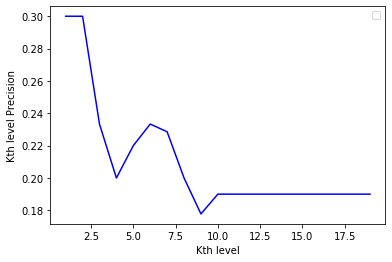

In [15]:
accuracy_for_tf = []
recall_for_tf = []
accuracy_for_15tf = []
recall_for_15tf = []
for i in range(1,20):
    sum1 = 0
    sum2 = 0
    for j in range(len(queryf)):
        ss1 = set(d.get(queryf[j][0:3]))   
        ss2 = set(docs_retrived_f[j][0:min(i,len(docs_retrived_f))])
        ss3 = ss1.intersection(ss2)
        sum1 = sum1 + float(len(ss3))/len(ss2)
        sum2 = sum2 + float(len(ss3))/float(50)
        if(i==15):
            accuracy_for_15tf.append(float(len(ss3))/len(ss2))
            recall_for_15tf.append(float(len(ss3))/float(50))
    accuracy_for_tf.append(sum1/10.0)
    recall_for_tf.append(sum2/10.0)

plt.plot(range(1,20),accuracy_for_tf,color='b')
plt.xlabel('Kth level')
plt.ylabel('Kth level Precision')
plt.legend()
plt.show()

* As the value of K increases the precision drops, which is apparent from the graph above

In [16]:
x = range(0,10)
accuracy_from_assg1 = [0, 0, 0.066666666666, 0, 0.13333333333333333, 0.133333333333, 0.0, 
         0.0666666666666, 0.0666666666666, 0.0] # copied from previous assignment
Recall_from_assg1 =  [0, 0, 0.02, 0, 0.04, 0.04, 0.0, 0.02, 0.02, 0.0] #copied from previous assignment

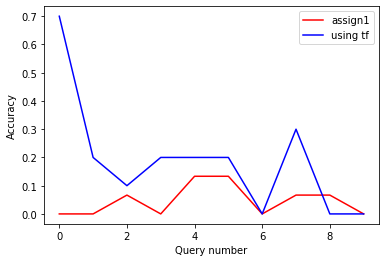

In [17]:
plt.plot(x,accuracy_from_assg1,label='assign1',color='r')
plt.plot(x,accuracy_for_15tf,label='using tf',color='b')
plt.xlabel('Query number')
plt.ylabel('Accuracy')
plt.legend()


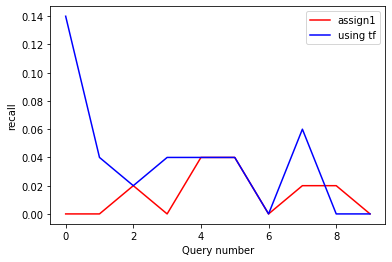

In [18]:
plt.plot(x,Recall_from_assg1,label='assign1',color='r')
plt.plot(x,recall_for_15tf,label='using tf',color='b')
plt.xlabel('Query number')
plt.ylabel('recall')
plt.legend()

* Our previous accuracy score was on average ~0.1 which has now improved to ~0.4 similarly recall has also improved to a certain scale (as the data-set is just 1000 compared to 6000 - we can't get a good recall score)
* The graphs above shows accuracy and recall has improved drastically. Labels- Red : Previous Assignment1  &  Blue : After using Tf weights

# TASK - 2 Designing TF-IDF Based Model

* Construction of Inverse Document Frequency & TFIDF

In [19]:
tfidf_vectorizer=TfidfVectorizer(stop_words=stopwords.words('english'))
vectorized_corpus=tfidf_vectorizer.fit_transform(docs_1).toarray()

In [20]:
print(vectorized_corpus.shape)

(1000, 122796)


* Retrived Documents after using weighted TF-IDF retrieval

In [25]:
docs_retrived = []
docs_retrived_f = []
for i in range(len(queryf)):
    vectorized_query=tfidf_vectorizer.transform([queryf[i][5:]])
    cos=cosine_similarity(vectorized_query,vectorized_corpus)
    for i in range(len(vectorized_corpus)):
        docs_retrived.append((cos[0][i],i))
    docs_retrived.sort(reverse=True)
    #print(docs_retrived[0:15])
    docs_retrived_name = []
    for i in range(15):
        doc_no = list(diction.items())[docs_retrived[i][1]]
        docs_retrived_name.append(files[doc_no[0]])
    #res = [lis[1] for lis in docs_retrived][0:15]
    docs_retrived_f.append(docs_retrived_name)
    #print(queryf[i][0:3],docs_retrived_name)
    #docs_retrived_f.append(docs_retrived_name)
#print(docs_retrived_f)

* Check for accuracy : 

No handles with labels found to put in legend.


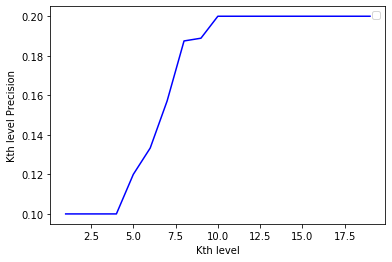

In [26]:
accuracy_for_tfidf = []
recall_for_tfidf = []
accuracy_for_15tfidf = []
recall_for_15tfidf = []
for i in range(1,20):
    sum1 = 0
    sum2 = 0
    for j in range(len(queryf)):
        ss1 = set(d.get(queryf[j][0:3]))   
        ss2 = set(docs_retrived_f[j][0:min(i,len(docs_retrived_f))])
        ss3 = ss1.intersection(ss2)
        sum1 = sum1 + float(len(ss3))/len(ss2)
        sum2 = sum2 + float(len(ss3))/float(50)
        if(i==15):
            accuracy_for_15tfidf.append(float(len(ss3))/len(ss2))
            recall_for_15tfidf.append(float(len(ss3))/float(50))
    accuracy_for_tfidf.append(sum1/10.0)
    recall_for_tfidf.append(sum2/10.0)

plt.plot(range(1,20),accuracy_for_tfidf,color='b')
plt.xlabel('Kth level')
plt.ylabel('Kth level Precision')
plt.legend()
plt.show()

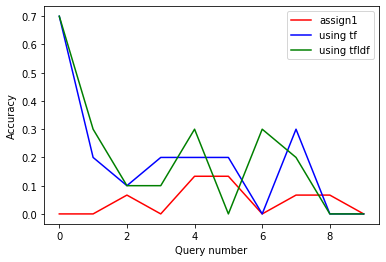

In [45]:
plt.plot(x,accuracy_from_assg1,label='assign1',color='r')
plt.plot(x,accuracy_for_15tf,label='using tf',color='b')
plt.plot(x,accuracy_for_15tfidf,label='using tfIdf',color='g')
plt.xlabel('Query number')
plt.ylabel('Accuracy')
plt.legend()

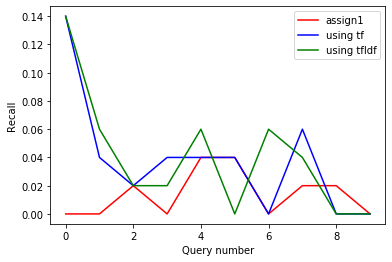

In [28]:
plt.plot(x,Recall_from_assg1,label='assign1',color='r')
plt.plot(x,recall_for_15tf,label='using tf',color='b')
plt.plot(x,recall_for_15tfidf,label='using tfIdf',color='g')
plt.xlabel('Query number')
plt.ylabel('Recall')
plt.legend()

* The average accuracy has increased from ~0.4 to ~0.45 but not very significantly , this is because it is data-set dependent, and we have taken a very small data-set.
* The graph above shows accuracy and recall. Labels- Red : Previous Assignment1  ,  Blue : After using Tf weights & Green : After using TF-IDF weights

#  TASK - 3 - Clustering using TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [30]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

vectorized_corpus = tfidf_vectorizer.fit_transform(docs_1).toarray()

print(vectorized_corpus)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00674924 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [31]:
print(vectorized_corpus.shape)

(1000, 122796)


* Here as there are 1000 documents it will take a lot of load to find the clusters with 123183 dimensions, what we can do is PCA but that might lose vital information, so we reduce our sample size to 200

In [32]:
vectorized_corpus = vectorized_corpus[0:200]

In [33]:
from sklearn.cluster import KMeans
no_of_clusters = 15 # because of the analysis done below
kmeans_model = KMeans(n_clusters=no_of_clusters,max_iter=20,random_state=42,n_jobs=10)
kmeans_model.fit(vectorized_corpus[0:200])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
       n_clusters=15, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [34]:
clusters = kmeans_model.labels_.tolist()

In [35]:
print(clusters)

[1, 0, 13, 13, 4, 7, 9, 13, 13, 0, 13, 0, 7, 3, 13, 13, 7, 13, 5, 0, 14, 13, 4, 13, 0, 13, 6, 10, 0, 0, 2, 4, 1, 4, 13, 0, 13, 13, 6, 13, 13, 0, 0, 13, 4, 7, 8, 4, 4, 0, 7, 8, 2, 0, 14, 10, 0, 7, 0, 1, 0, 4, 4, 13, 5, 0, 13, 1, 1, 4, 0, 14, 7, 3, 1, 13, 3, 0, 3, 0, 0, 1, 3, 0, 8, 2, 4, 13, 0, 4, 5, 0, 11, 13, 3, 6, 0, 0, 13, 0, 13, 6, 1, 3, 7, 13, 7, 3, 11, 4, 10, 7, 9, 8, 7, 10, 7, 10, 13, 0, 12, 0, 12, 0, 1, 10, 0, 7, 13, 7, 11, 13, 0, 14, 0, 0, 0, 13, 7, 12, 13, 4, 0, 13, 13, 0, 4, 2, 9, 13, 6, 13, 0, 4, 4, 0, 7, 13, 4, 1, 1, 14, 14, 10, 4, 1, 3, 6, 5, 1, 0, 0, 13, 4, 0, 8, 4, 3, 3, 13, 0, 13, 8, 10, 0, 5, 4, 0, 8, 0, 13, 3, 14, 4, 4, 10, 0, 0, 1, 4]


In [36]:
que_trans = tfidf_vectorizer.transform([queryf[0]])

In [37]:
Clusters_Euclidean = {}
for i in range(no_of_clusters):
    Clusters_Euclidean[i]=[];
print(len(Clusters_Euclidean))
for i in range(len(clusters)):
    doc_no = list(diction.items())[[i][0]][0]
    #docs_retrived_name.append(files[doc_no[0]])
    Clusters_Euclidean[clusters[i]].append(files[doc_no])

15


In [38]:
Clusters_Euclidean

{0: ['GX240-51-12213575',
  'GX025-33-4254186',
  'GX240-84-0131507',
  'GX255-65-9943451',
  'GX123-45-5659840',
  'GX045-88-3362544',
  'GX031-85-0001090',
  'GX007-43-13233964',
  'GX066-16-3768211',
  'GX009-58-4267458',
  'GX025-67-0369887',
  'GX026-69-0425787',
  'GX058-68-12935160',
  'GX121-54-12752879',
  'GX056-80-8507274',
  'GX004-81-3891531',
  'GX261-24-2420173',
  'GX235-49-1853414',
  'GX232-97-13839573',
  'GX037-53-15444663',
  'GX021-46-0346939',
  'GX235-03-7888088',
  'GX025-06-9419689',
  'GX256-61-13295069',
  'GX251-59-1260847',
  'GX260-89-16638793',
  'GX259-63-16107092',
  'GX056-59-3828847',
  'GX113-90-0586837',
  'GX055-52-10349567',
  'GX257-01-5803525',
  'GX131-40-13345138',
  'GX038-23-13693573',
  'GX240-51-8789503',
  'GX030-60-3550004',
  'GX237-00-6109677',
  'GX030-45-15369635',
  'GX220-45-16433148',
  'GX061-06-4170063',
  'GX065-45-2035518',
  'GX064-78-12301593',
  'GX024-50-15429036',
  'GX237-37-7048500',
  'GX256-40-6950329',
  'GX062-61-4

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(vectorized_corpus)
dist = 1 - cos
print(cos.shape)

(200, 200)


In [40]:
dist

array([[ 0.00000000e+00,  9.96696737e-01,  9.91349481e-01, ...,
         9.86694962e-01,  9.75290045e-01,  9.68284673e-01],
       [ 9.96696737e-01, -2.22044605e-16,  9.98459167e-01, ...,
         9.78200745e-01,  9.97704594e-01,  9.96618781e-01],
       [ 9.91349481e-01,  9.98459167e-01, -2.22044605e-16, ...,
         9.77744217e-01,  9.88671744e-01,  9.97013860e-01],
       ...,
       [ 9.86694962e-01,  9.78200745e-01,  9.77744217e-01, ...,
         4.44089210e-16,  9.65163285e-01,  9.83390973e-01],
       [ 9.75290045e-01,  9.97704594e-01,  9.88671744e-01, ...,
         9.65163285e-01, -4.44089210e-16,  9.76336335e-01],
       [ 9.68284673e-01,  9.96618781e-01,  9.97013860e-01, ...,
         9.83390973e-01,  9.76336335e-01, -4.44089210e-16]])

In [41]:
no_of_clusters = 16 # because of the analysis done below
eigen_values, eigen_vectors = np.linalg.eigh(dist)
Clusters_Cos=KMeans(n_clusters=no_of_clusters, init='k-means++',random_state=70,n_jobs=10).fit_predict(eigen_vectors[:, 2:4])

In [42]:
Clusters_Cos

array([13,  5, 12,  2,  6,  1, 10,  6,  1,  5,  5, 13,  2,  1,  2,  2, 12,
        2,  5, 11,  2,  5, 11,  1, 12,  5,  7,  4, 12, 11,  3,  0,  1, 11,
        5, 12, 11, 13, 14, 11, 12, 13,  0,  2, 12,  6,  5, 11,  2,  5,  2,
        5,  1, 11, 12,  7,  5,  8,  5,  9,  0,  2, 13,  0, 10,  0, 12,  9,
        9, 12, 11, 11,  2,  1,  9, 12,  1, 13,  1,  5,  5,  9,  1, 12,  5,
        3, 12, 15, 13, 12,  0,  5, 12, 12, 12,  7, 12,  5, 15,  2, 12, 14,
       13,  1,  2,  0,  6,  6, 12, 12, 14,  6, 10,  5,  4, 14,  8,  2, 11,
       12, 12, 12, 12, 11,  9,  6,  5,  2, 10, 12,  5, 12, 13, 12, 13, 11,
       11,  5,  6, 12,  5, 12, 11, 12,  0,  5, 11,  3, 10, 10,  7,  2, 11,
       12, 12,  2,  8, 12, 12,  9,  6, 12, 12, 12,  2,  6, 15,  7, 10,  6,
       12, 12,  6, 12,  2,  5,  6,  1, 13,  2,  7,  5,  5, 14,  0, 11, 12,
        2,  5, 12,  0, 15, 12,  2,  2, 13, 12, 11, 13,  2], dtype=int32)

In [43]:
Clusters_Cosine = {}
for i in range(no_of_clusters):
    Clusters_Cosine[i]=[];
for i in range(len(Clusters_Cos)):
    doc_no = list(diction.items())[[i][0]][0]
    #docs_retrived_name.append(files[doc_no[0]])
    Clusters_Cosine[Clusters_Cos[i]].append(files[doc_no])

In [44]:
Clusters_Cosine

{0: ['GX001-28-14093471',
  'GX009-58-4267458',
  'GX056-80-8507274',
  'GX237-95-12105331',
  'GX004-81-3891531',
  'GX015-38-2566191',
  'GX010-16-8667301',
  'GX008-75-13666443',
  'GX237-37-7048500',
  'GX237-90-16378363'],
 1: ['GX243-47-10501670',
  'GX057-98-10853073',
  'GX234-19-10959163',
  'GX012-43-0650616',
  'GX261-95-13413473',
  'GX011-07-9890982',
  'GX227-31-11982207',
  'GX002-09-12860652',
  'GX234-82-1456426',
  'GX238-30-2755851',
  'GX022-69-16620743',
  'GX001-27-5701295'],
 2: ['GX106-69-0077596',
  'GX060-72-11179254',
  'GX250-14-5559818',
  'GX005-29-0821498',
  'GX036-54-3518813',
  'GX062-70-3846166',
  'GX233-90-14371690',
  'GX110-47-3427481',
  'GX059-92-5260018',
  'GX239-01-13420521',
  'GX261-67-3829183',
  'GX260-89-16638793',
  'GX248-37-3737290',
  'GX016-25-15804529',
  'GX246-36-3433150',
  'GX251-36-16747012',
  'GX220-45-16433148',
  'GX251-28-1227897',
  'GX064-78-12301593',
  'GX255-72-7840577',
  'GX256-40-6950329',
  'GX019-96-1710603',
  

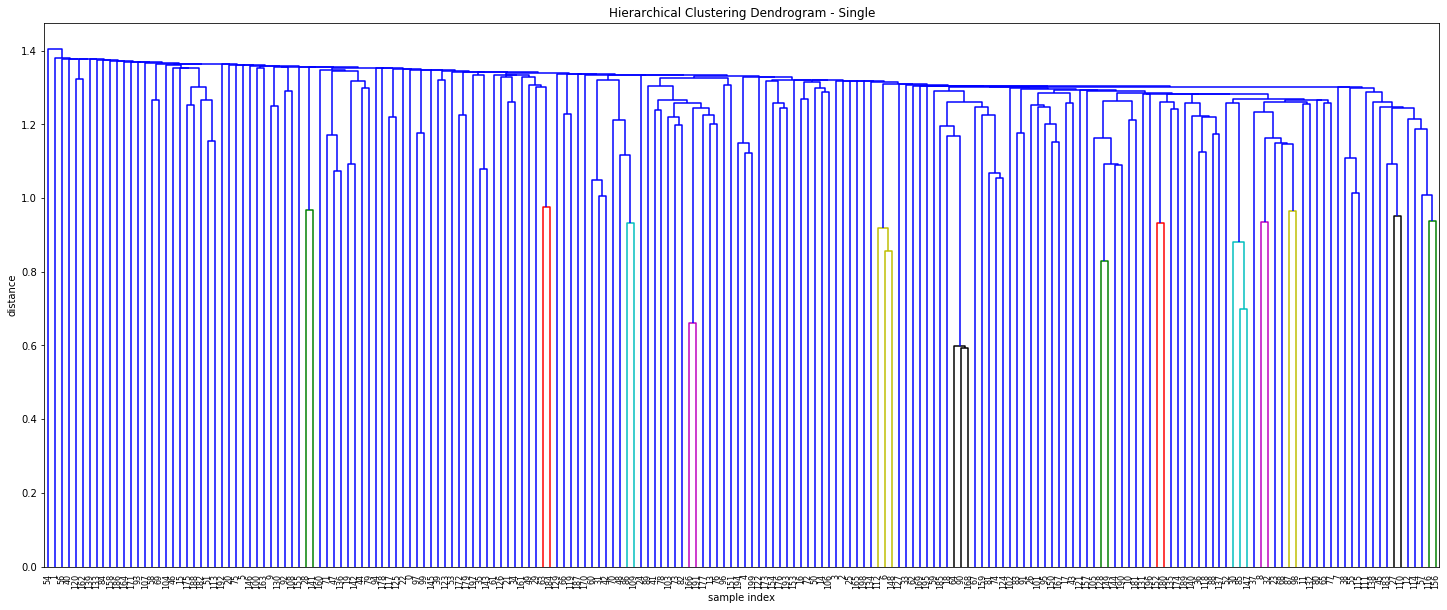

array([1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [46]:
Z = linkage(vectorized_corpus[0:200], 'single')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Single')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
k=7
clusters=fcluster(Z, k, criterion='maxclust')
clusters-1

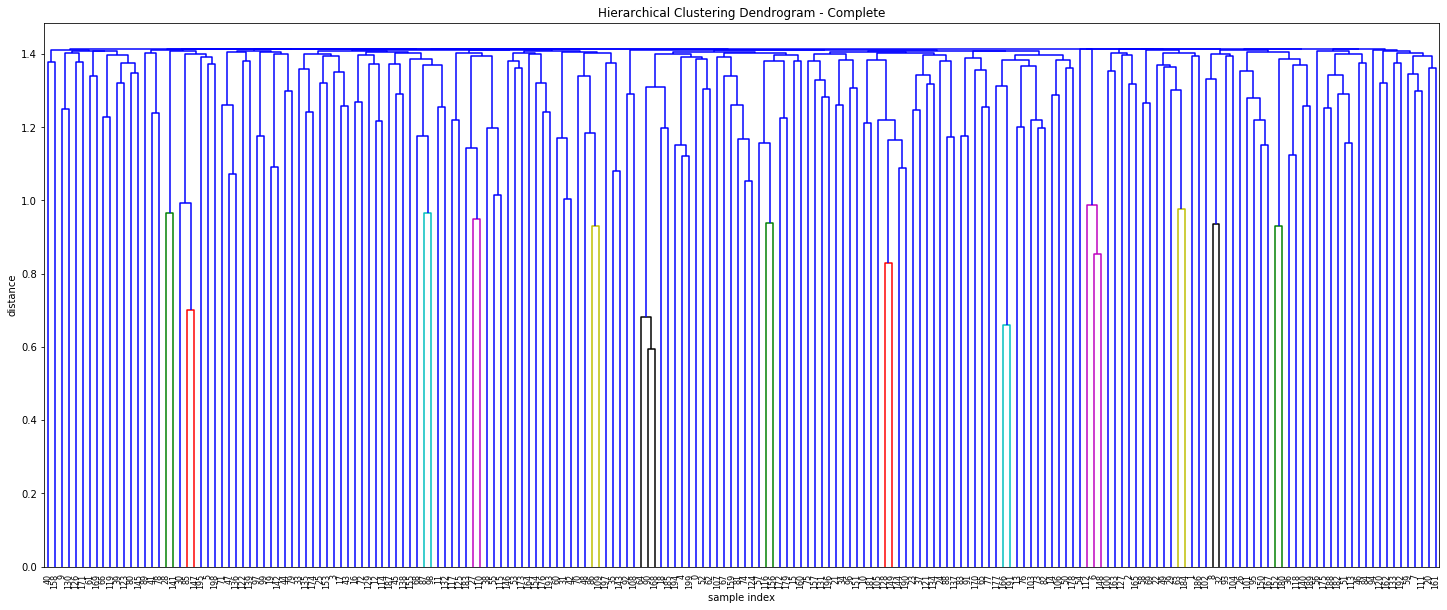

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [47]:
Z = linkage(vectorized_corpus[0:200], 'complete')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Complete')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
k=2
clusters=fcluster(Z, k, criterion='maxclust')
clusters-1

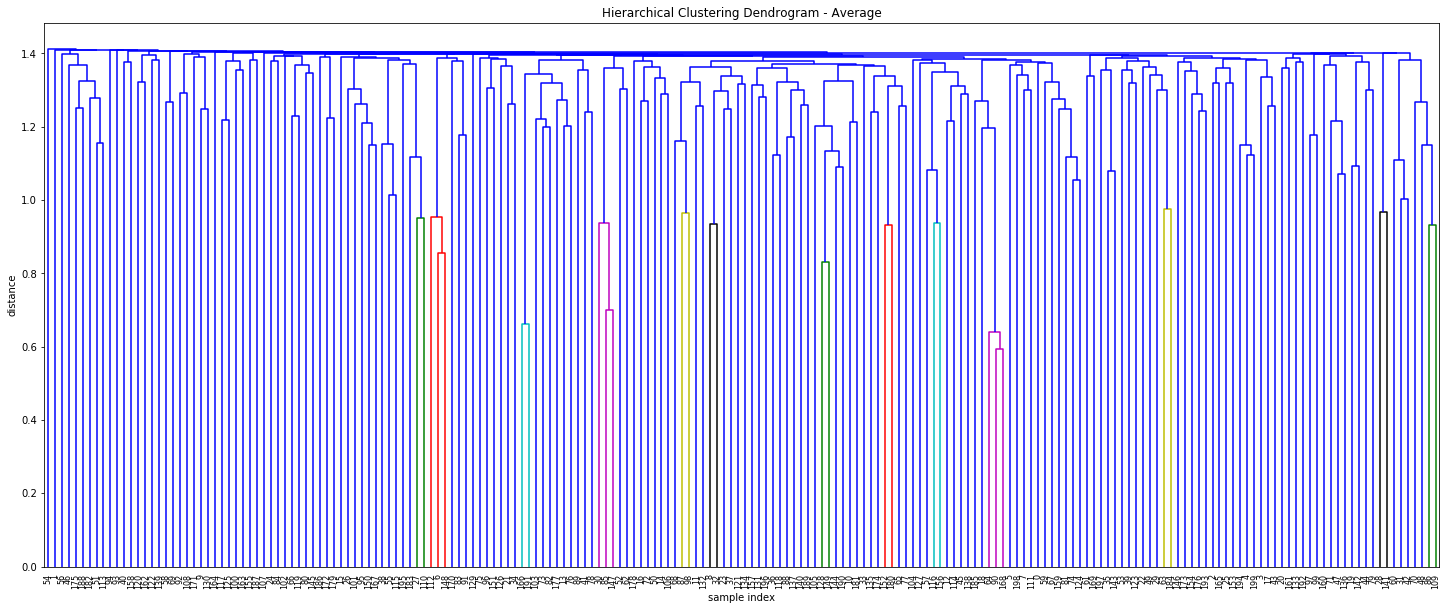

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 5, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [48]:
Z = linkage(vectorized_corpus[0:200], 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Average')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
k=6
clusters=fcluster(Z, k, criterion='maxclust')
clusters-1

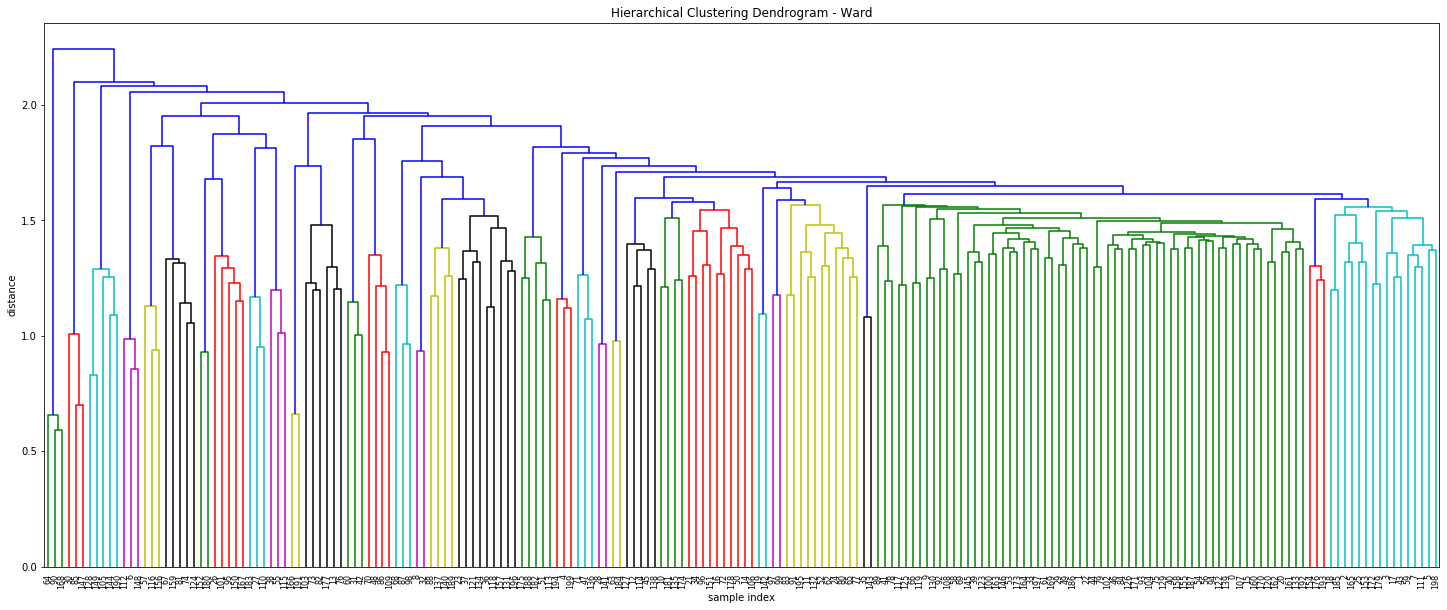

array([5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 4, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 0, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 1, 5, 5,
       5, 5, 0, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 2, 5, 5, 5, 5,
       4, 5, 3, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 1, 3, 2, 4, 5, 4, 5,
       5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 0, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [49]:
Z = linkage(vectorized_corpus[0:200], 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Ward')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
k=6
clusters=fcluster(Z, k, criterion='maxclust')
clusters-1

# TASK - 4 Empirical Analysis

In [50]:
from scipy.spatial.distance import cdist 

In [55]:
# Sum_of_squared_distances = []
# K = range(1,10)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(vectorized_corpus[0:200])
#     Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

* Here, the elbow method is not helping to find the best value of K as the data-set size is small, so we use a different method to find the best K

In [60]:
vectorized_corpus = vectorized_corpus[0:100]

In [61]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
 # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15 ,16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = clusterer.fit_predict(vectorized_corpus)
  #print(cluster_labels)
  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(vectorized_corpus, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(vectorized_corpus, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.0034980982922359584
For n_clusters = 3 The average silhouette_score is : 0.003291397400019156
For n_clusters = 4 The average silhouette_score is : 0.004730106794532683
For n_clusters = 5 The average silhouette_score is : 0.008578706376542842
For n_clusters = 6 The average silhouette_score is : 0.008024841300241628
For n_clusters = 7 The average silhouette_score is : 0.0137021686116134
For n_clusters = 8 The average silhouette_score is : 0.015441201206582466
For n_clusters = 9 The average silhouette_score is : 0.01119542164513081
For n_clusters = 10 The average silhouette_score is : 0.017010208078054458
For n_clusters = 11 The average silhouette_score is : 0.017770254473691675
For n_clusters = 12 The average silhouette_score is : 0.02079575424437087
For n_clusters = 13 The average silhouette_score is : 0.020094806951764087
For n_clusters = 14 The average silhouette_score is : 0.02318748268786913
For n_clusters = 15 The average silho

This primary analysis for K shows that K=15 is a good arguement for Euclidean K mean Clustering. Following is further analysis and plots

Average score for 3 is 0.0034980982922359584
Average score for 4 is 0.003291397400019156
Average score for 5 is 0.004730106794532683
Average score for 6 is 0.008578706376542842
Average score for 7 is 0.008024841300241628
Average score for 8 is 0.0137021686116134
Average score for 9 is 0.015441201206582466
Average score for 10 is 0.01119542164513081
Average score for 11 is 0.017010208078054458
Average score for 12 is 0.017770254473691675
Average score for 13 is 0.02079575424437087
Average score for 14 is 0.020094806951764087
Average score for 15 is 0.02318748268786913
Average score for 16 is 0.027502918508420845
Average score for 17 is 0.02828216903361188
Average score for 18 is 0.030008503944576468
Average score for 19 is 0.03017323686266289
Average score for 20 is 0.03419889132040975
Average score for 21 is 0.03643487601612688


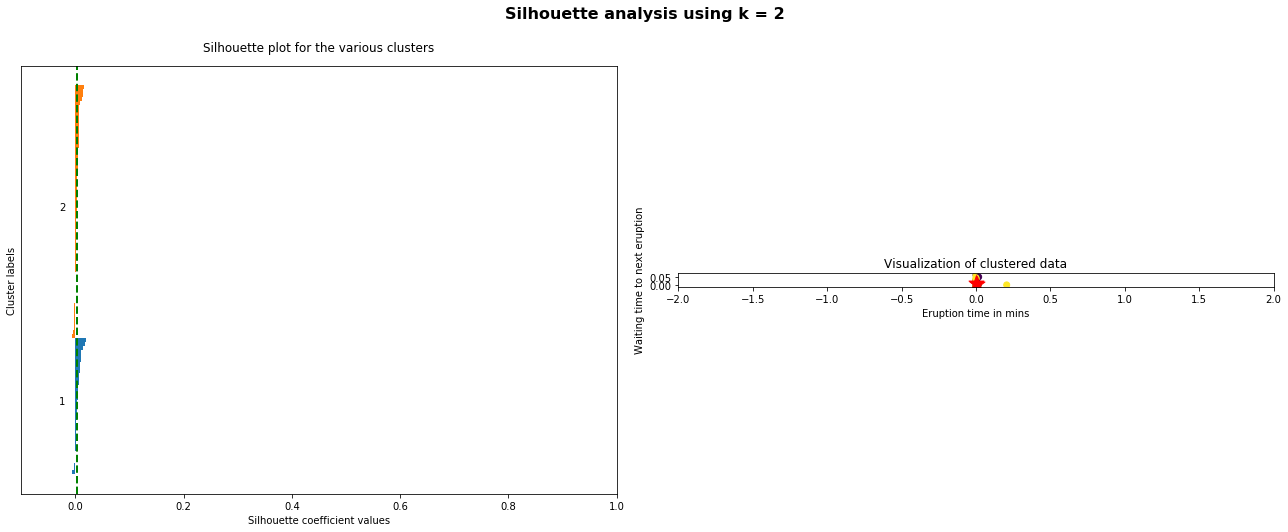

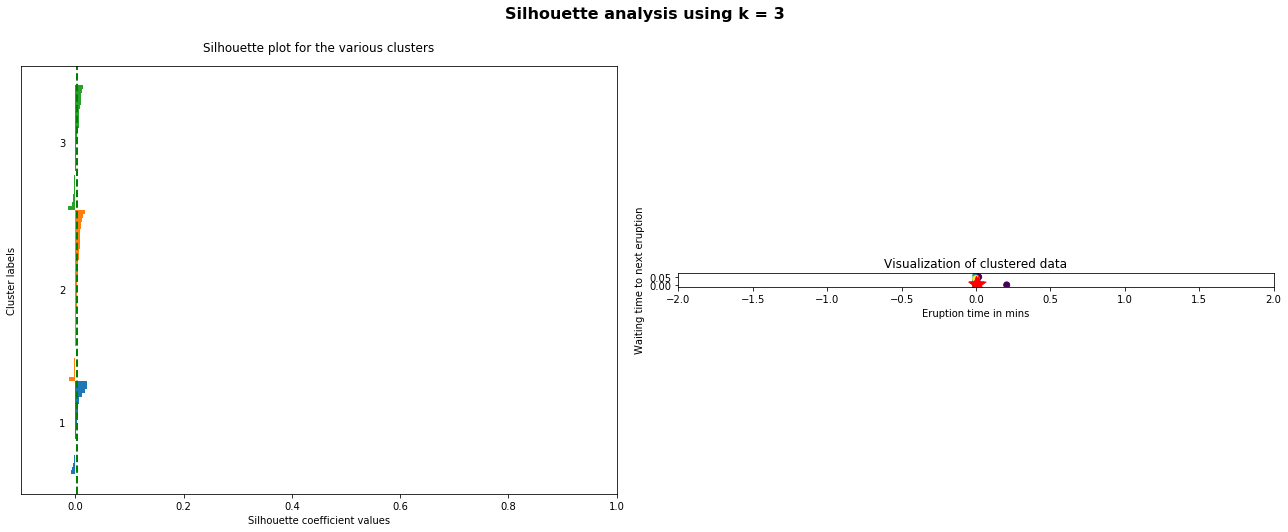

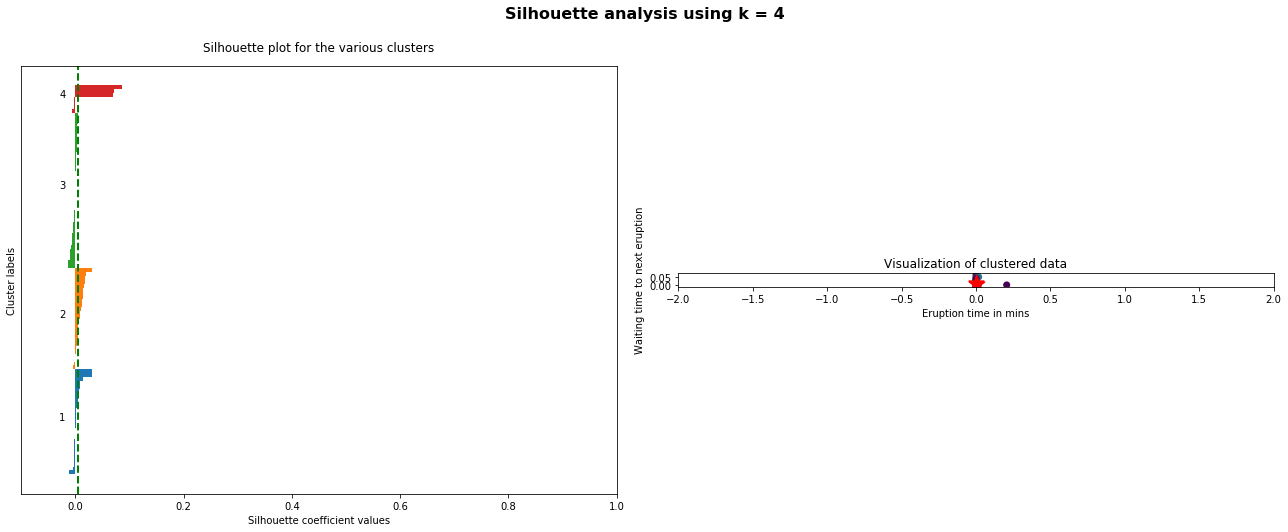

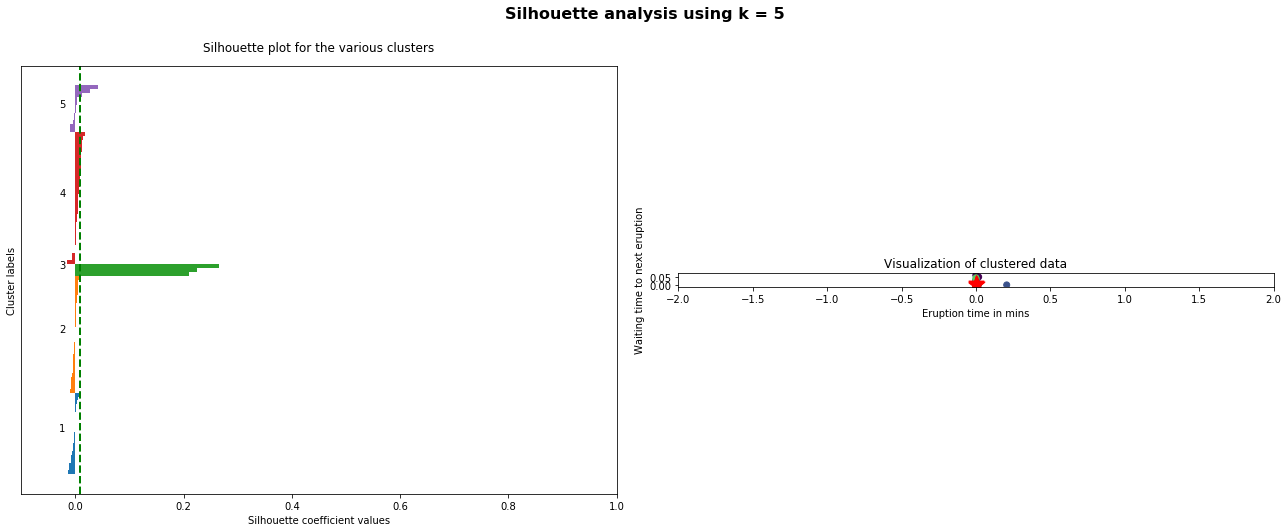

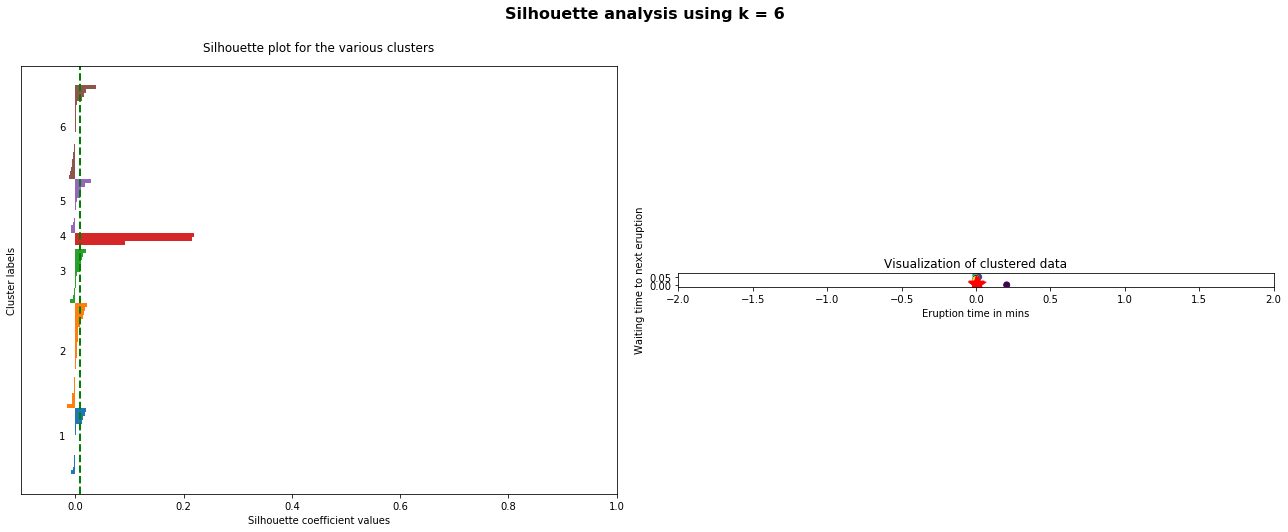

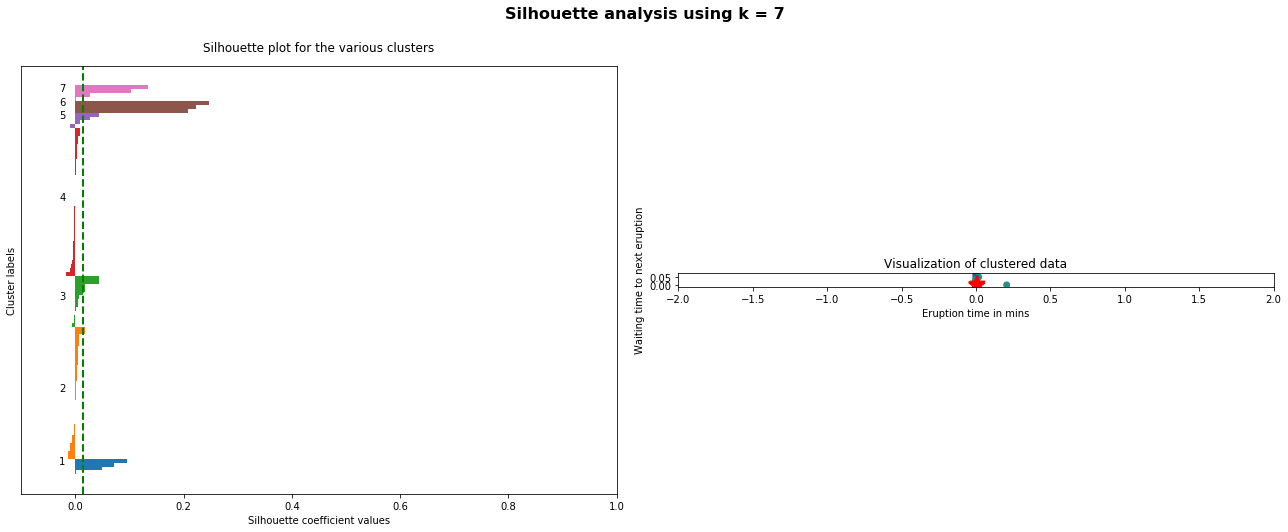

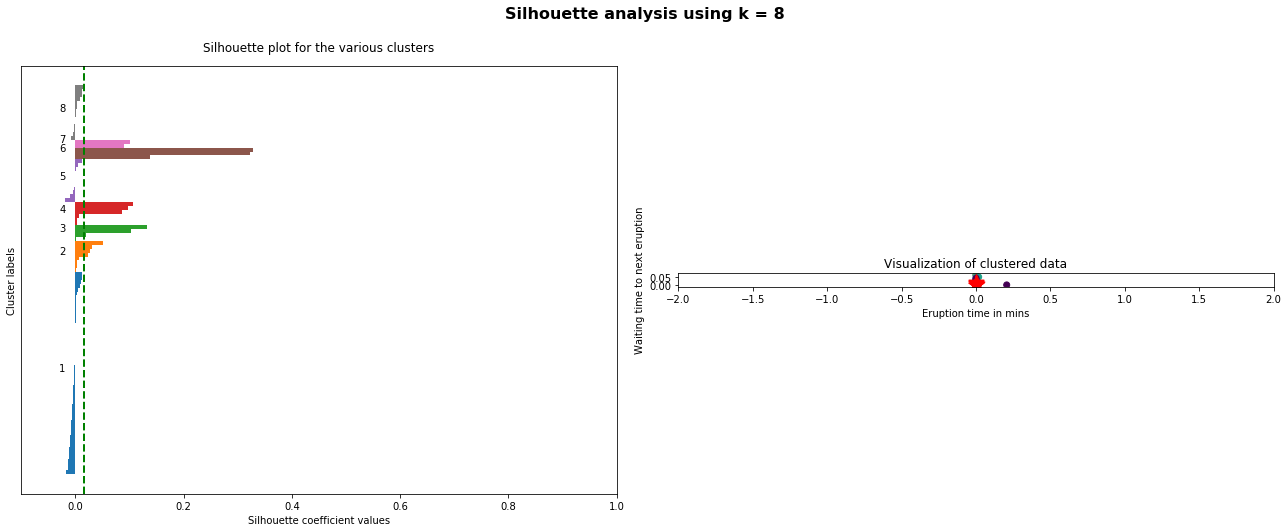

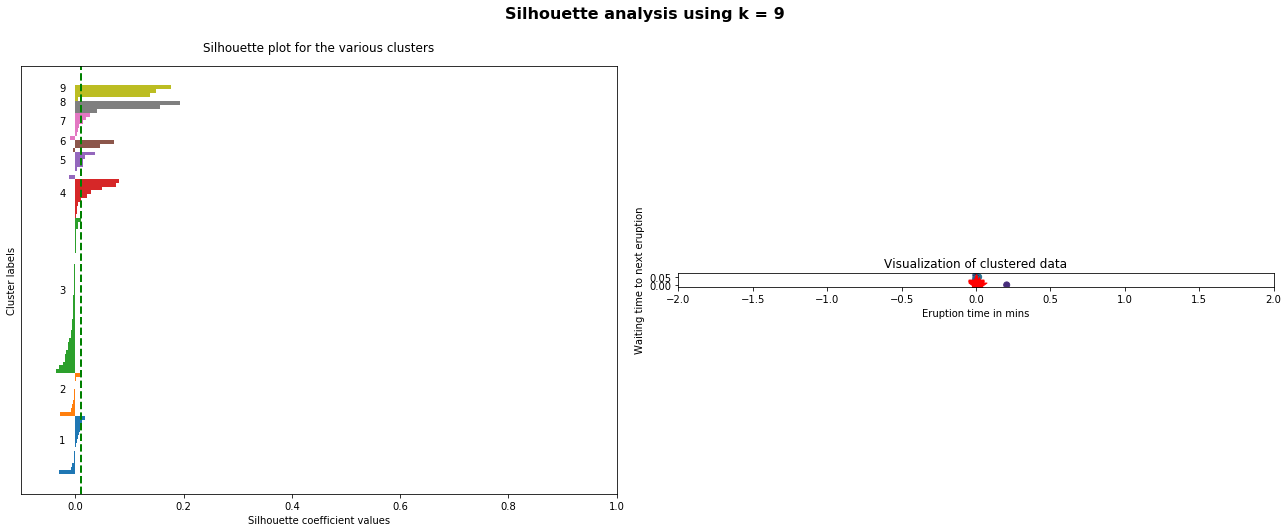

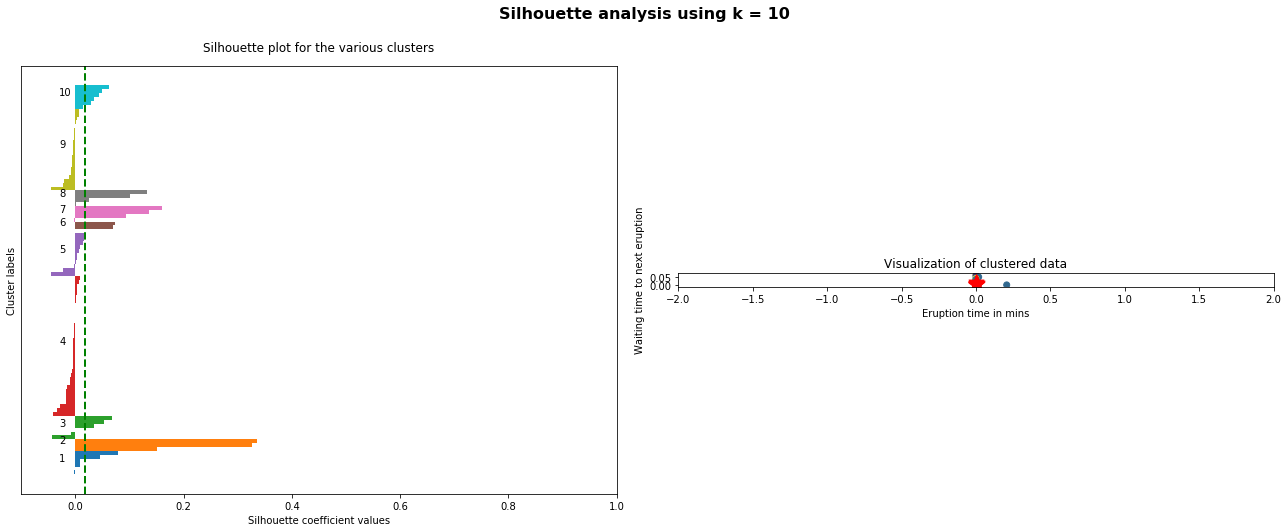

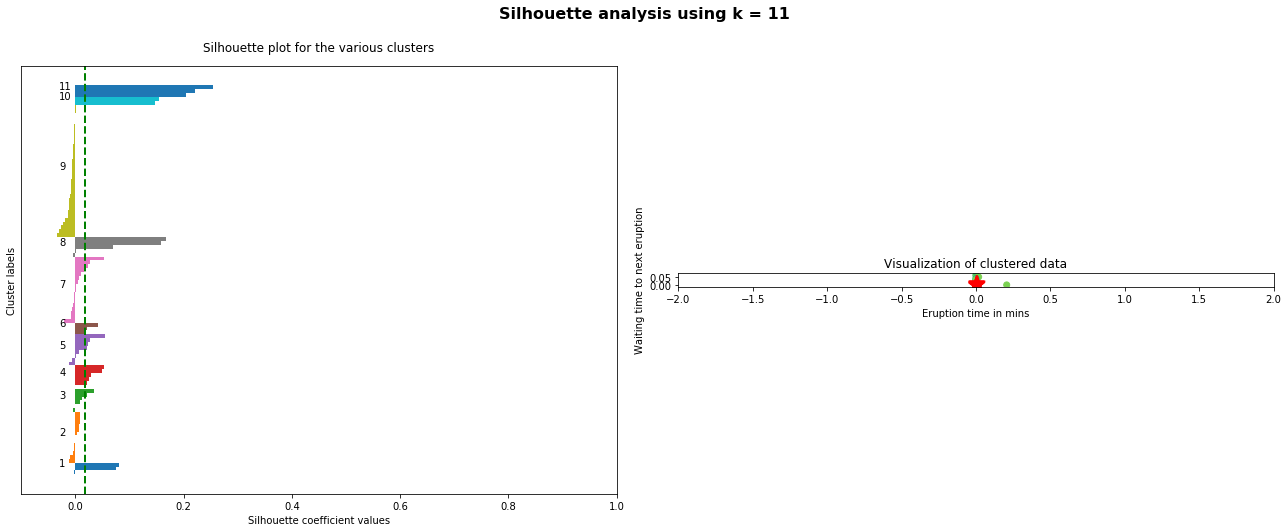

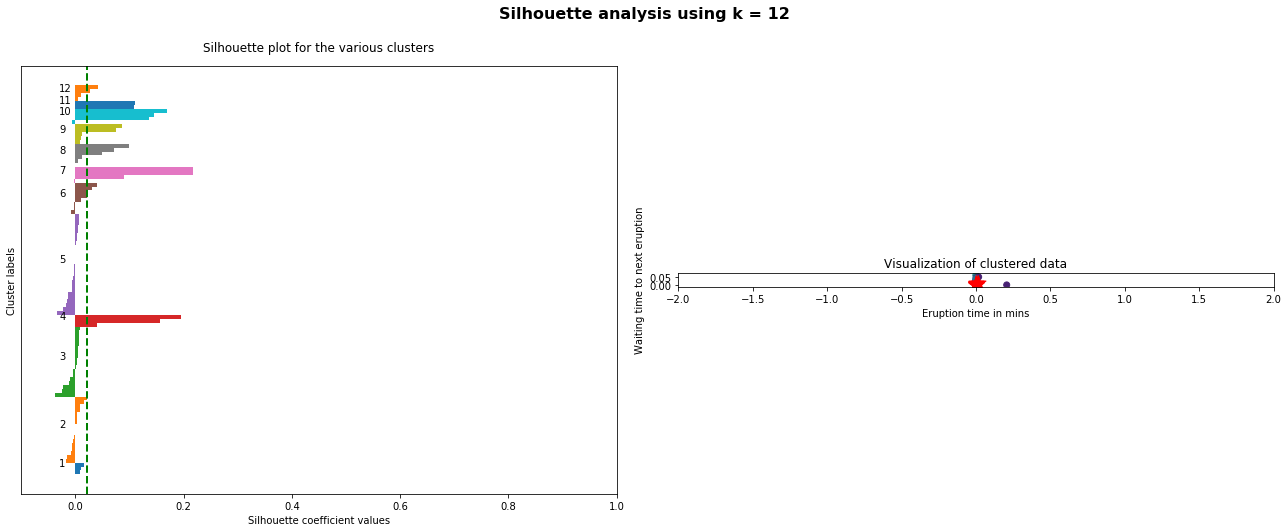

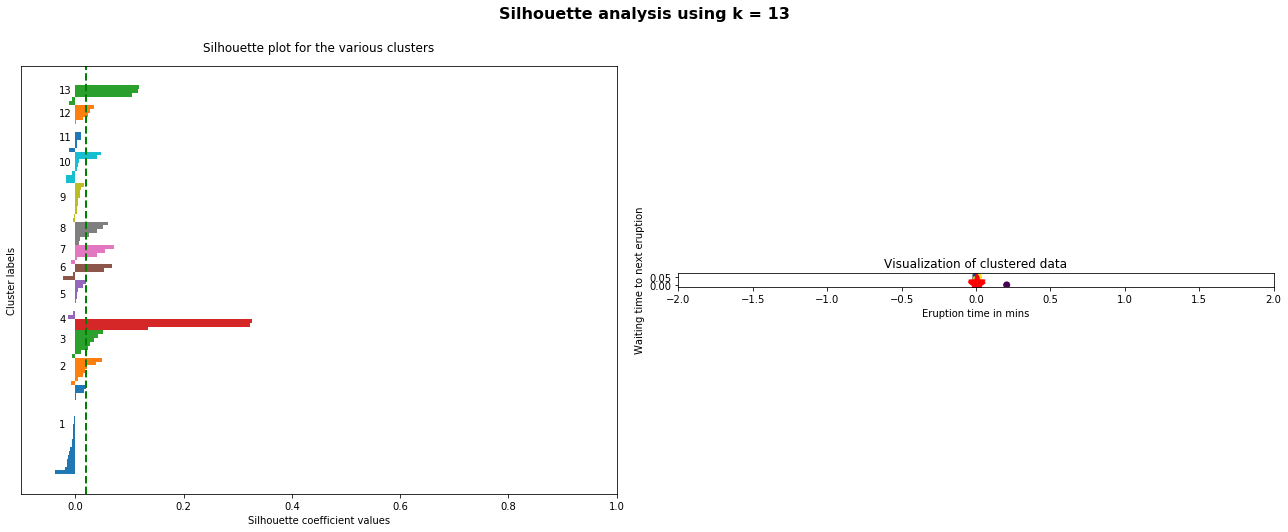

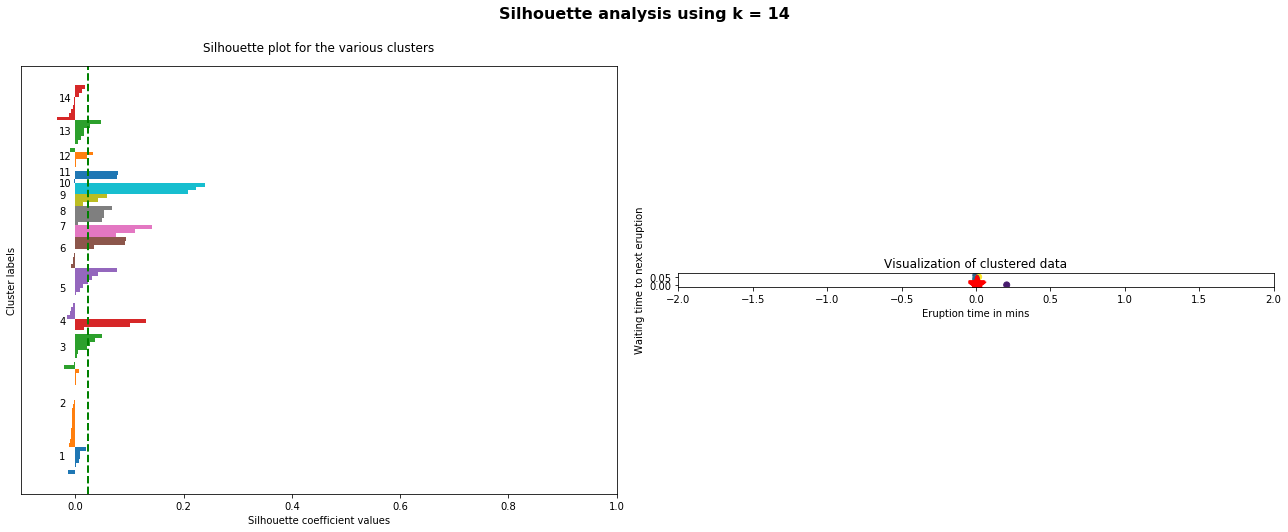

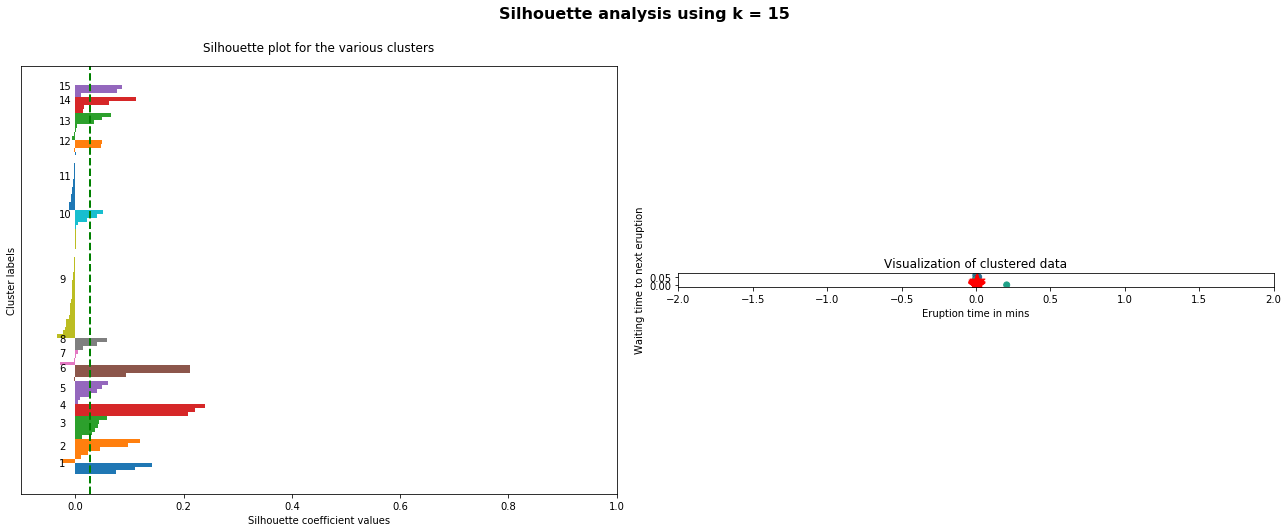

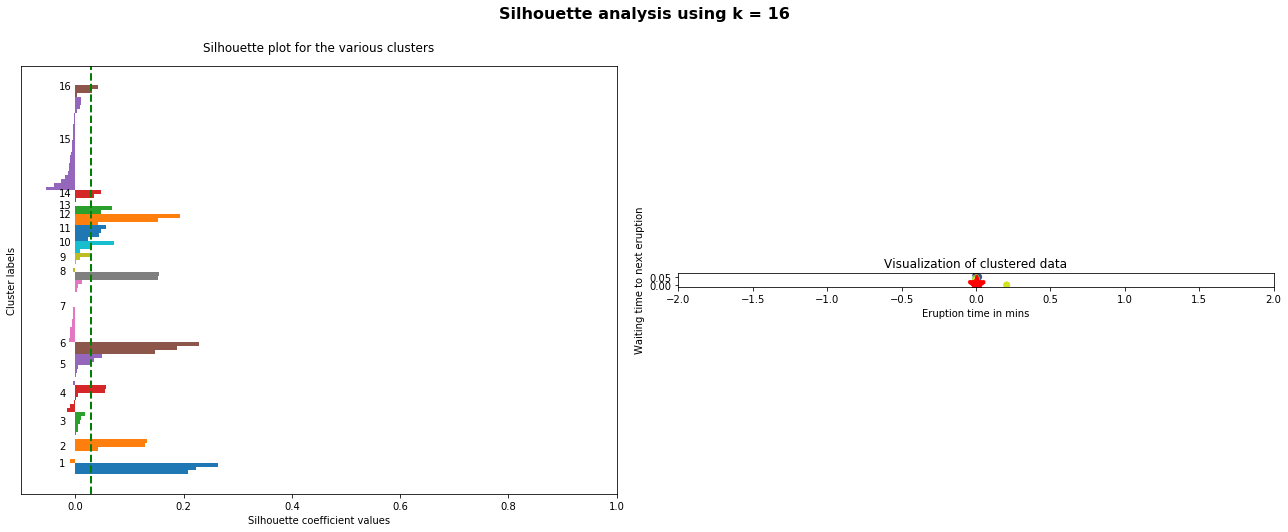

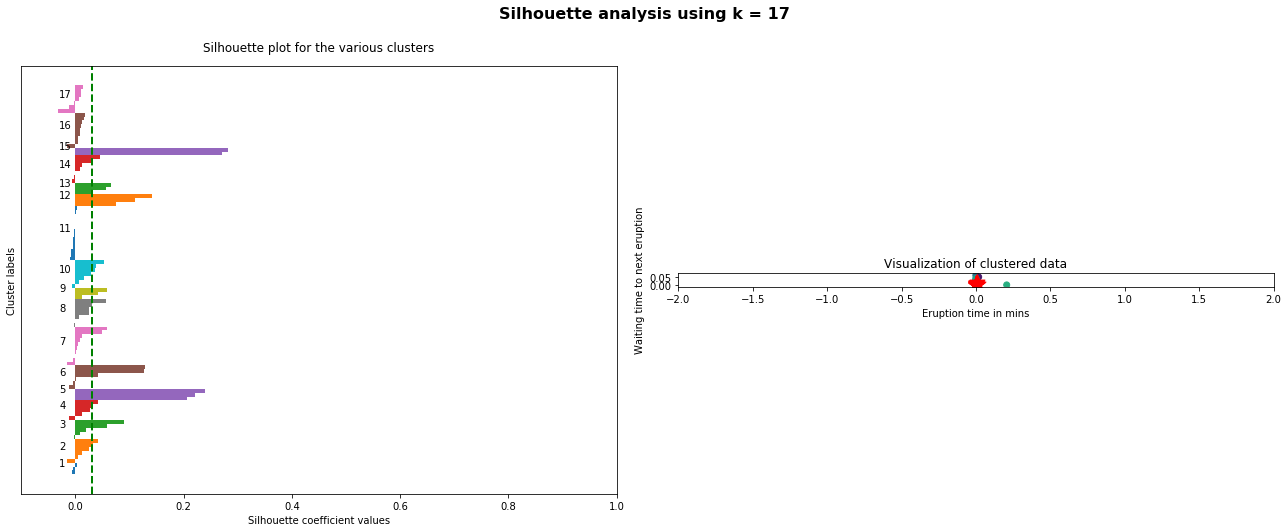

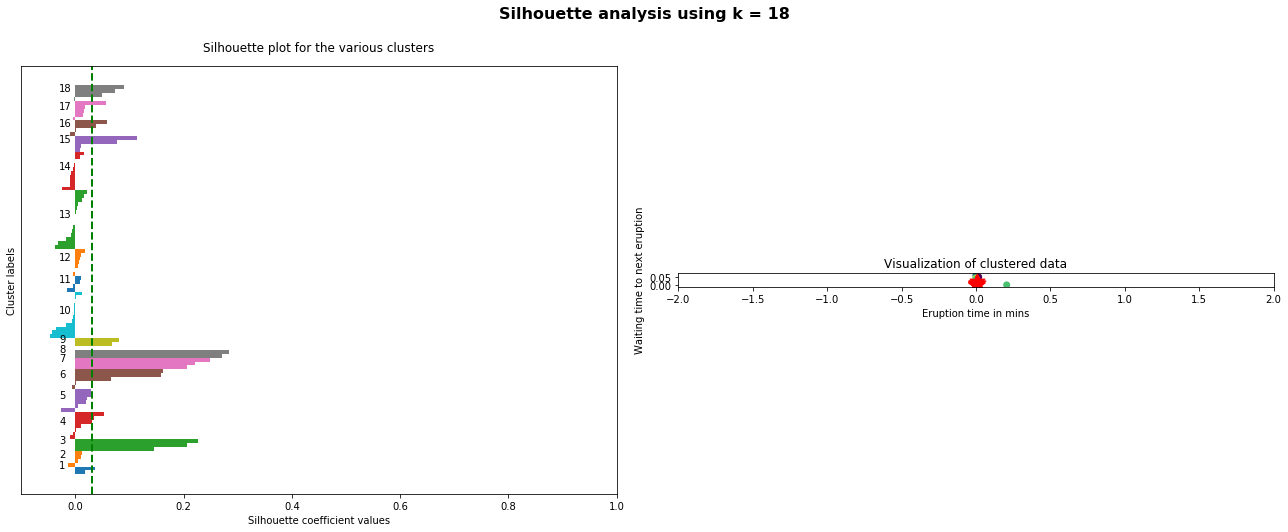

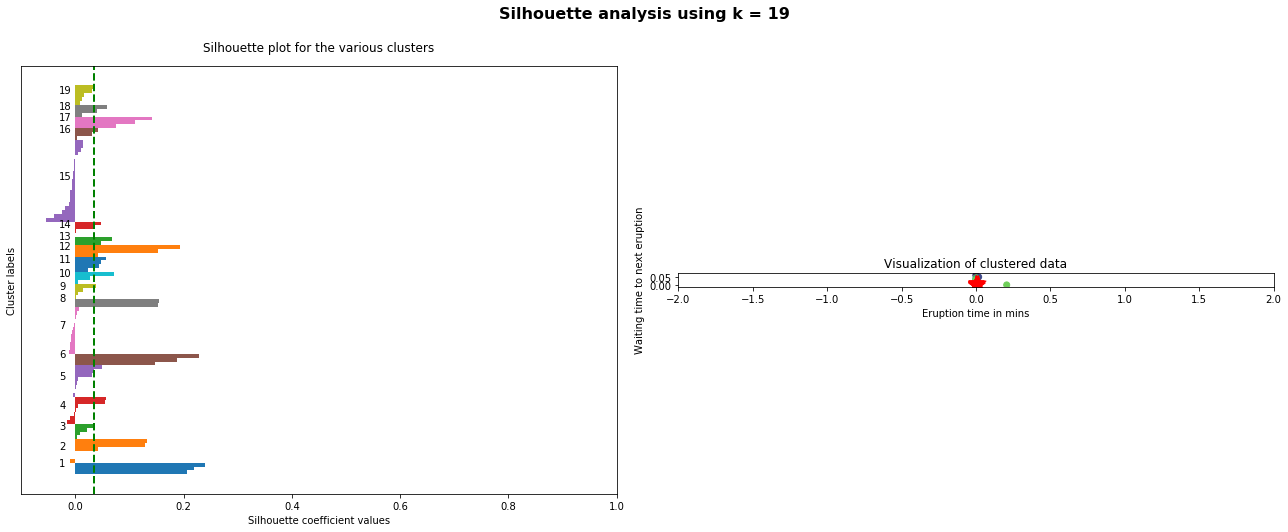

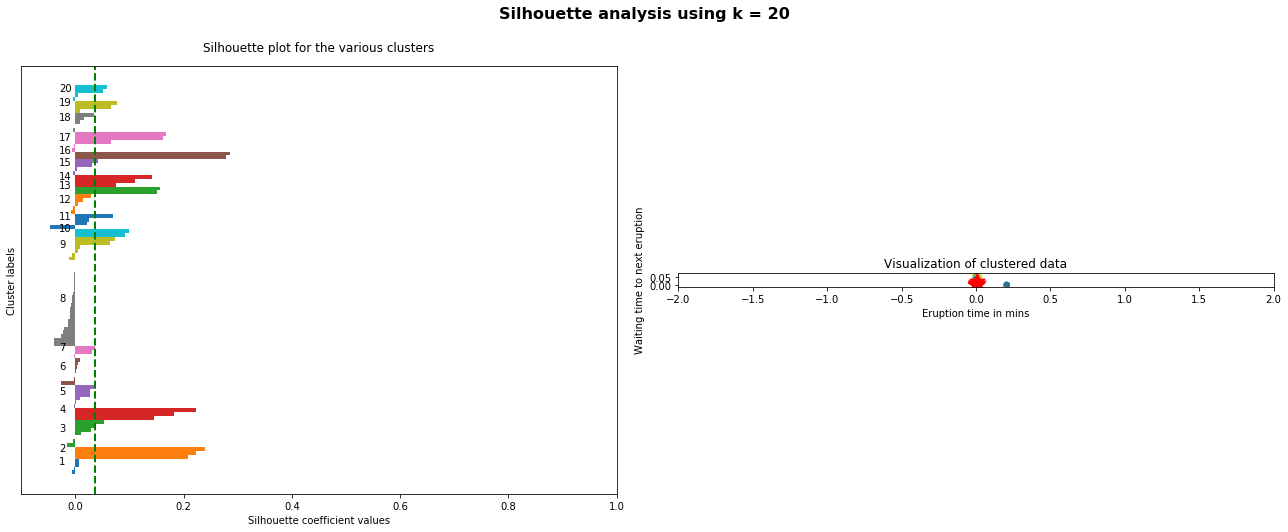

In [62]:
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42)
    labels = km.fit_predict(vectorized_corpus)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(vectorized_corpus, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average score for {} is {}".format(i+2,avg_score))
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(vectorized_corpus[:, 0], vectorized_corpus[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

For Euclidean Distance K=15 looks reliable, because the silhouette score gives the normalized intra-similarity and inter-similarity (0,1,-1) a negative measurement means it is a wrong classification (distance from the classfied cluster centroid is greater than the distance from the centroid of any other cluster), a positive measurement is correct classificationy (distance from the classfied cluster is lesser than the distance from an other cluster centroid) and 0 means that the point can belong to any of the two classes. Now K=15 has a good average silhouette score and -1 (miss-classification) takes place very less number of times.

Average score for 2 is 0.18512677147812634
Average score for 3 is 0.14778523309553374
Average score for 4 is 0.05869530513523172
Average score for 5 is 0.06338400148573484
Average score for 6 is 0.07967471034234314
Average score for 7 is 0.07437600480541953
Average score for 8 is 0.08638356290837847
Average score for 9 is 0.08327159981878621
Average score for 10 is 0.11278969128338137
Average score for 11 is 0.09840951723683387
Average score for 12 is 0.11375977848109742
Average score for 13 is 0.1079017357577633
Average score for 14 is 0.12440255217442844
Average score for 15 is 0.12574897432004847
Average score for 16 is 0.12648955018374725
Average score for 17 is 0.12019075630385628
Average score for 18 is 0.12712456806532463
Average score for 19 is 0.12642092728772827
Average score for 20 is 0.13081828794021277


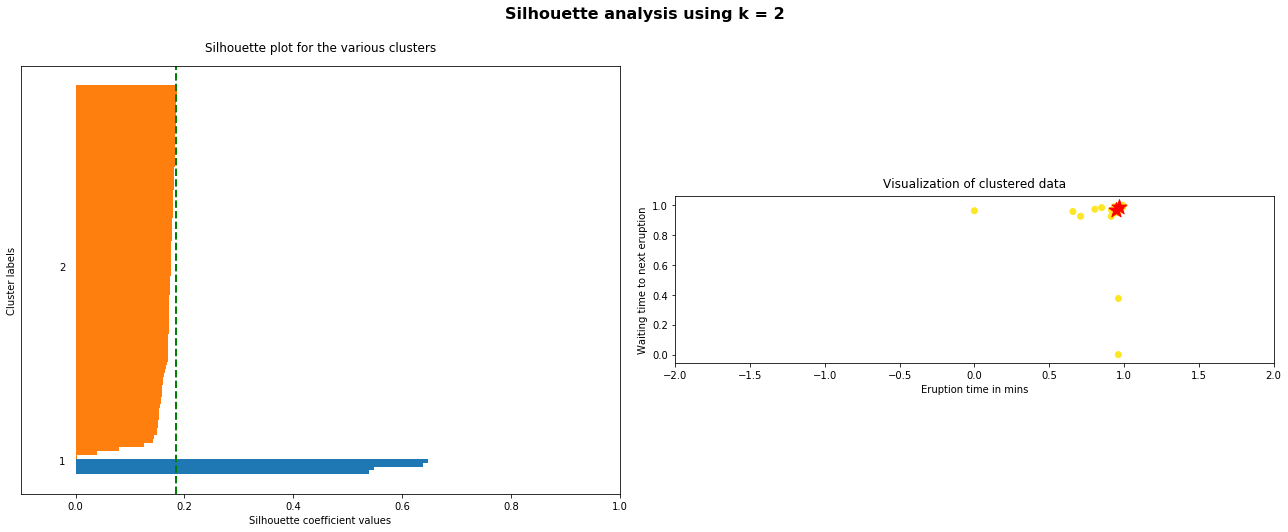

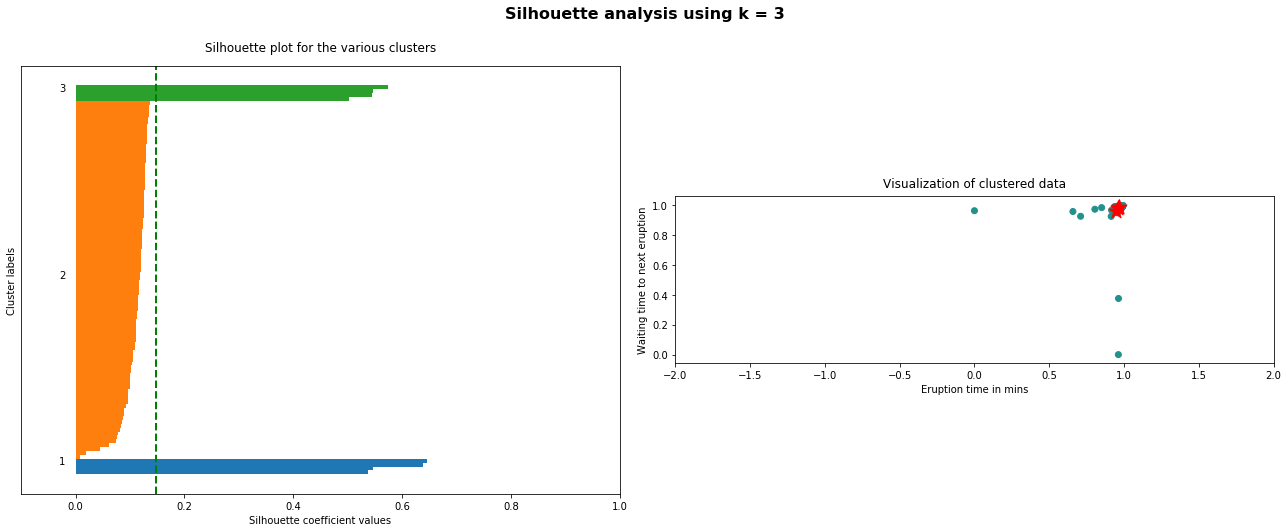

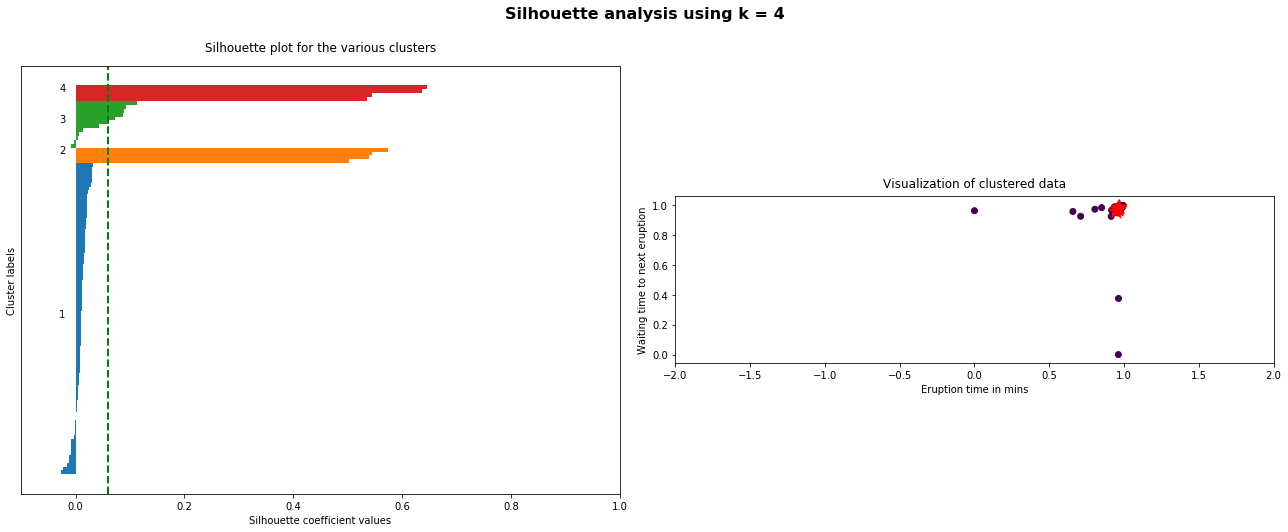

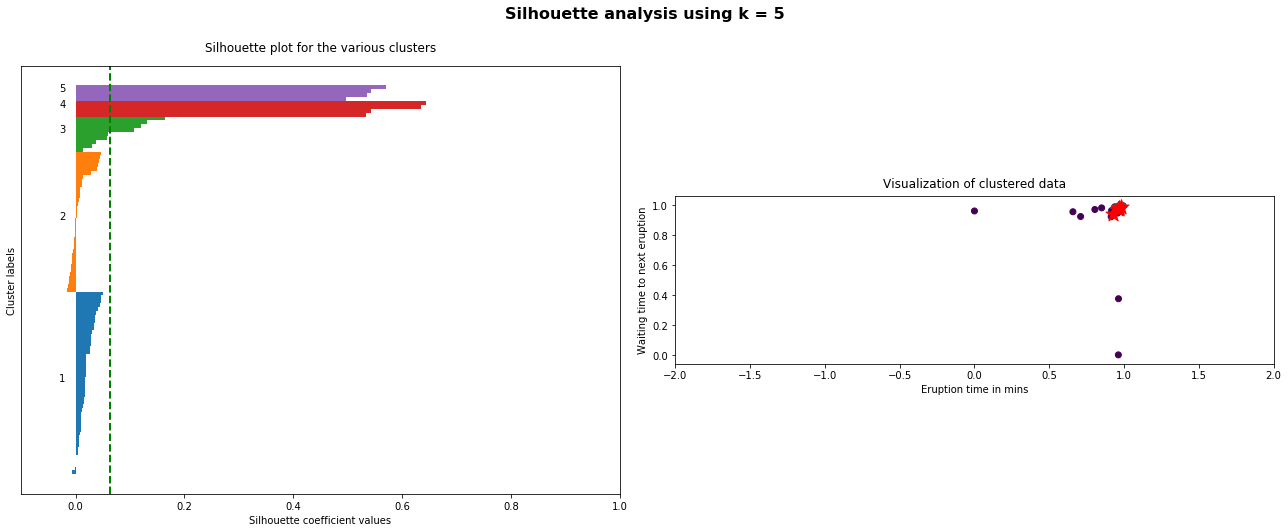

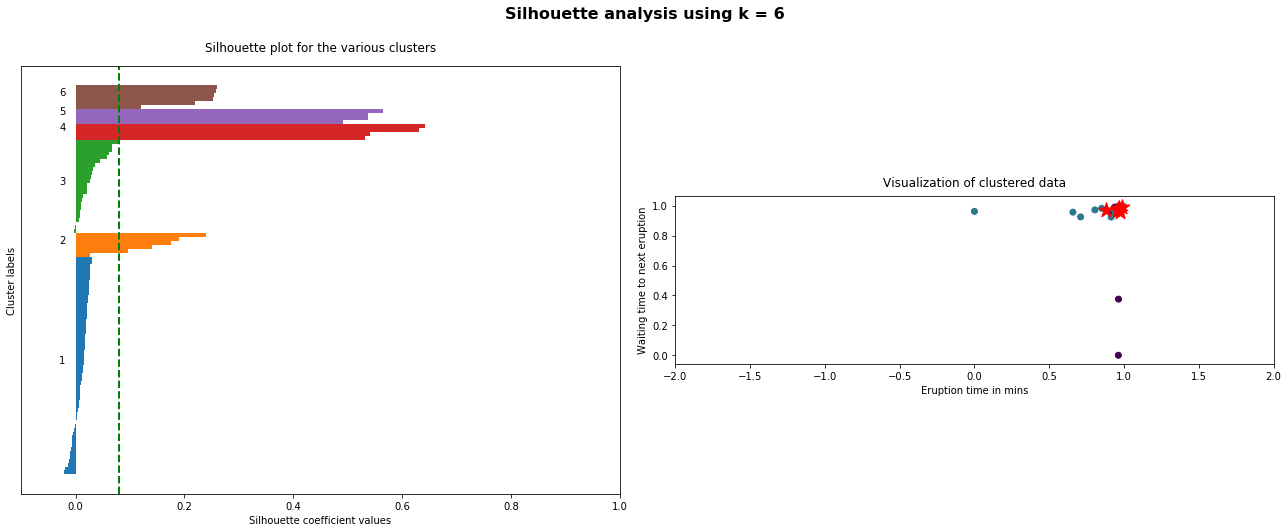

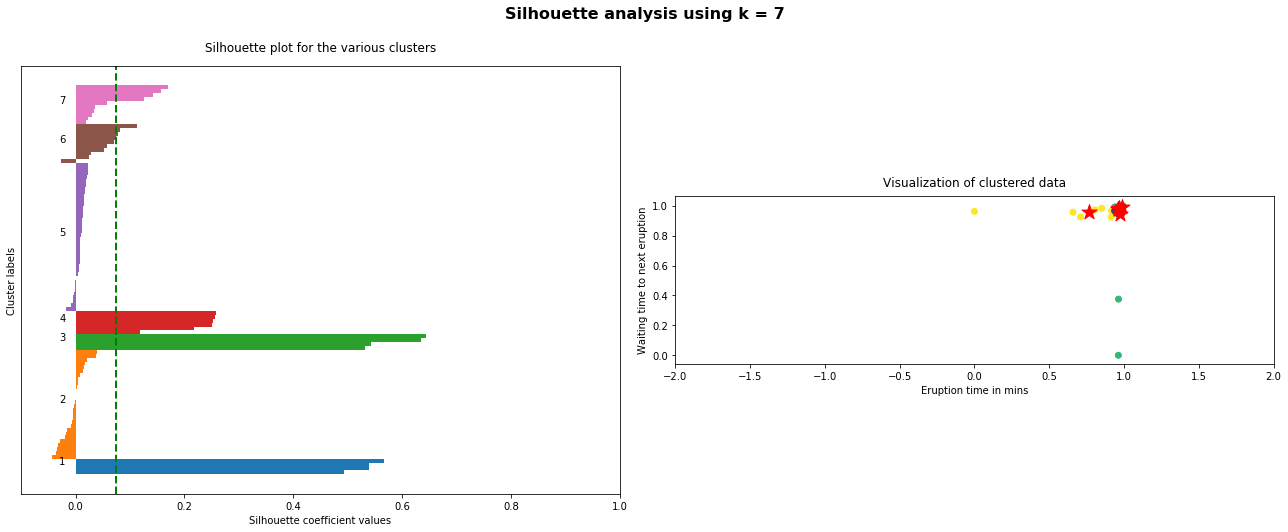

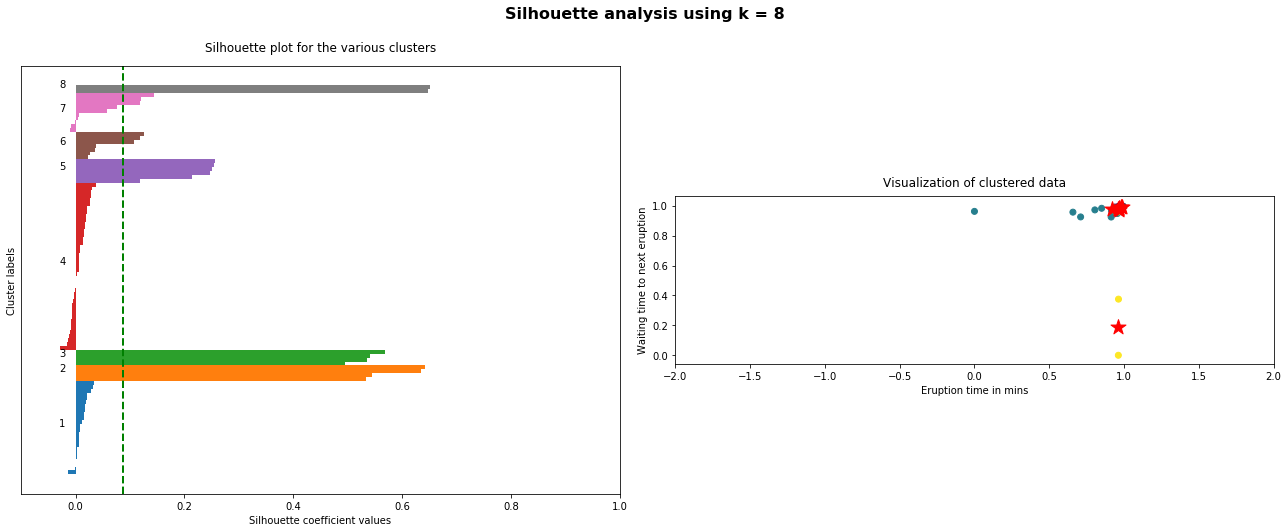

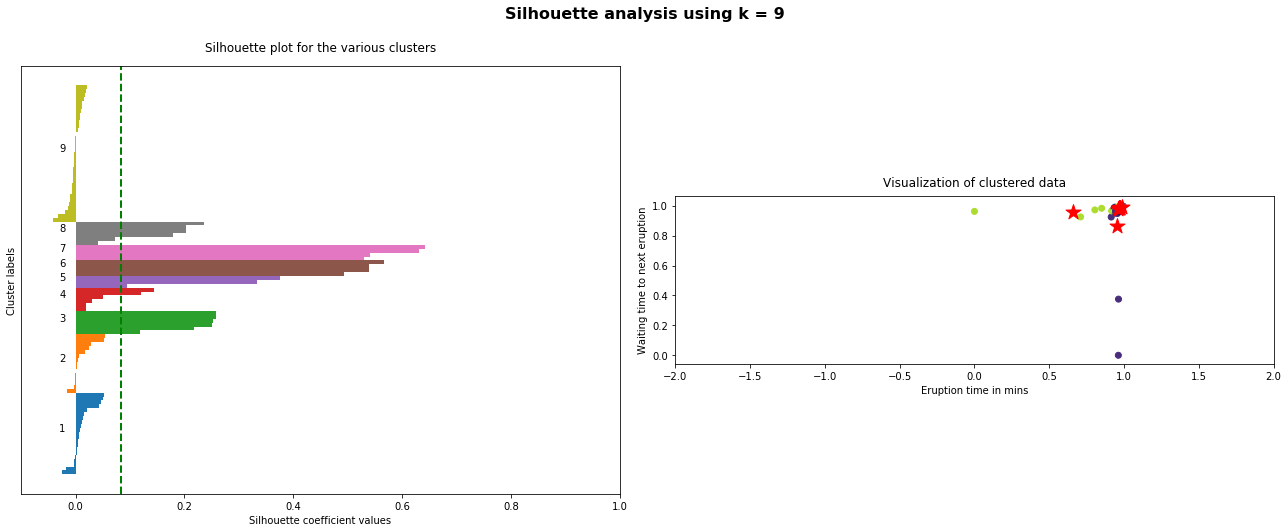

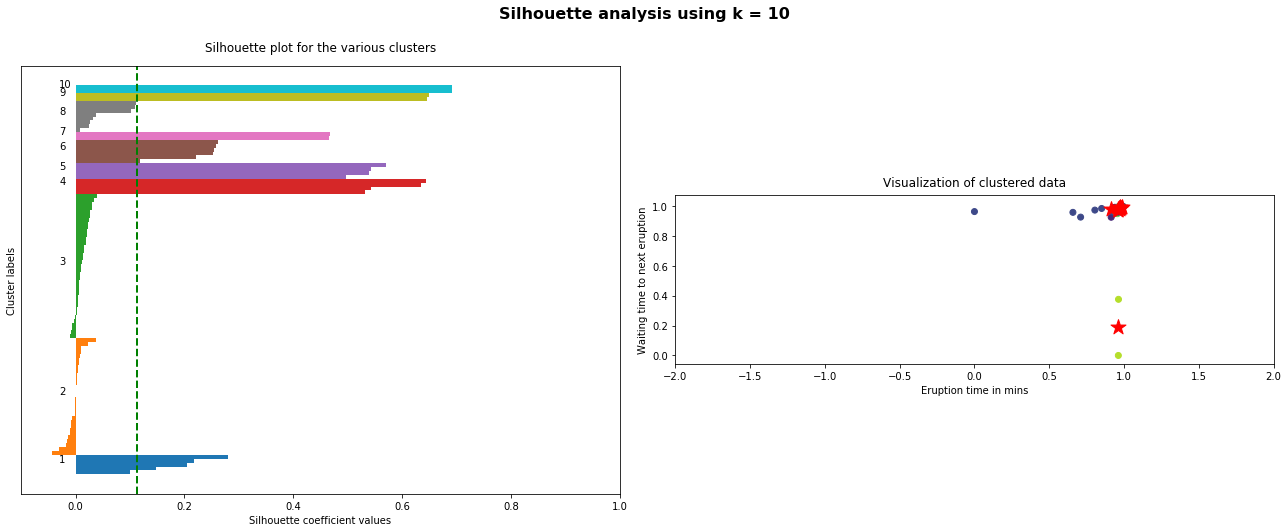

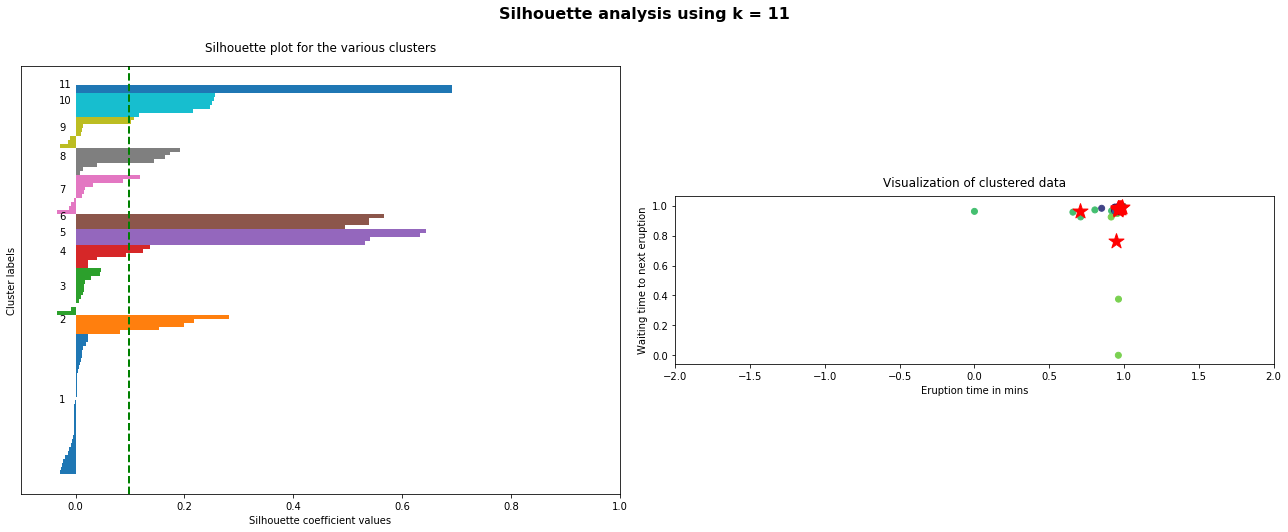

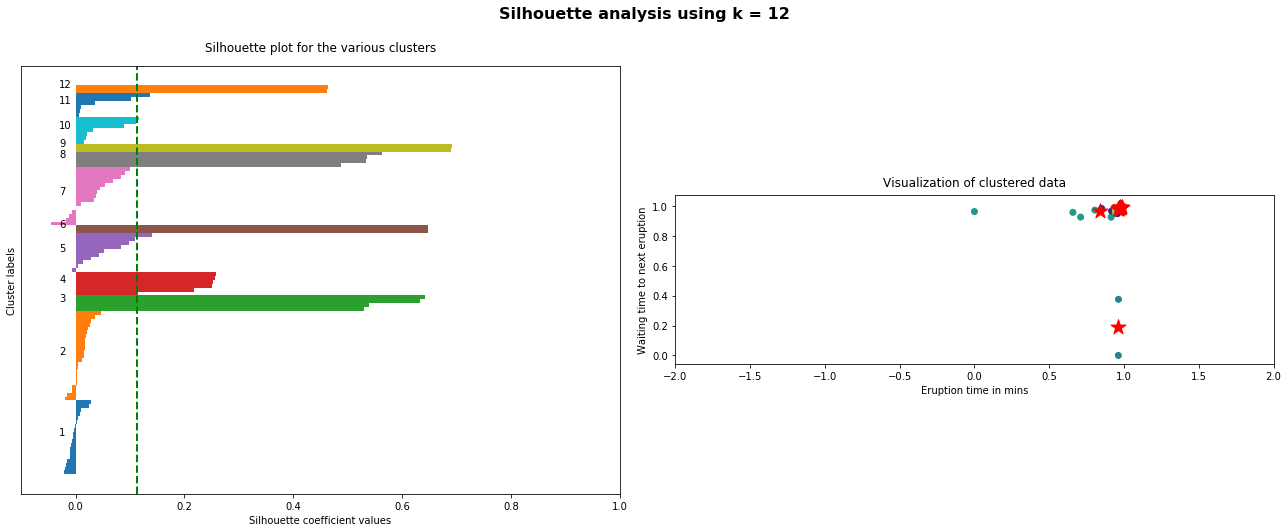

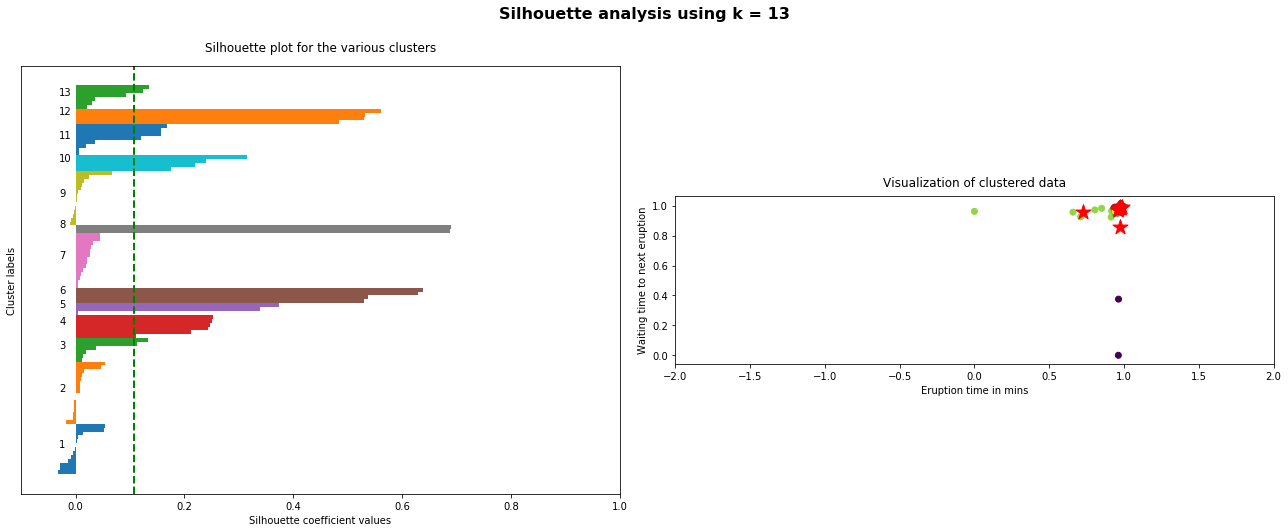

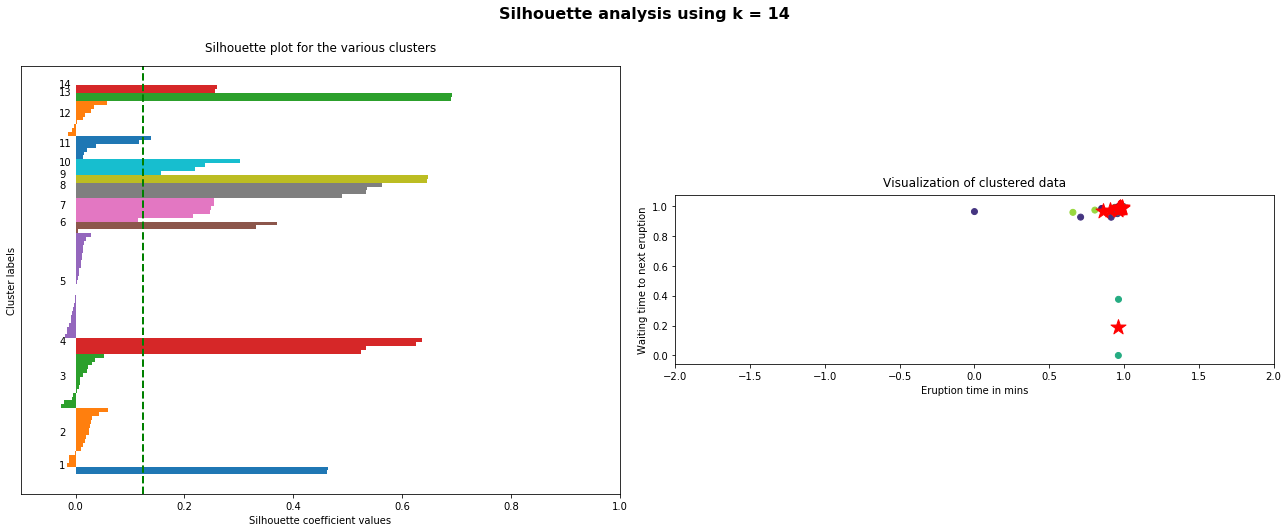

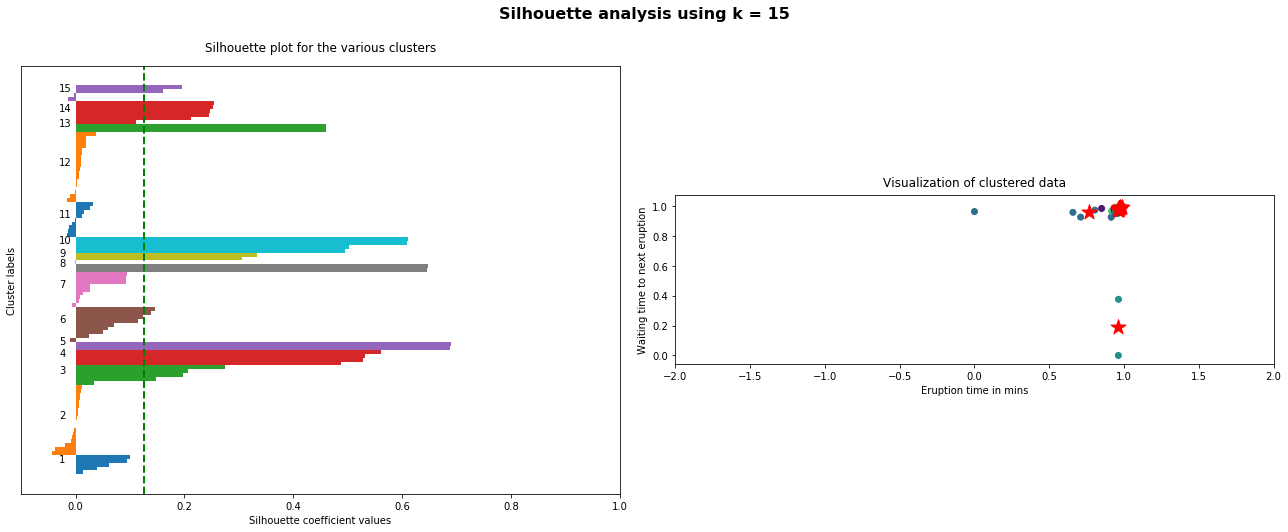

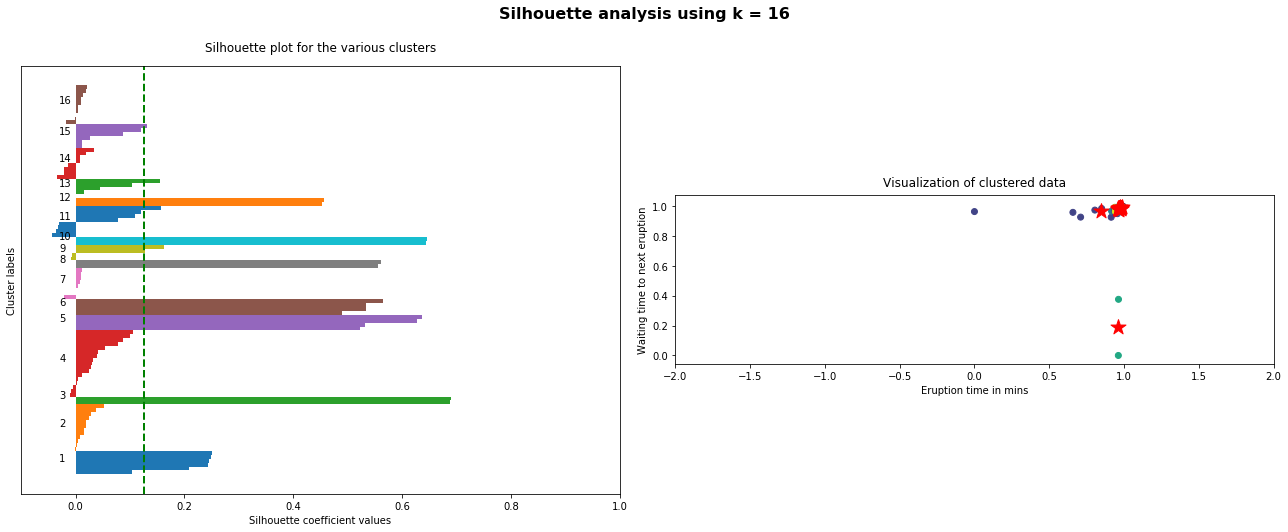

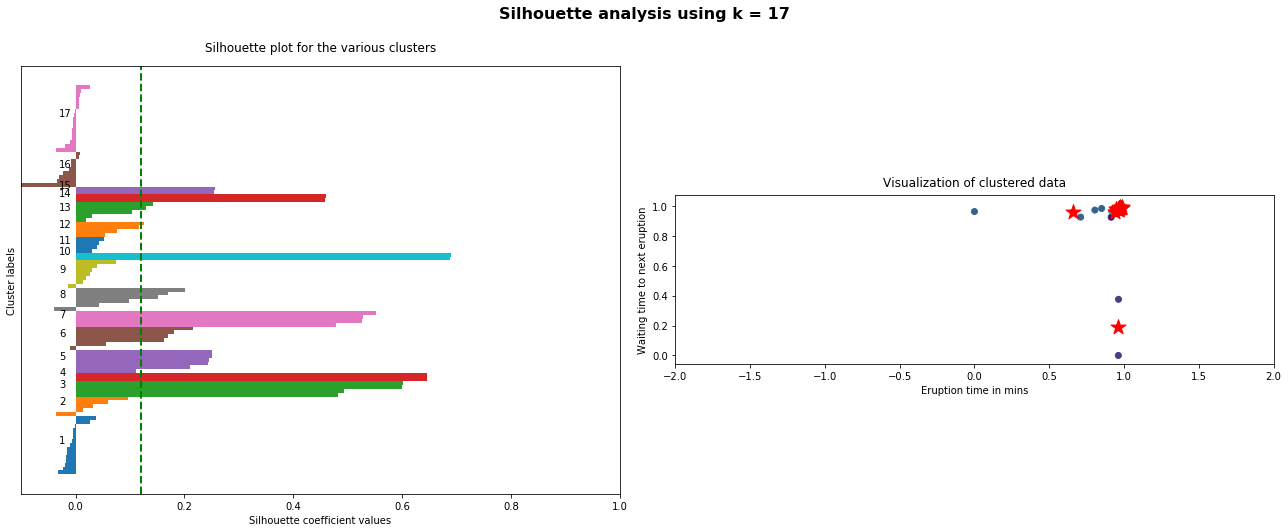

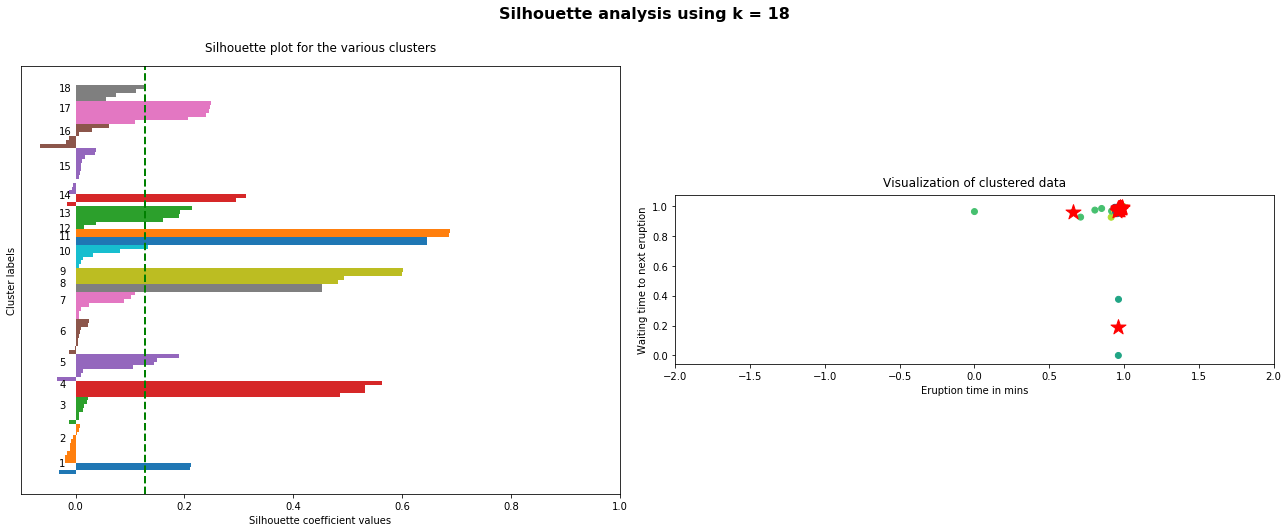

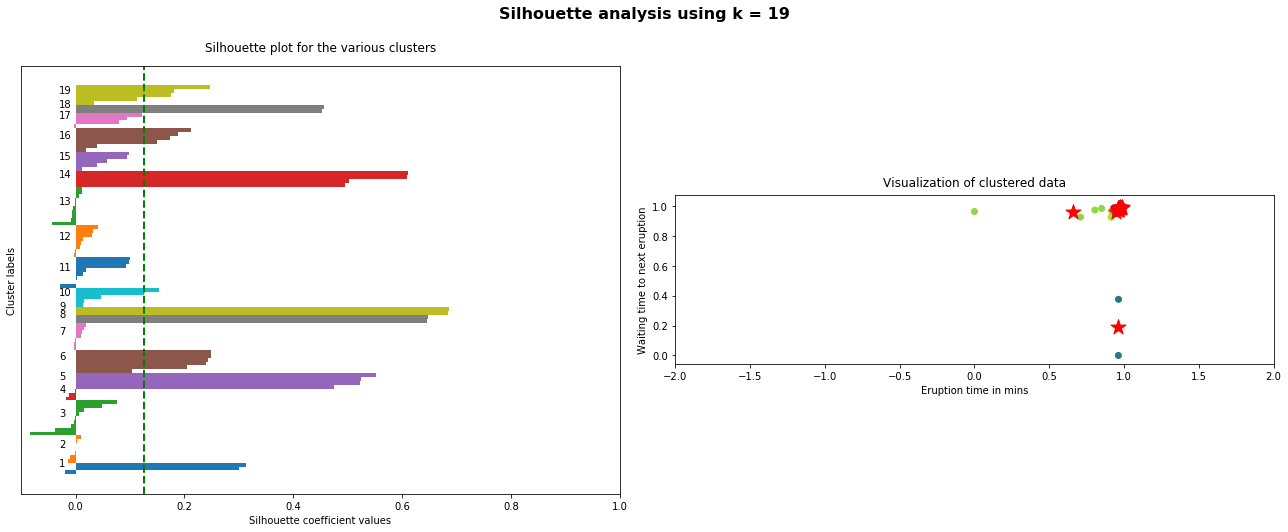

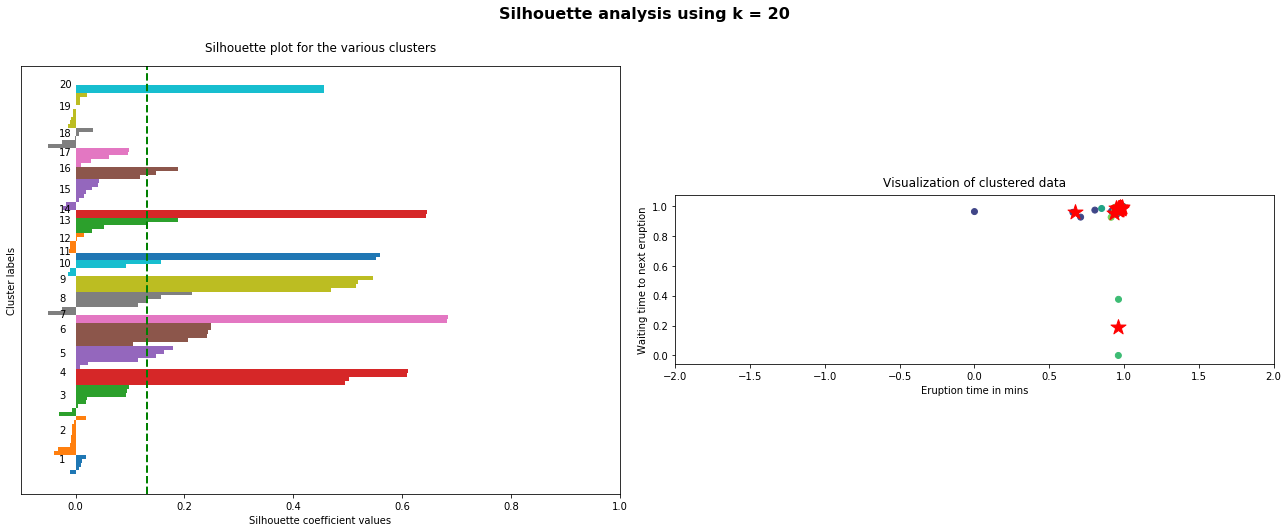

In [280]:
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42)
    labels = km.fit_predict(dist)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dist, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average score for {} is {}".format(i+1,avg_score))
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dist[:, 0], dist[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

For Cosine Similarity K=16 looks good. Also the silhouette scores of K-mean algorithms are very less compared to agglomerative (shown below) beacuse K-means try to keep the size of cluster comparable and Agglomerative clusters don't take into account the size of clusters. Now K=16 has a good average silhouette score compared to other neighbouring K values.

Average score for 2 is 0.44307971737292334
Average score for 3 is 0.45116135822293446
Average score for 4 is 0.4153996077913053
Average score for 5 is 0.4017105179774401
Average score for 6 is 0.4254391306595354
Average score for 7 is 0.4109158719245419
Average score for 8 is 0.411295308621253
Average score for 9 is 0.4065217833934972
Average score for 10 is 0.39331157173661896
Average score for 11 is 0.39273584770465453
Average score for 12 is 0.374658777414398
Average score for 13 is 0.3742941645062223
Average score for 14 is 0.3725656100694746
Average score for 15 is 0.3466423986354228
Average score for 16 is 0.3416187350774938
Average score for 17 is 0.3615232471954798
Average score for 18 is 0.3768536345687253
Average score for 19 is 0.34229067138604224
Average score for 20 is 0.35199167324087377


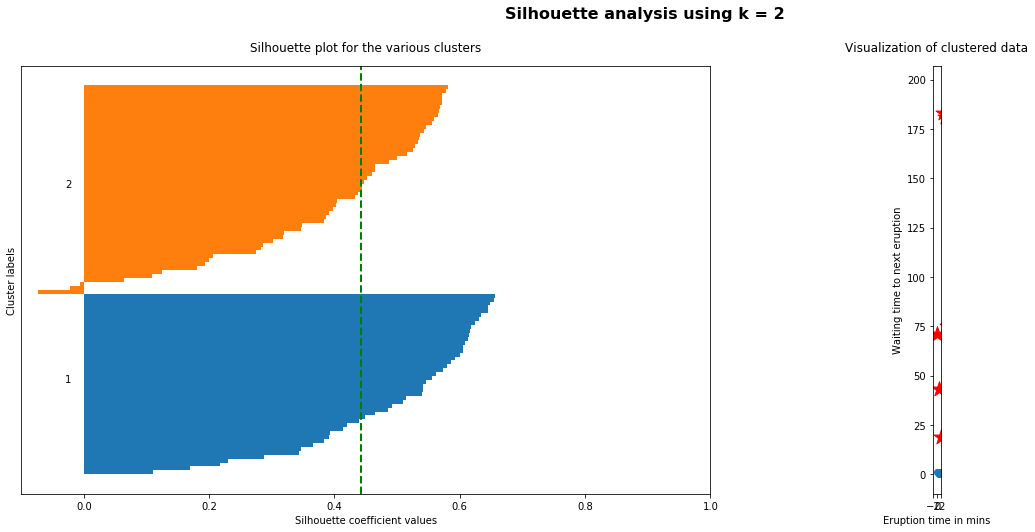

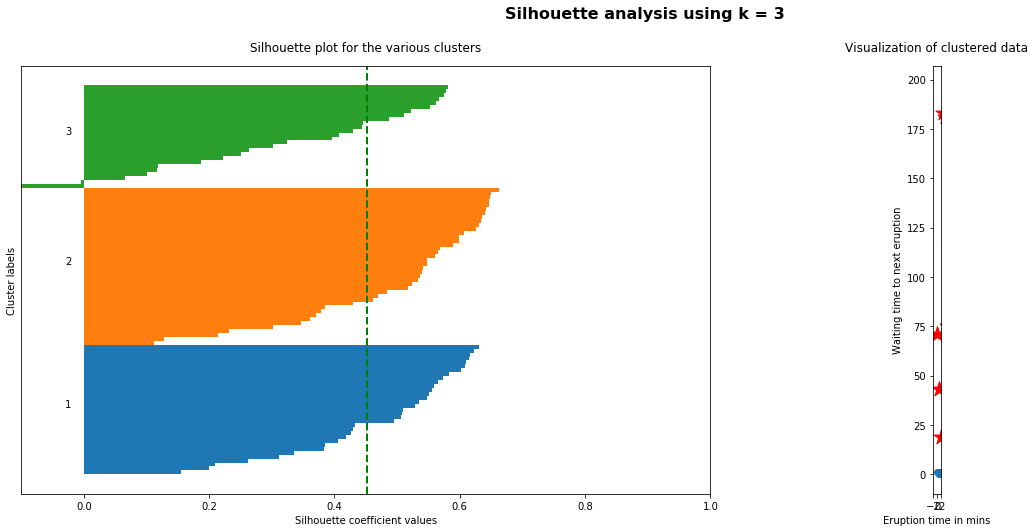

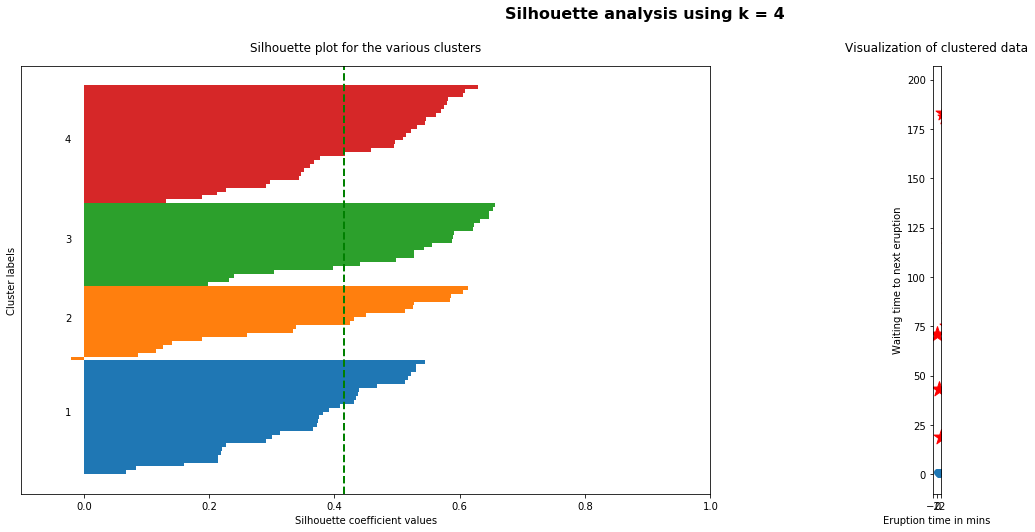

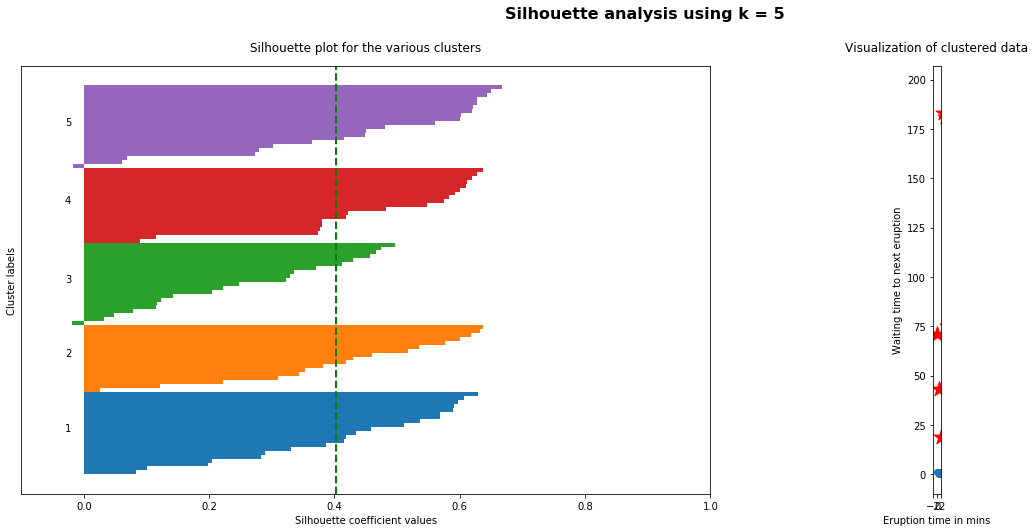

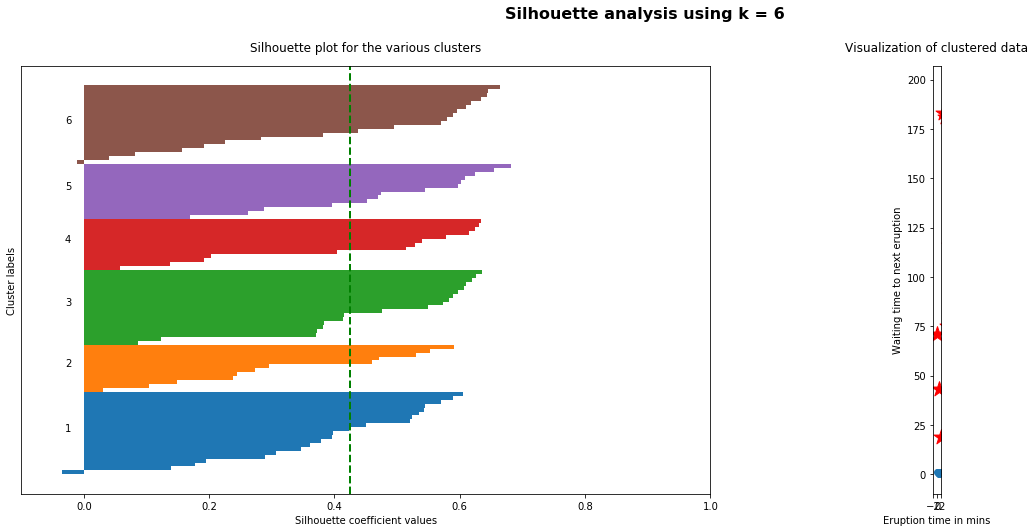

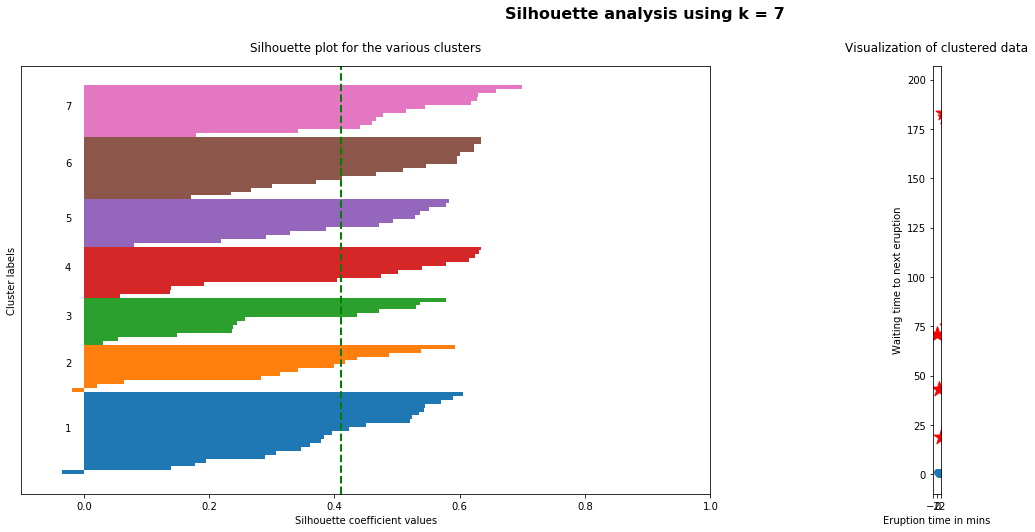

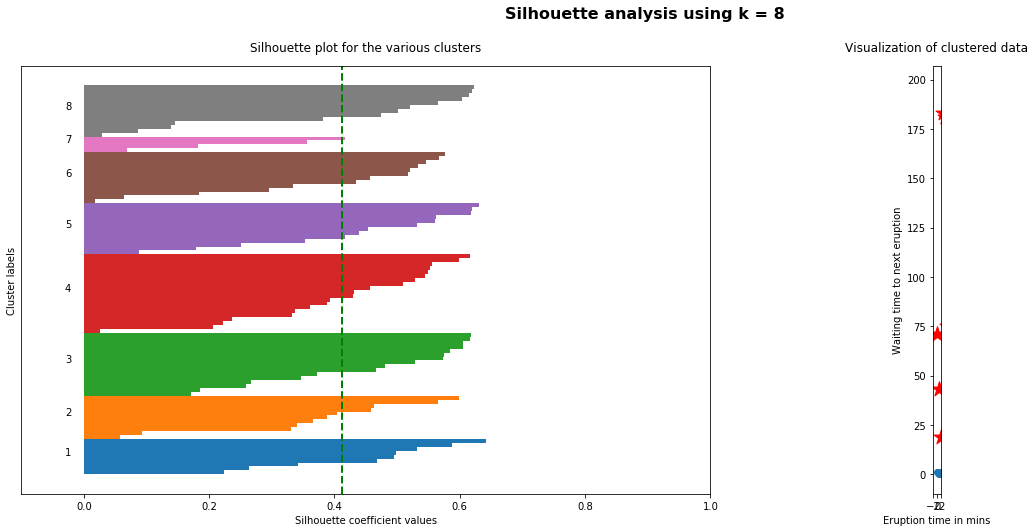

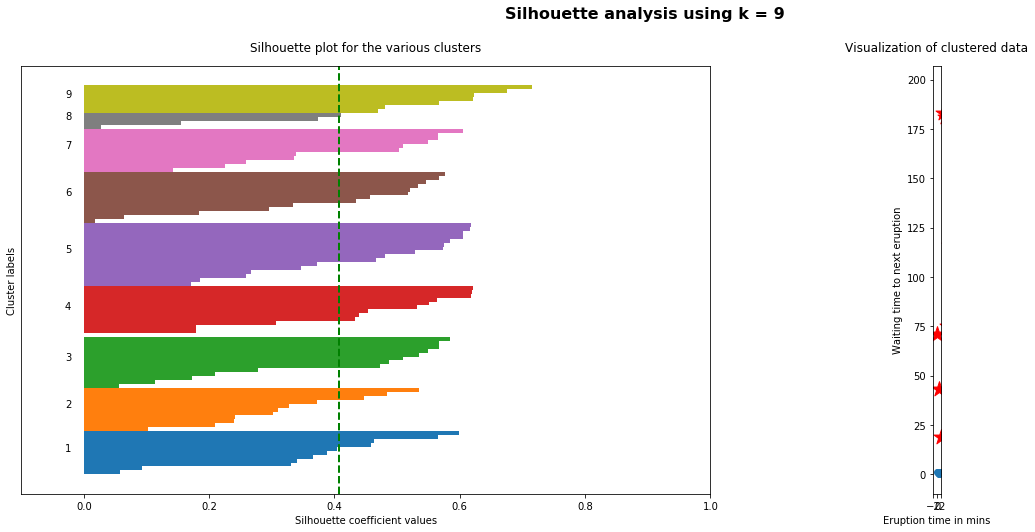

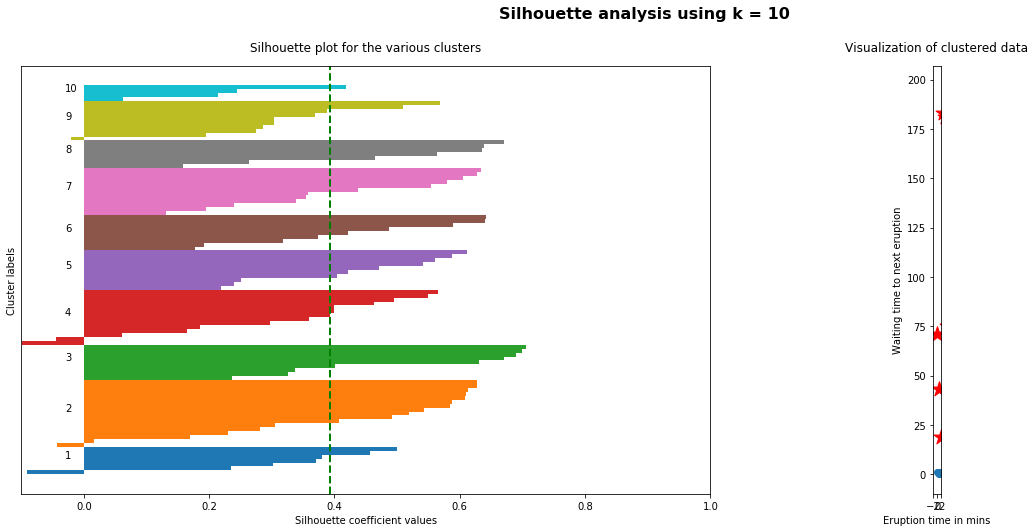

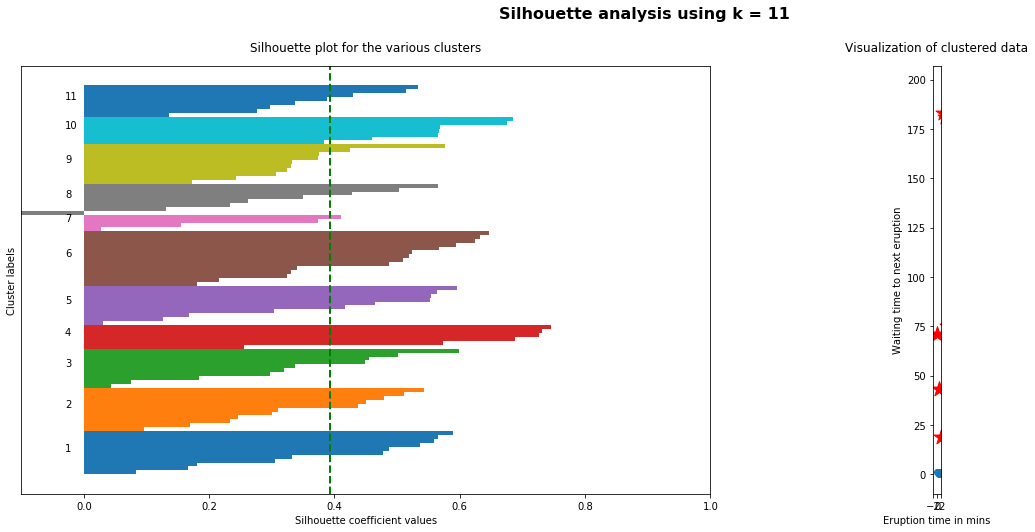

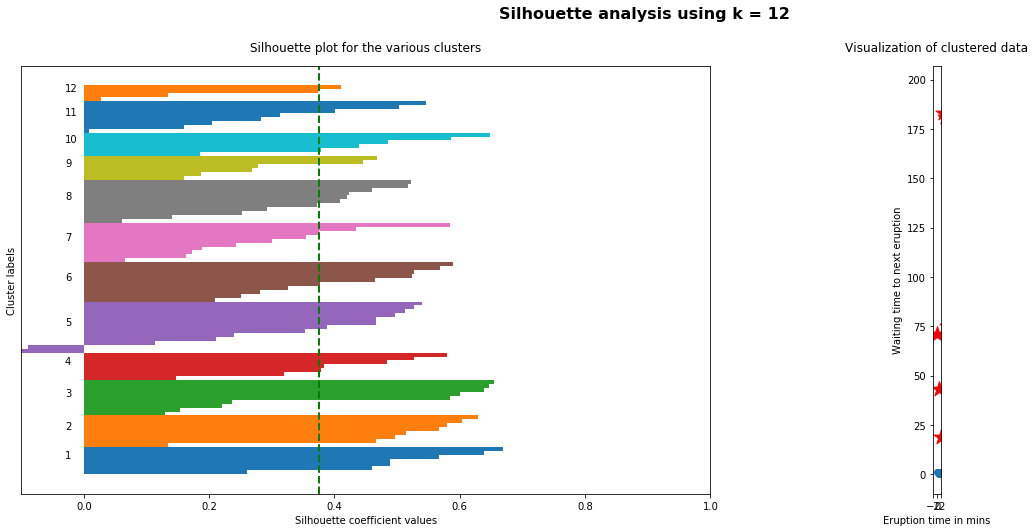

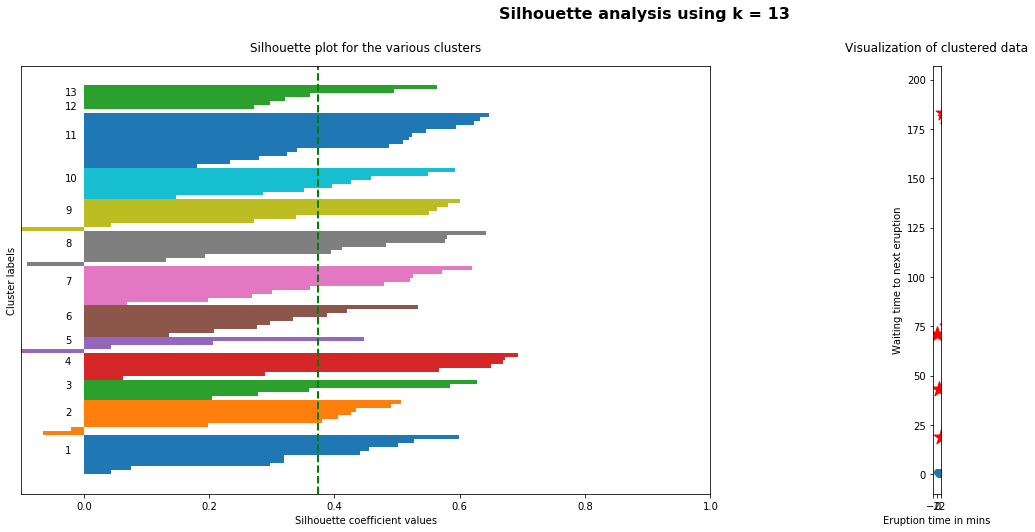

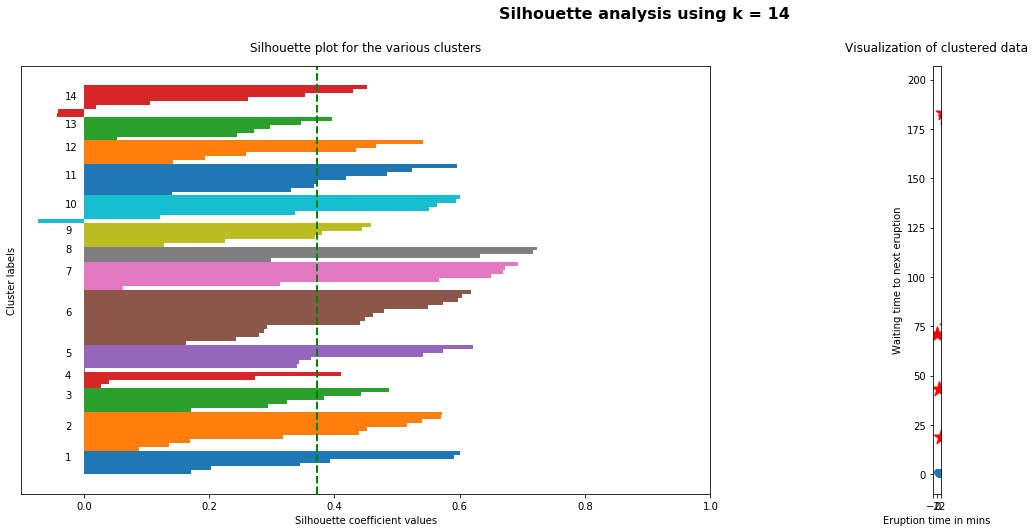

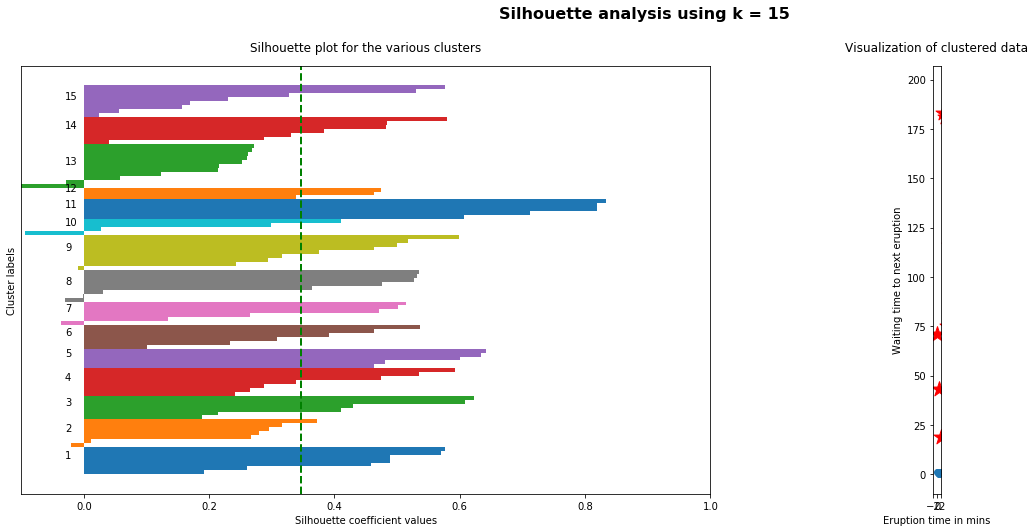

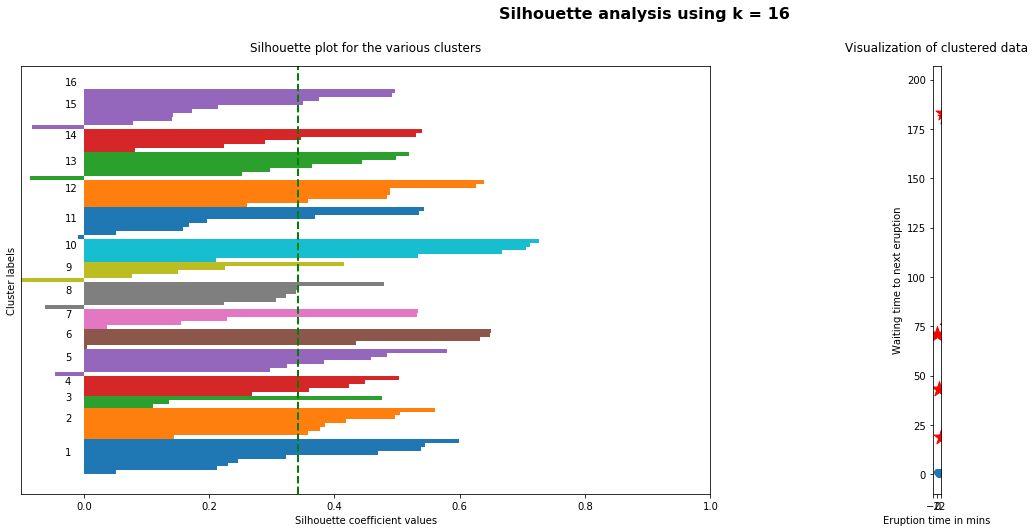

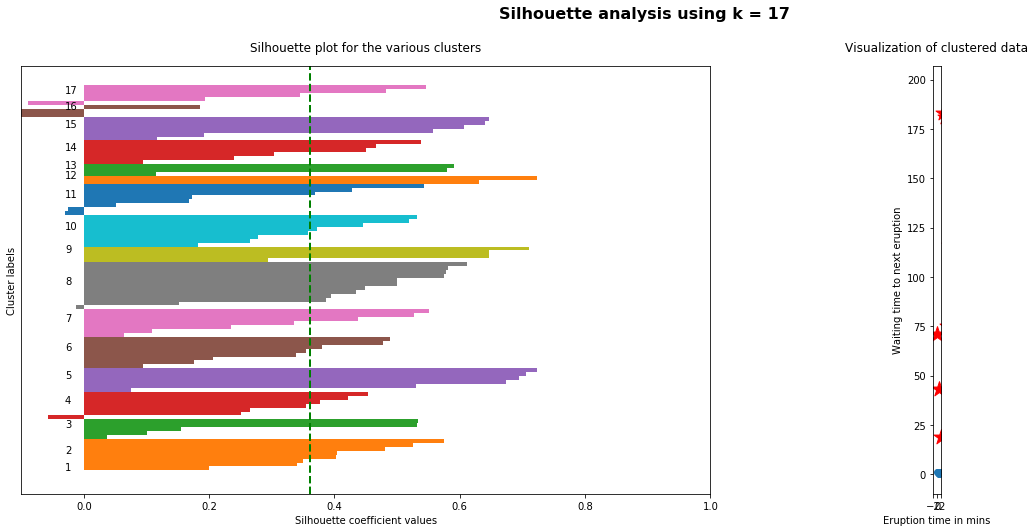

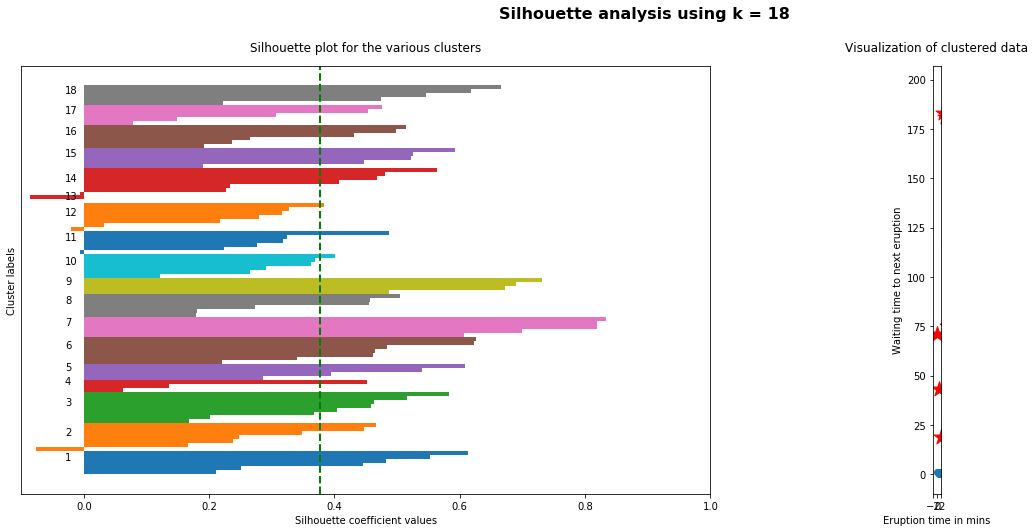

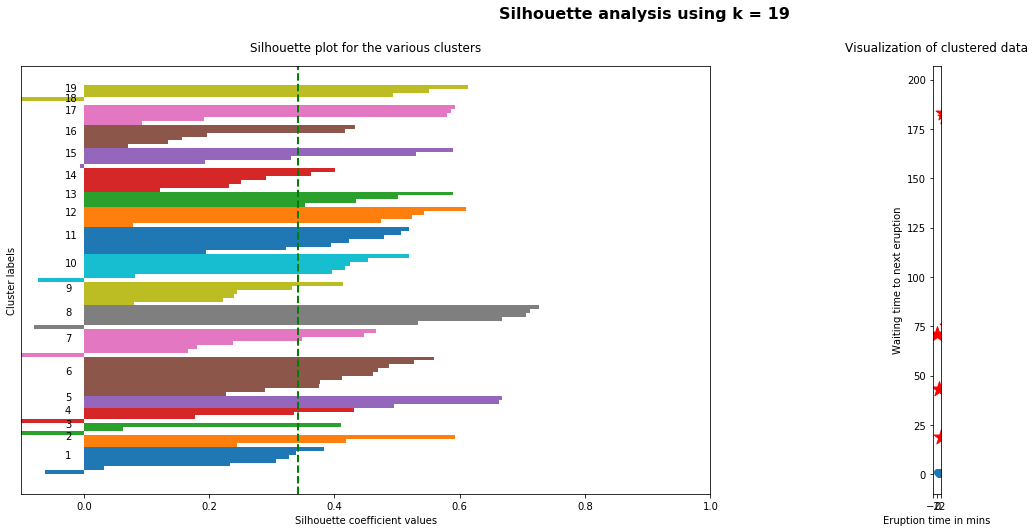

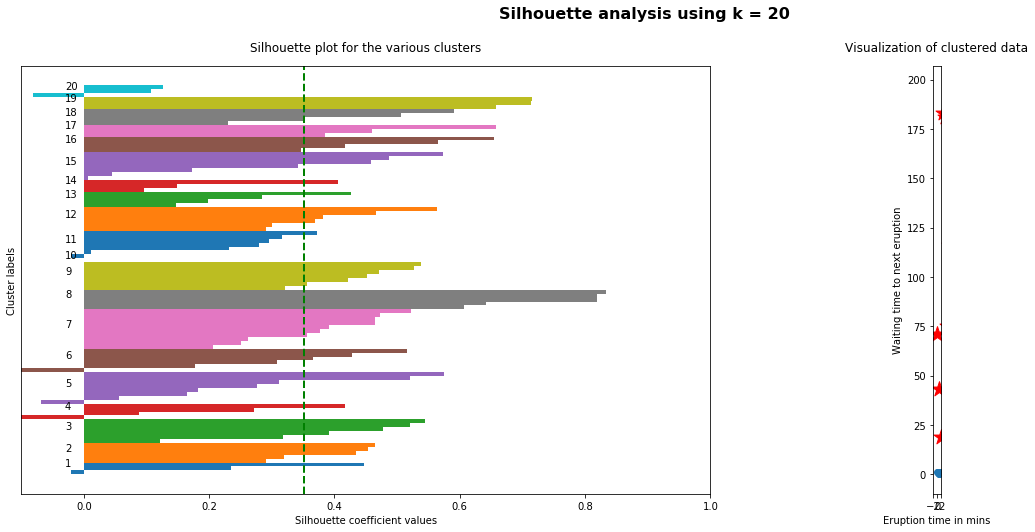

In [284]:
Z = linkage(vectorized_corpus, 'single')
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42)
    labels = km.fit_predict(Z)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(Z, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average score for {} is {}".format(i+1,avg_score))
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dist[:, 0], dist[:, 1])
    ax2.scatter(Z[:, 0], Z[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

For Single Linkage K=7 looks like a good arguement, because the average silhouette score is good and all the clusters have final silhouette score greater than the average silhouette score. The almost equal widths in the graph for K=7 shows that the data-set is divided into 7 distinct clusters.

Average score for 2 is 0.6097766923313691
Average score for 3 is 0.48569331295325135
Average score for 4 is 0.4405353671790632
Average score for 5 is 0.42104488296470727
Average score for 6 is 0.4307476537022107
Average score for 7 is 0.4394503015148876
Average score for 8 is 0.443169487250357
Average score for 9 is 0.43521439485170094
Average score for 10 is 0.4588436546649751
Average score for 11 is 0.4685091784311834
Average score for 12 is 0.4680062952093224
Average score for 13 is 0.4496102417206533
Average score for 14 is 0.4538766338748498
Average score for 15 is 0.4423735326825402
Average score for 16 is 0.43020730902519355
Average score for 17 is 0.4345643065417972
Average score for 18 is 0.4320401672136341
Average score for 19 is 0.4321159494160671
Average score for 20 is 0.41087862034278183


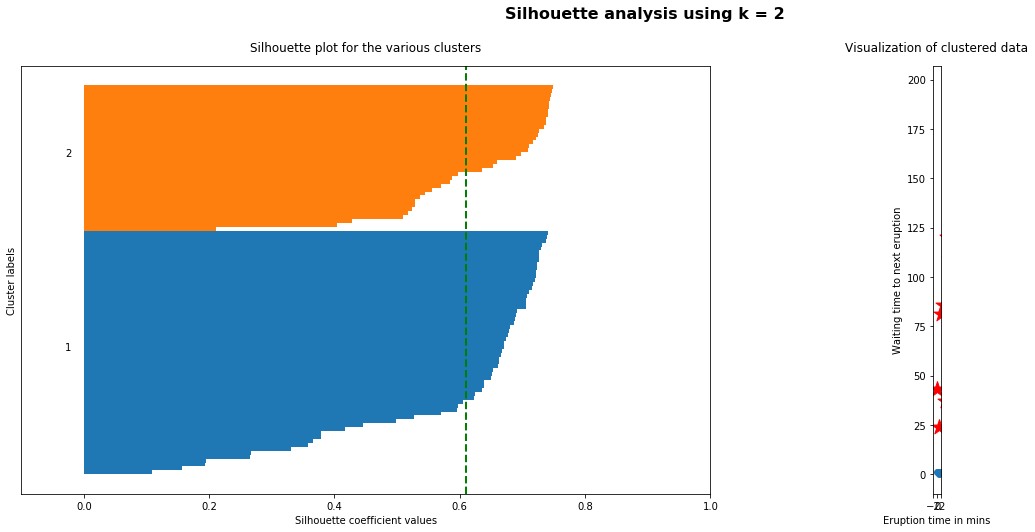

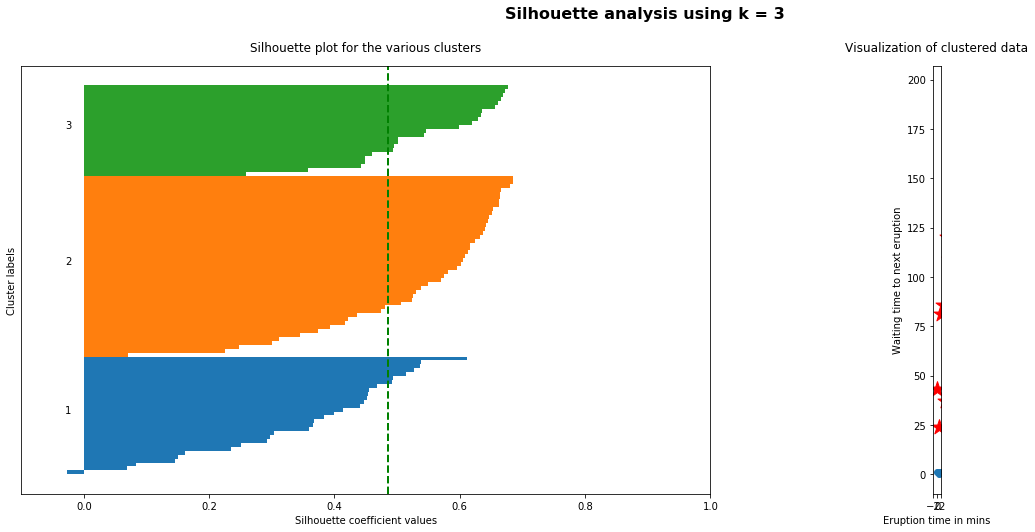

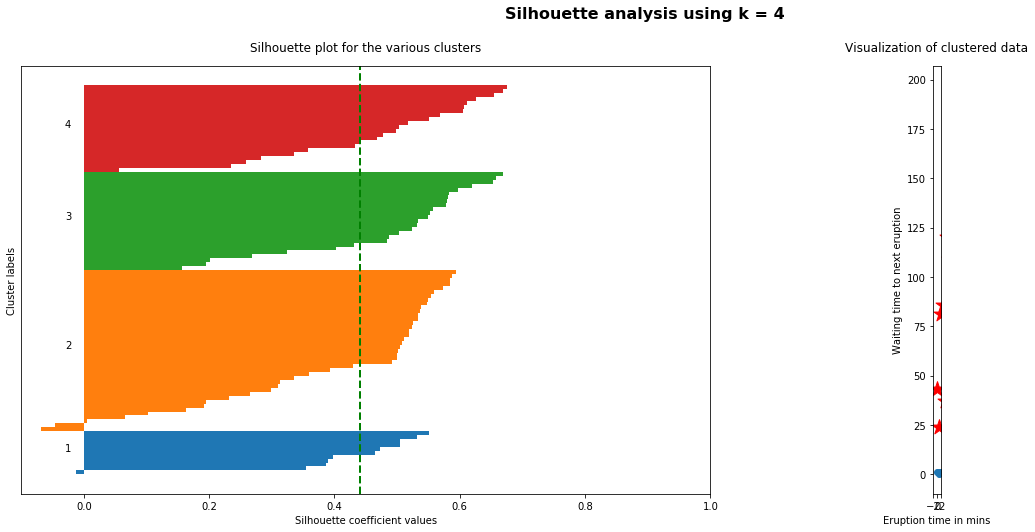

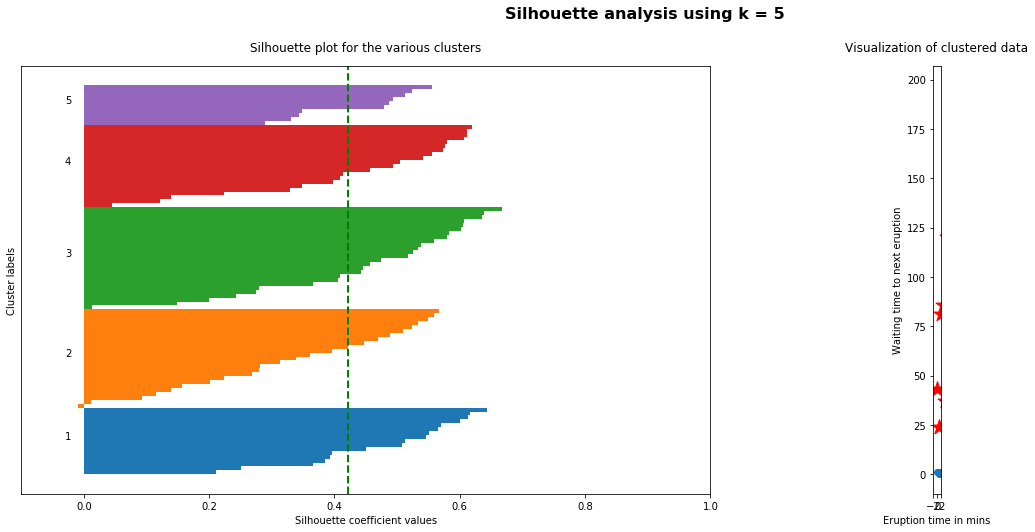

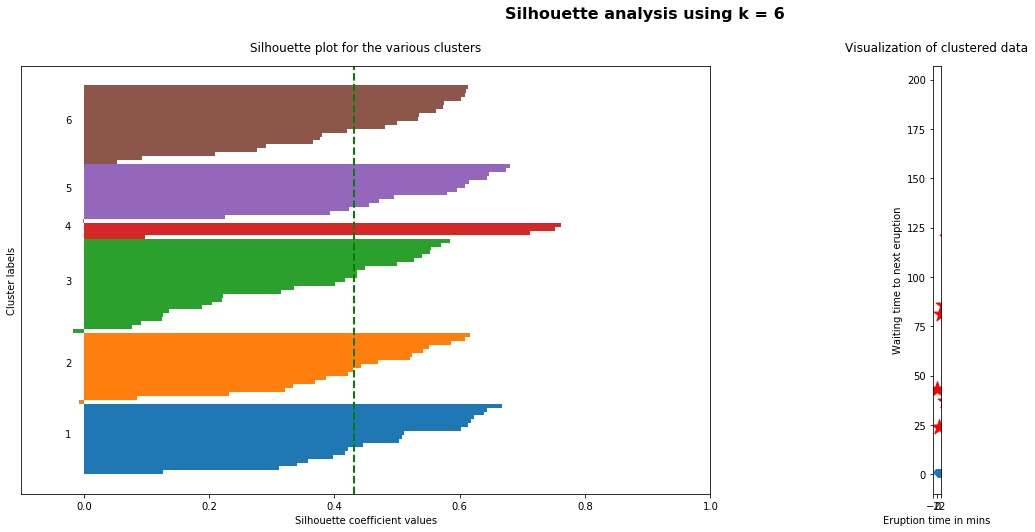

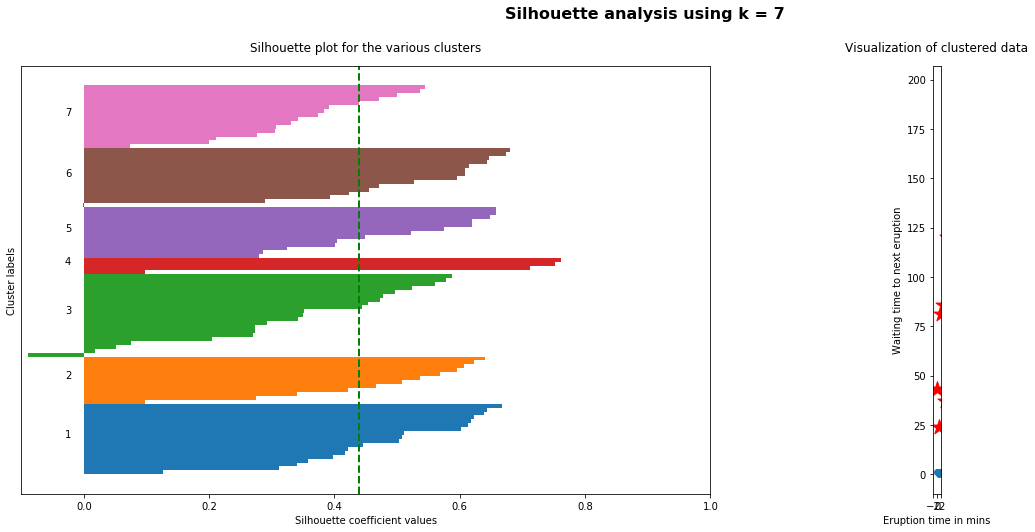

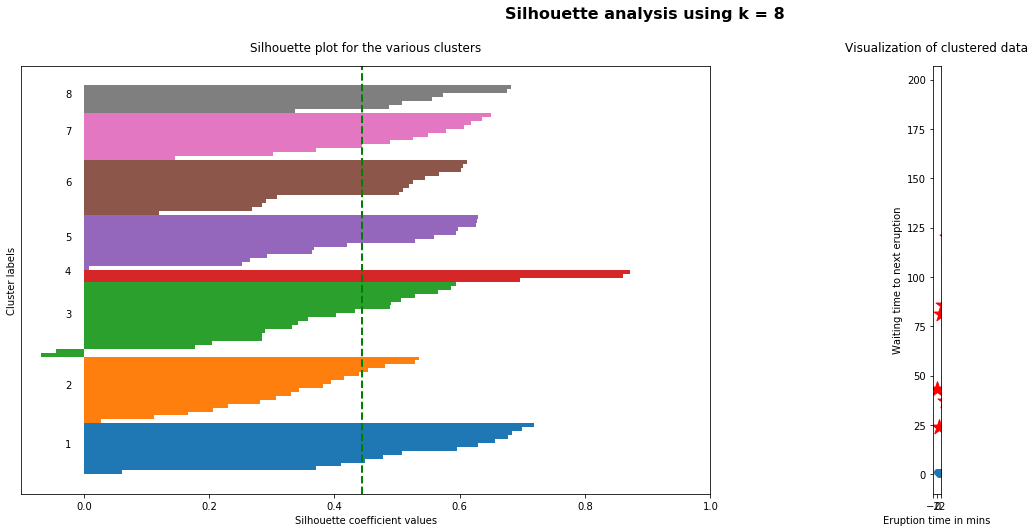

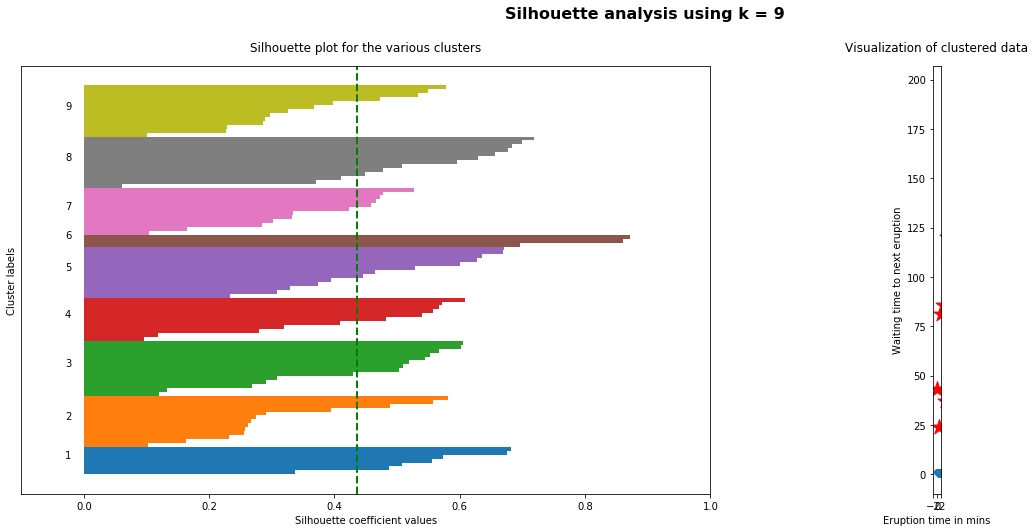

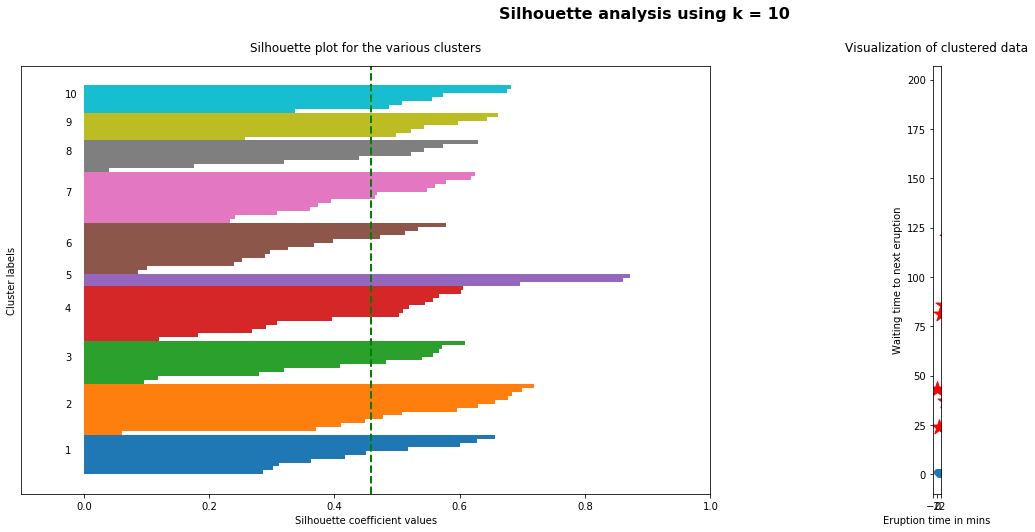

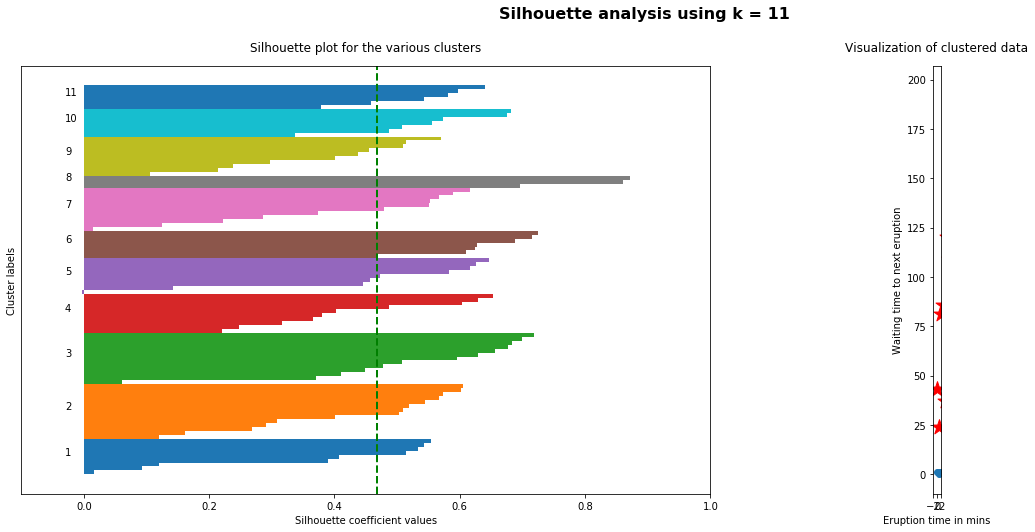

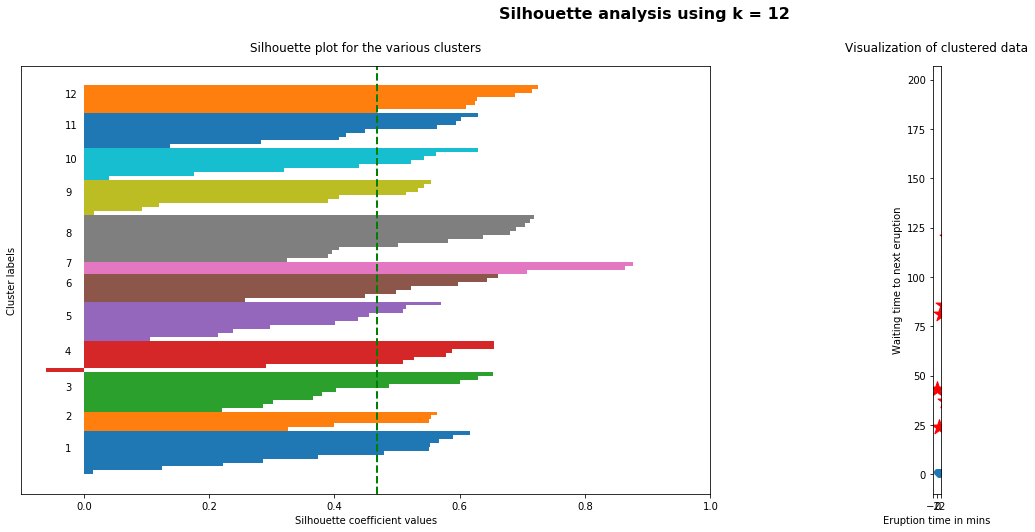

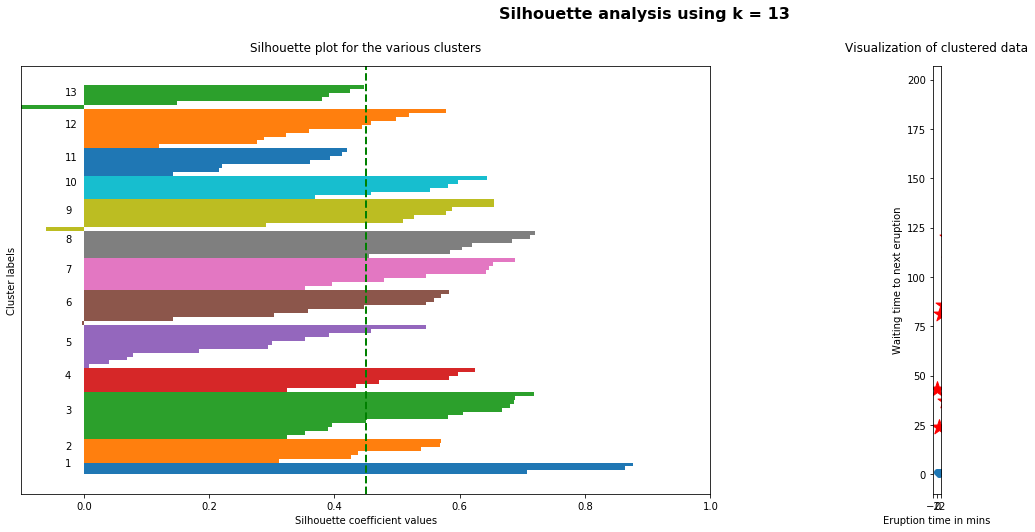

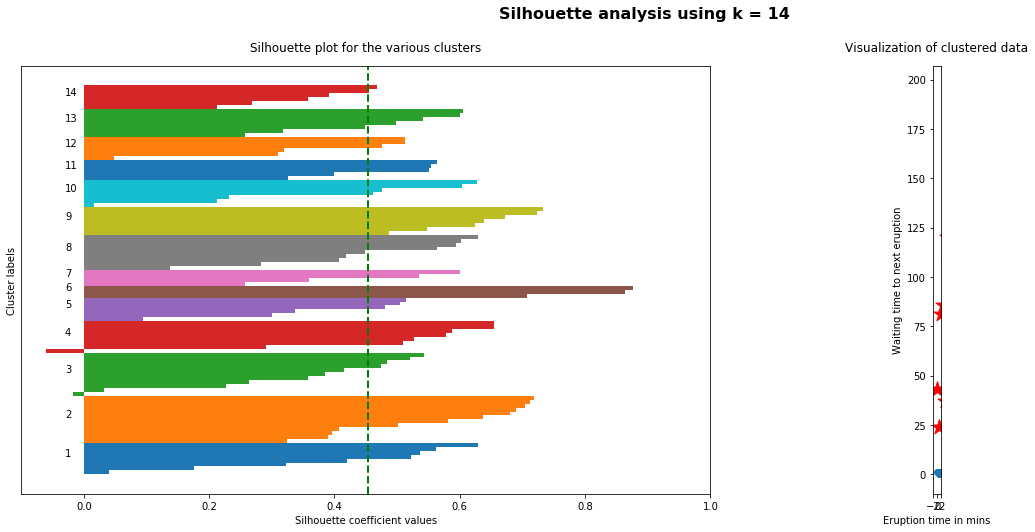

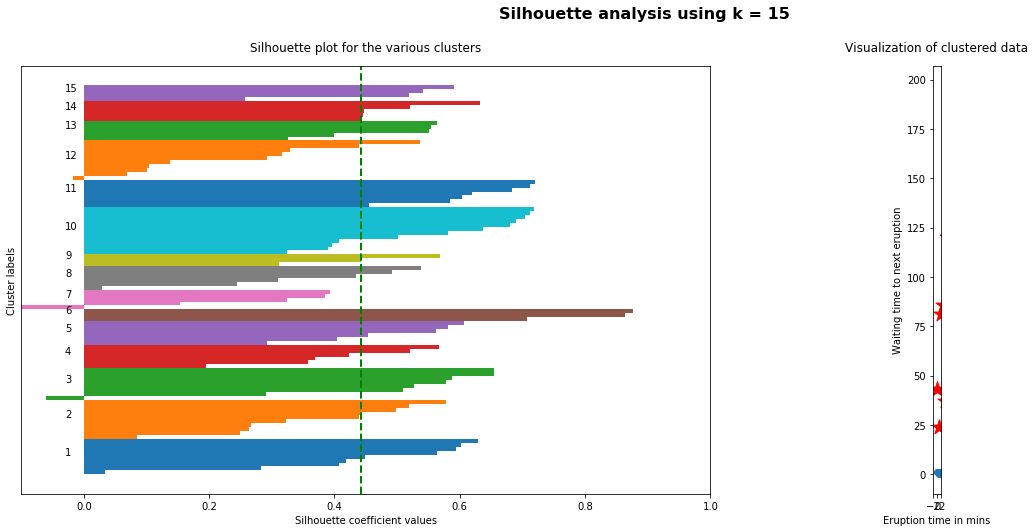

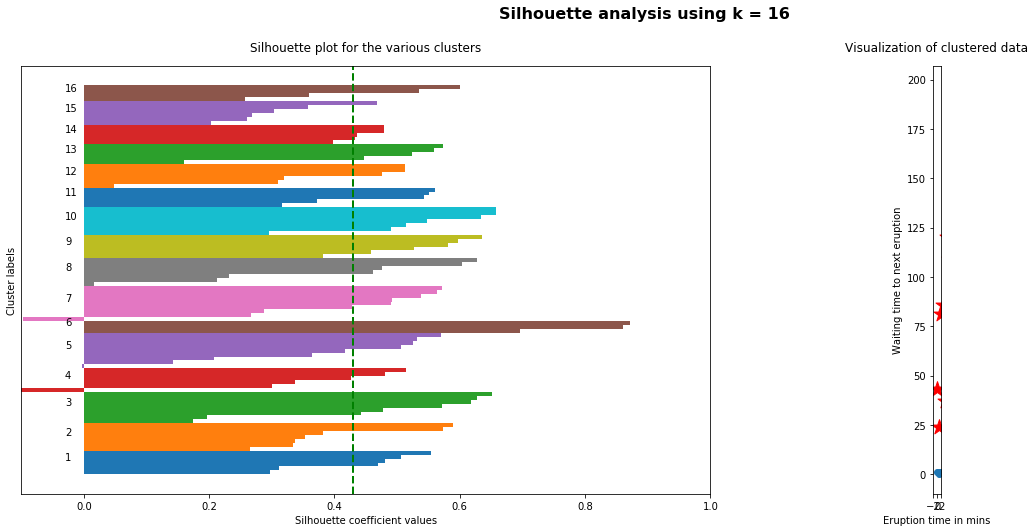

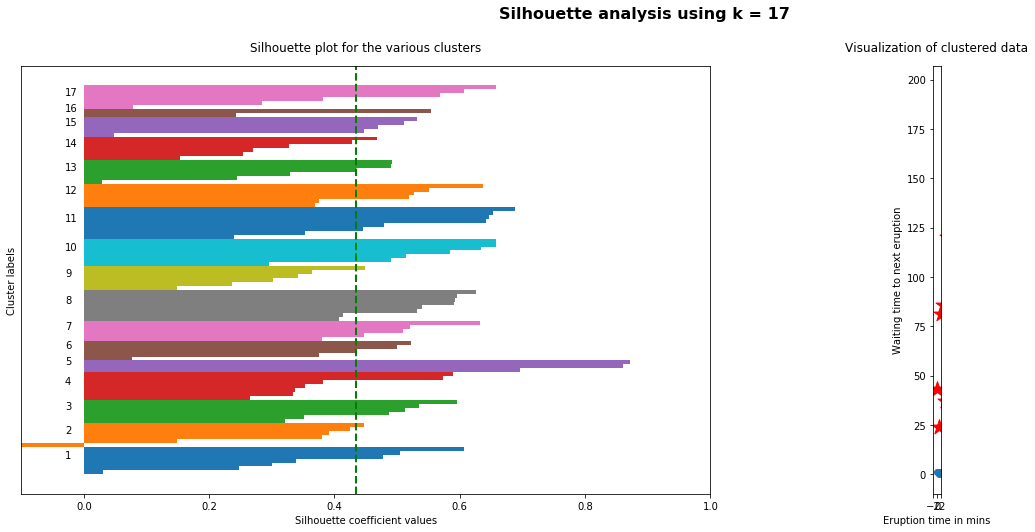

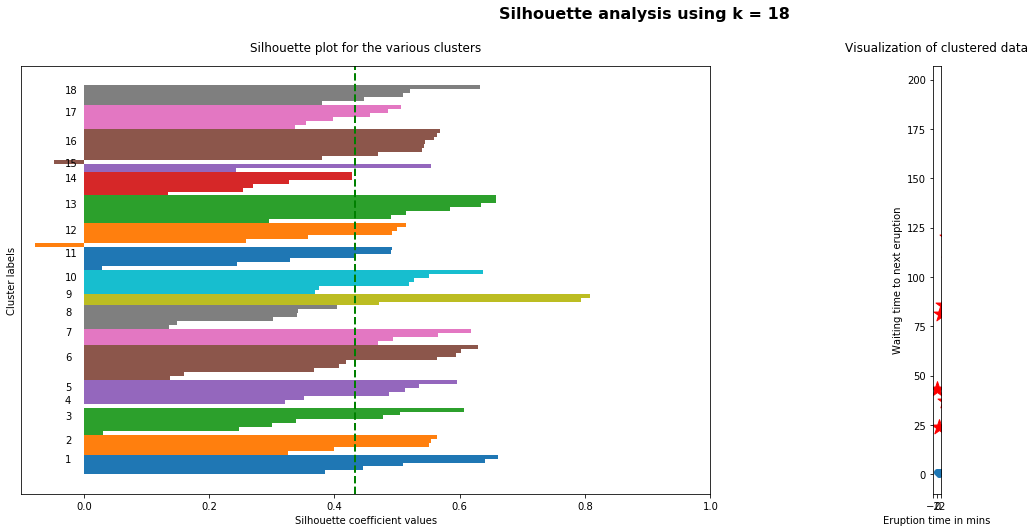

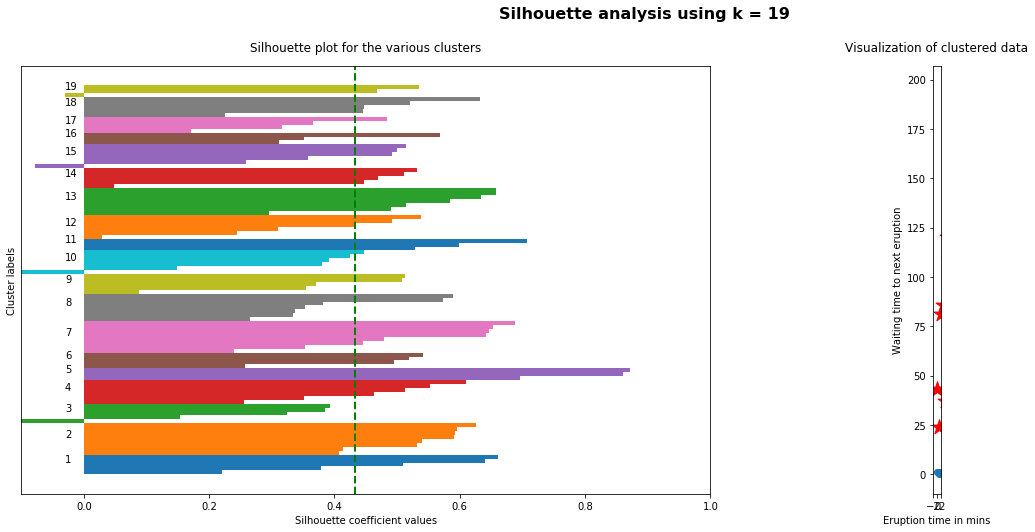

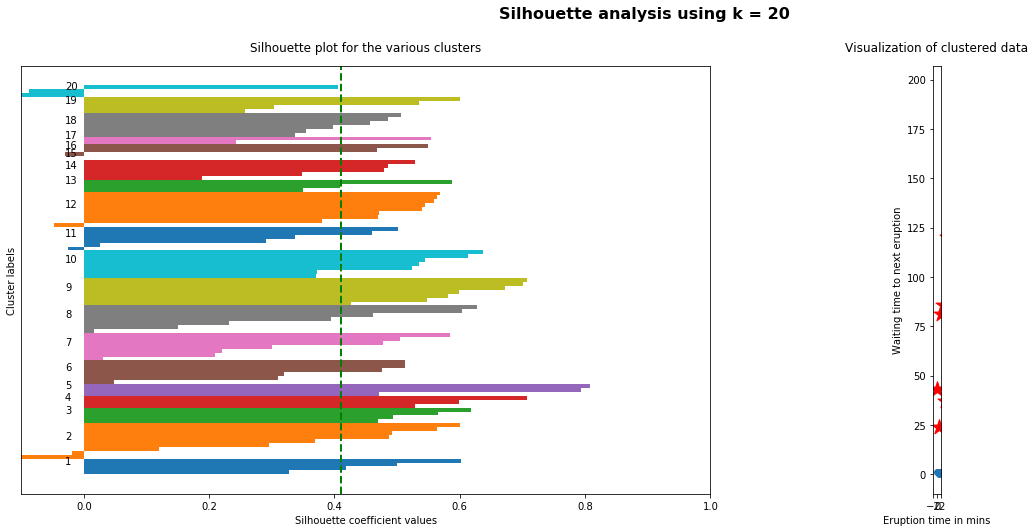

In [88]:
Z = linkage(vectorized_corpus, 'complete')
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42)
    labels = km.fit_predict(Z)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(Z, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average score for {} is {}".format(i+1,avg_score))
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dist[:, 0], dist[:, 1])
    ax2.scatter(Z[:, 0], Z[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

For Complete Linkage K=2 looks a good arguement, because the average silhouette score is the highest and cluster widths are approximately equal shows a good distribution (less skewed) of our data-set.

Average score for 2 is 0.5278054337462486
Average score for 3 is 0.3941051146245124
Average score for 4 is 0.41431400607718066
Average score for 5 is 0.4355452669966621
Average score for 6 is 0.4482073039798875
Average score for 7 is 0.4204856028616285
Average score for 8 is 0.38723767308379237
Average score for 9 is 0.39417773885981927
Average score for 10 is 0.39479877588378787
Average score for 11 is 0.3955582857189657
Average score for 12 is 0.39329392952547004
Average score for 13 is 0.41691188165944537
Average score for 14 is 0.4295659708149572
Average score for 15 is 0.4163676794900141
Average score for 16 is 0.4018757655740152
Average score for 17 is 0.38986771657859726
Average score for 18 is 0.42471754063377176
Average score for 19 is 0.38345448271455246
Average score for 20 is 0.39958132945839653


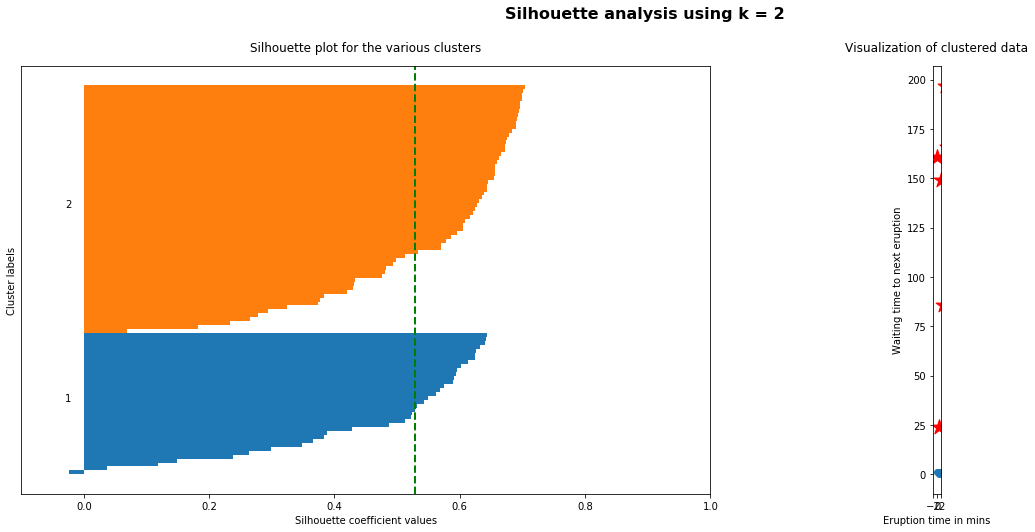

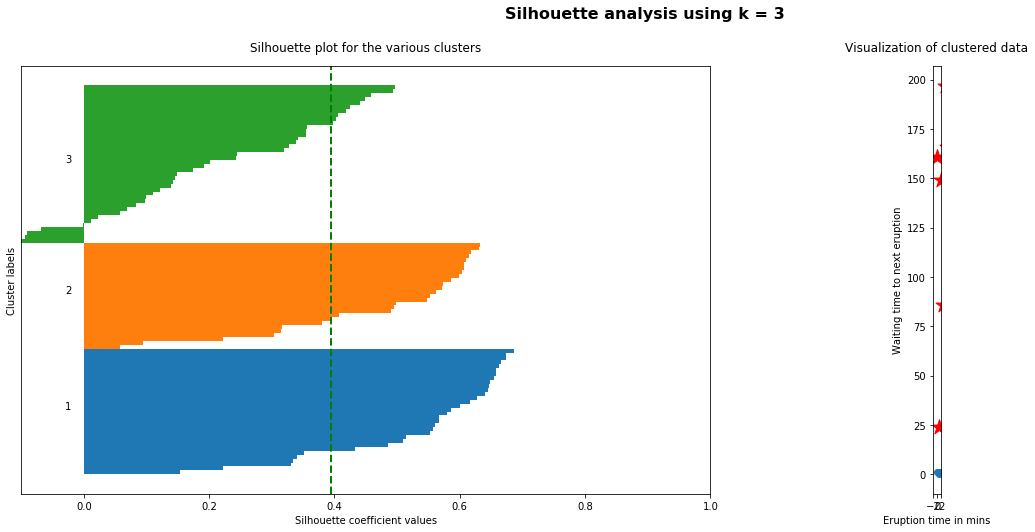

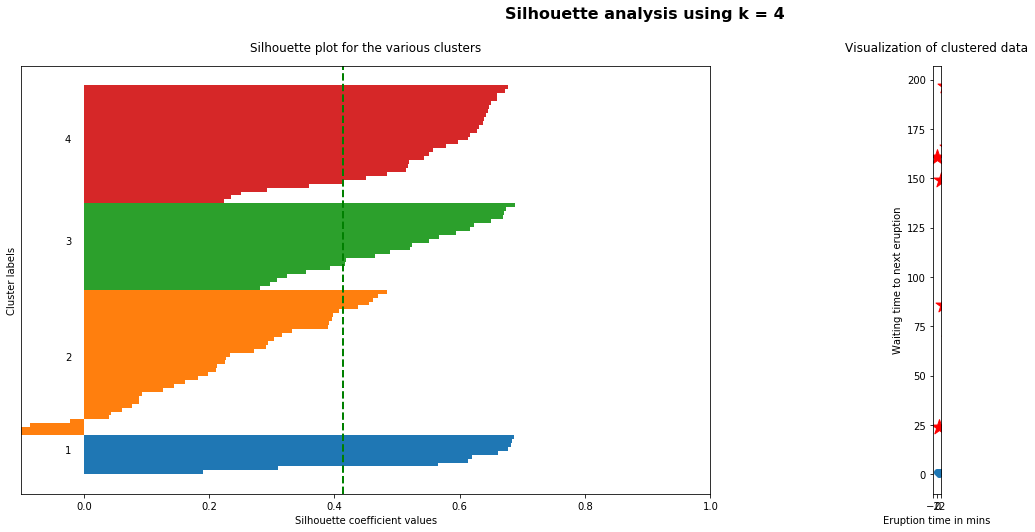

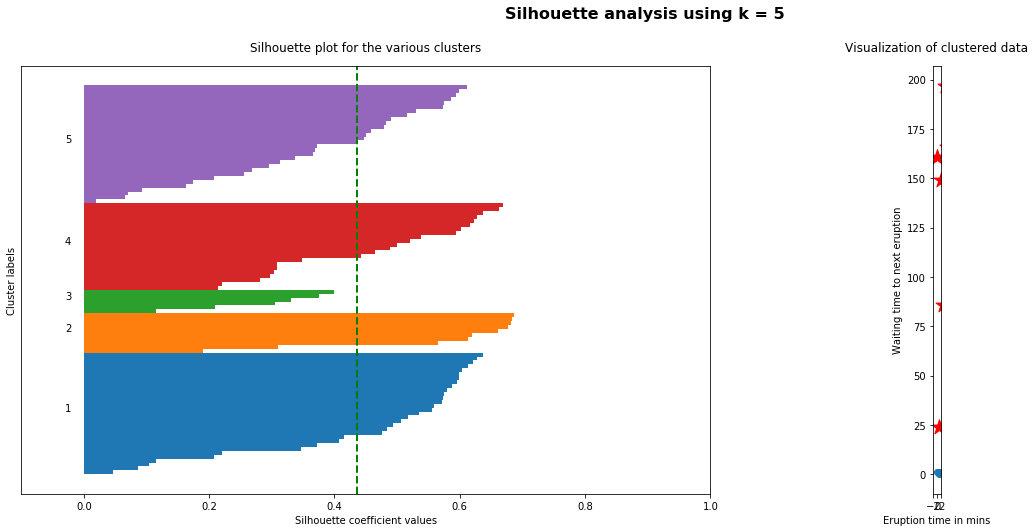

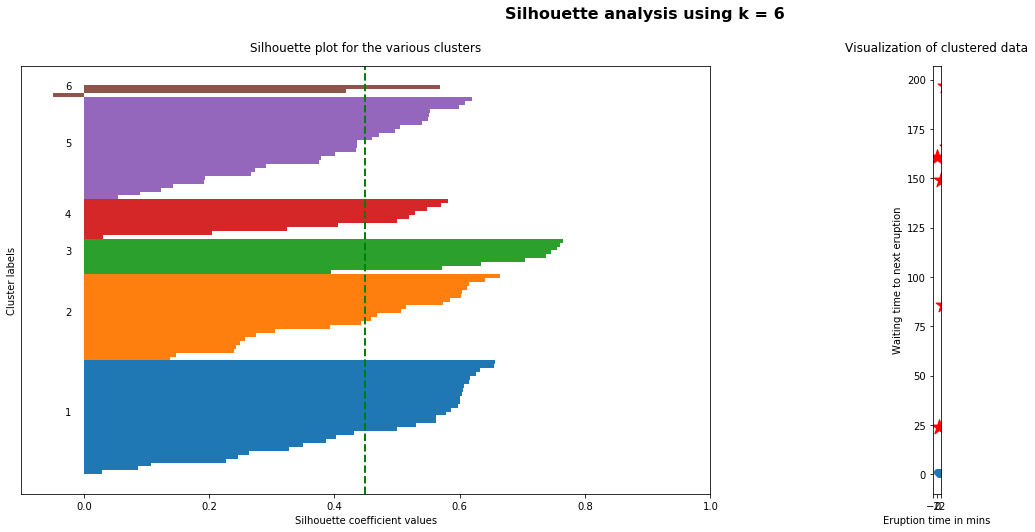

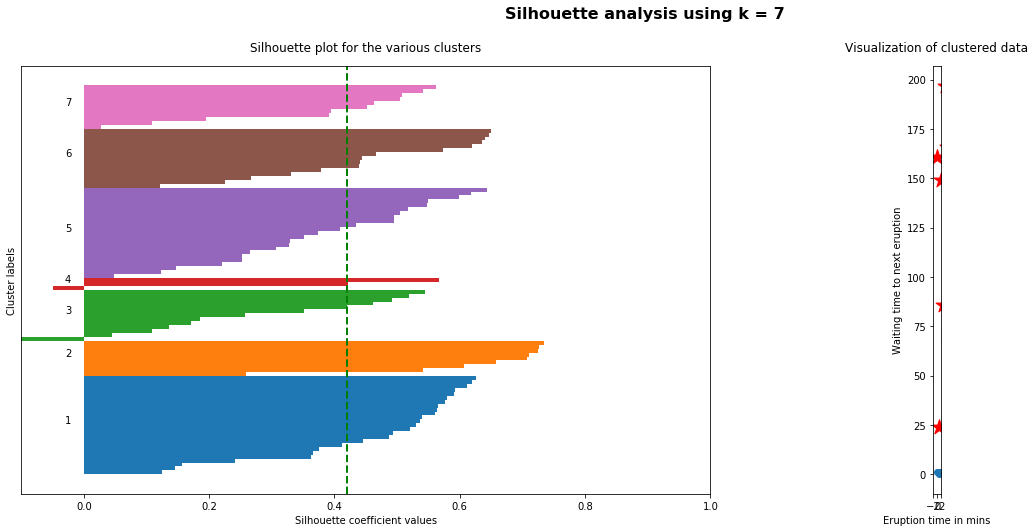

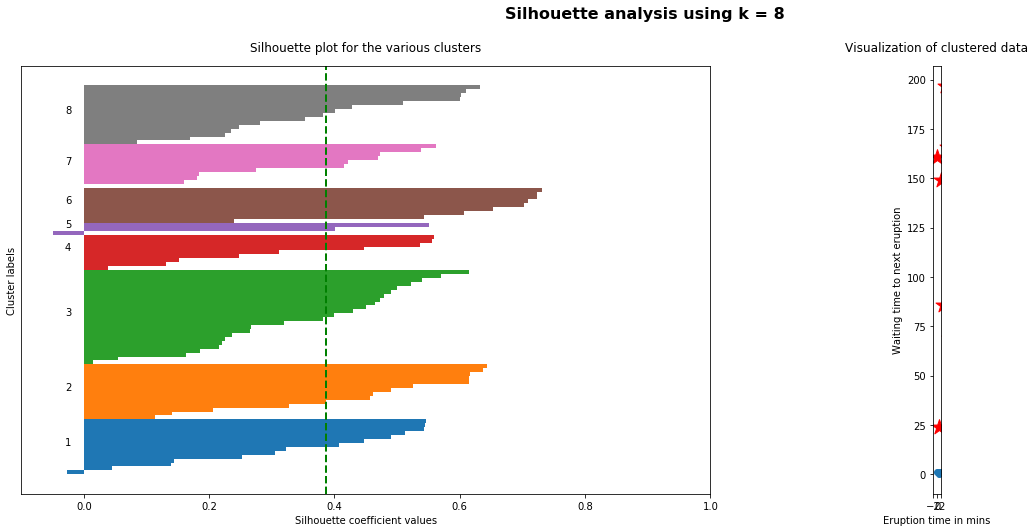

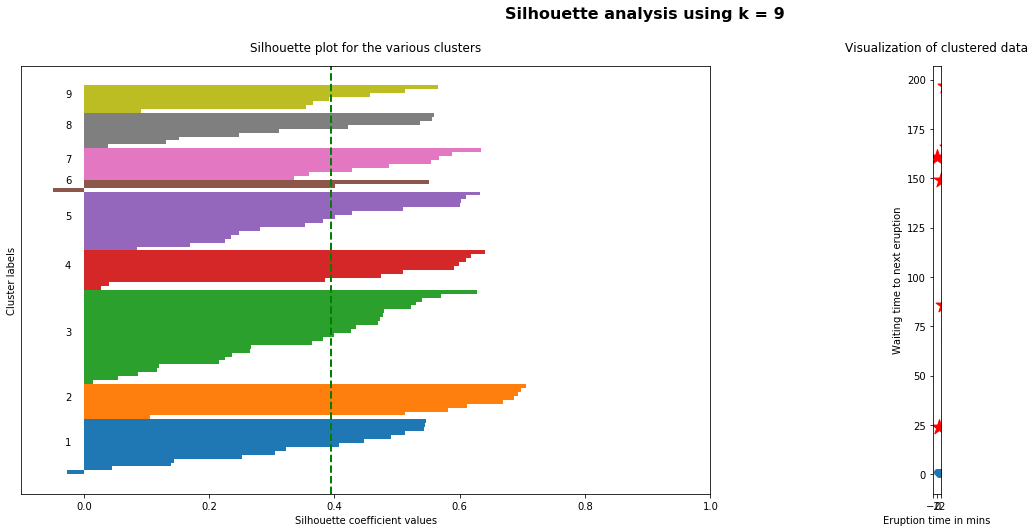

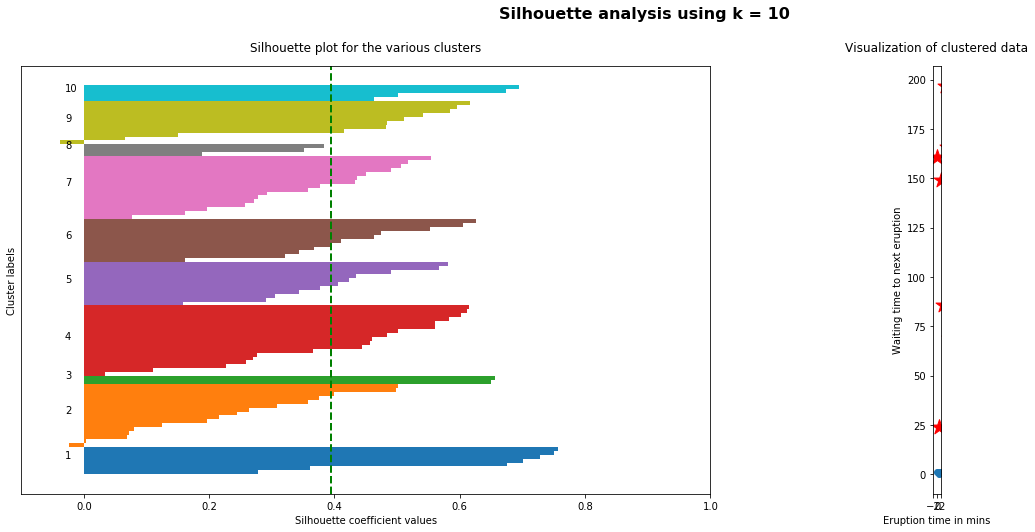

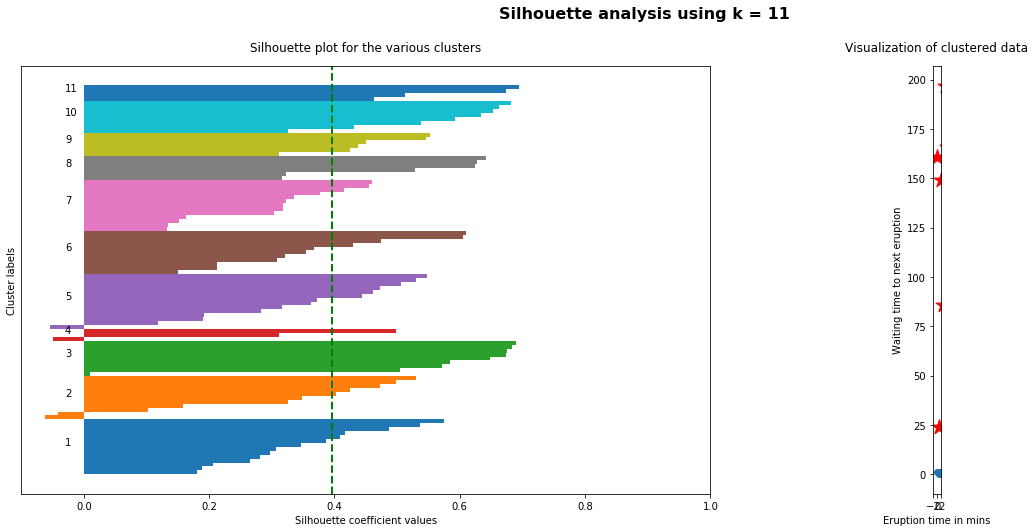

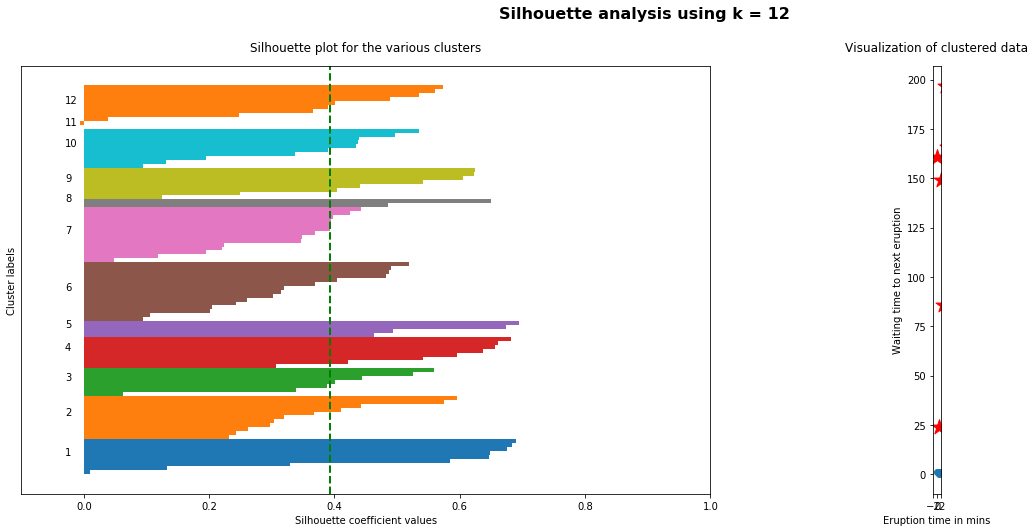

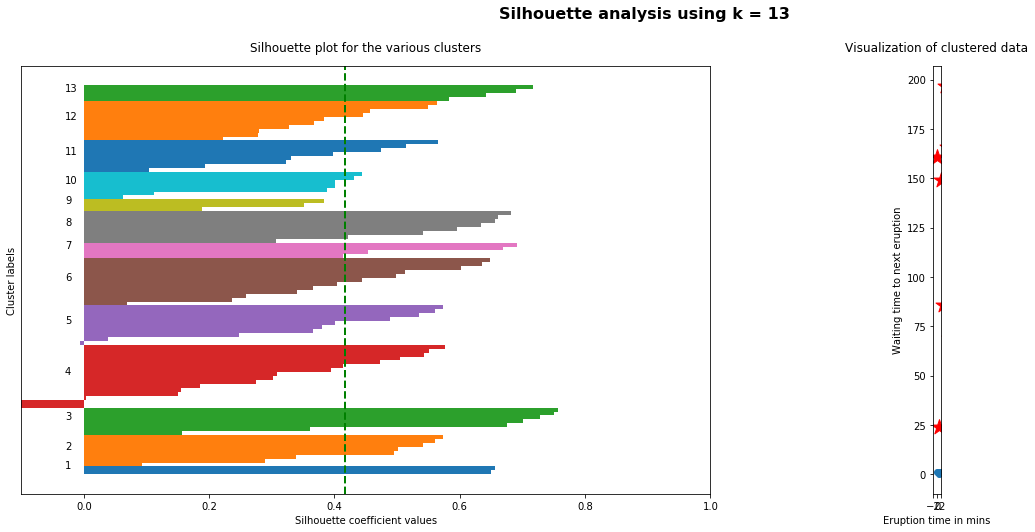

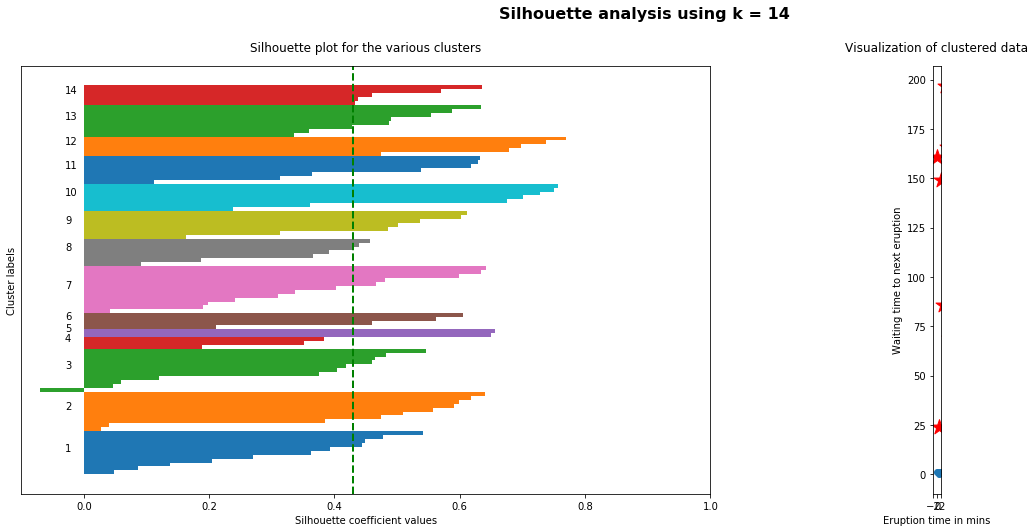

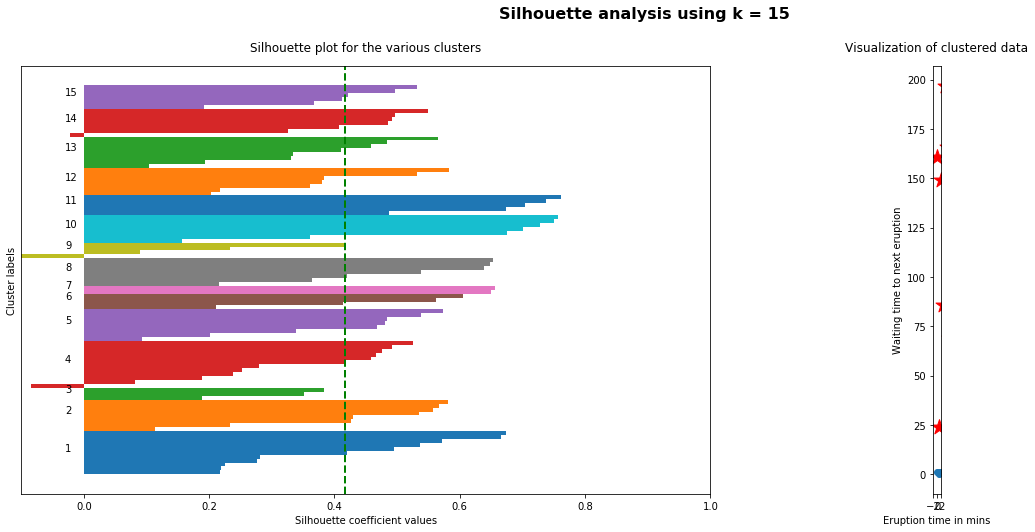

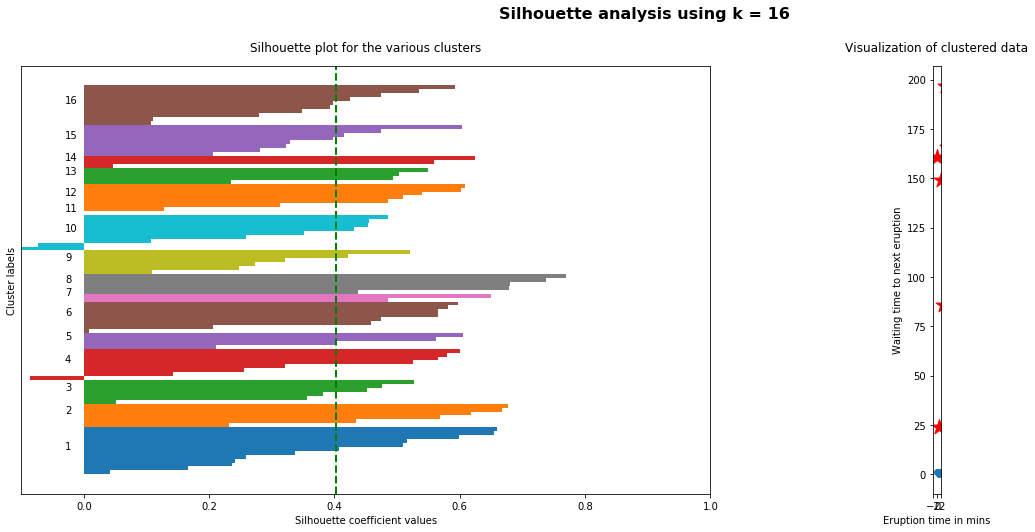

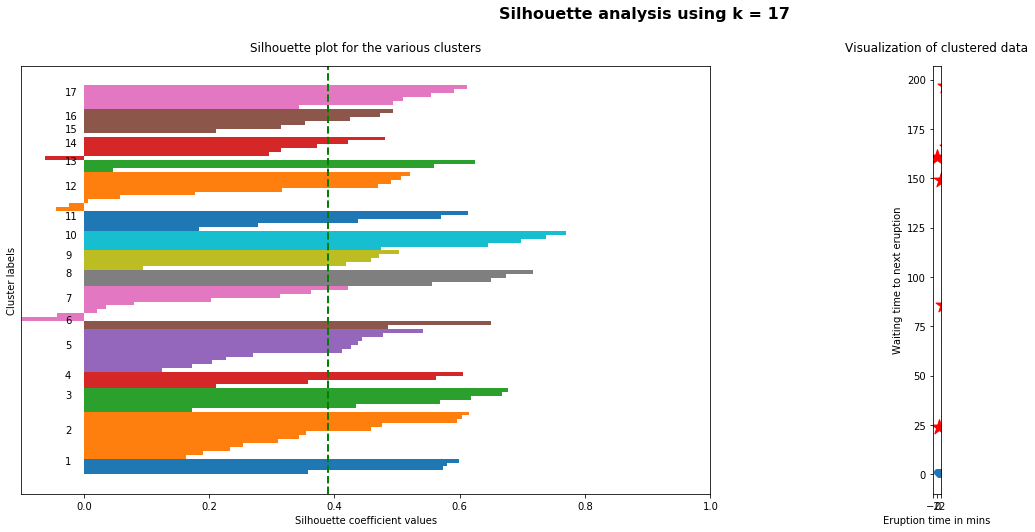

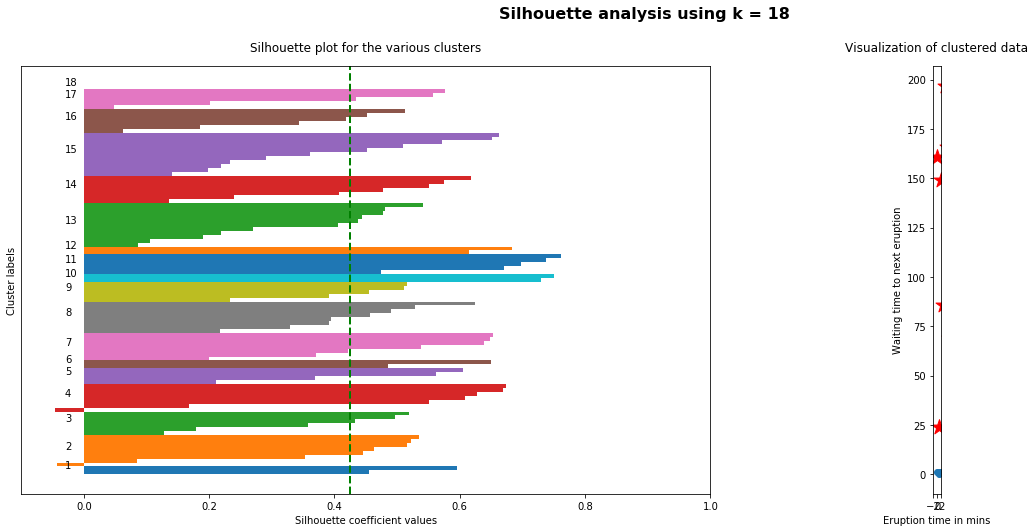

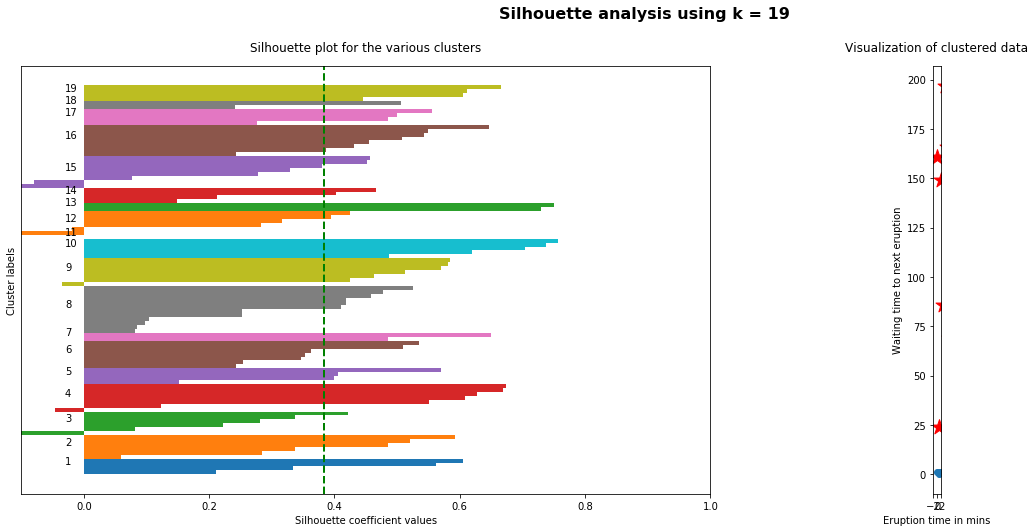

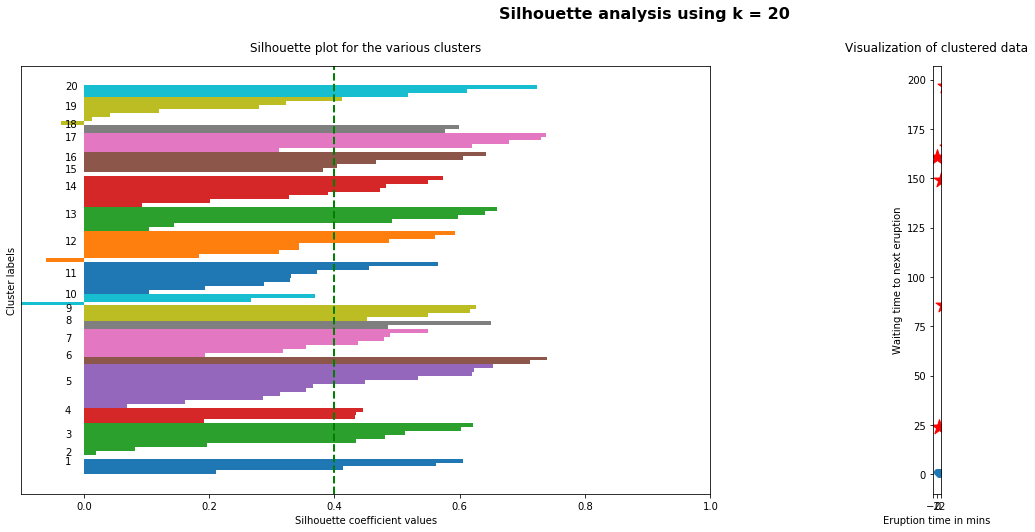

In [89]:
Z = linkage(vectorized_corpus, 'average')
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42)
    labels = km.fit_predict(Z)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(Z, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average score for {} is {}".format(i+1,avg_score))
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dist[:, 0], dist[:, 1])
    ax2.scatter(Z[:, 0], Z[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

For Average Linkage K=6 looks a good arguement, because the average silhouette score is good and all the clusters have final silhouette score greater than the average silhouette score for K=6 and they have almost equal widths in the graph shows that the data-set is divided into 6 distinct clusters.

Average score for 2 is 0.6105814872982014
Average score for 3 is 0.4533679811464883
Average score for 4 is 0.4557107650070794
Average score for 5 is 0.4702851174151614
Average score for 6 is 0.4751632573536078
Average score for 7 is 0.43115882497342056
Average score for 8 is 0.39731919741551003
Average score for 9 is 0.38418424928062717
Average score for 10 is 0.4037633588695568
Average score for 11 is 0.4097082274972707
Average score for 12 is 0.4248441818278582
Average score for 13 is 0.4054623427943665
Average score for 14 is 0.4362363042518547
Average score for 15 is 0.4151774006422467
Average score for 16 is 0.40981690418488037
Average score for 17 is 0.41680133229978716
Average score for 18 is 0.4003863288917707
Average score for 19 is 0.4116839802031434
Average score for 20 is 0.40065693724753965


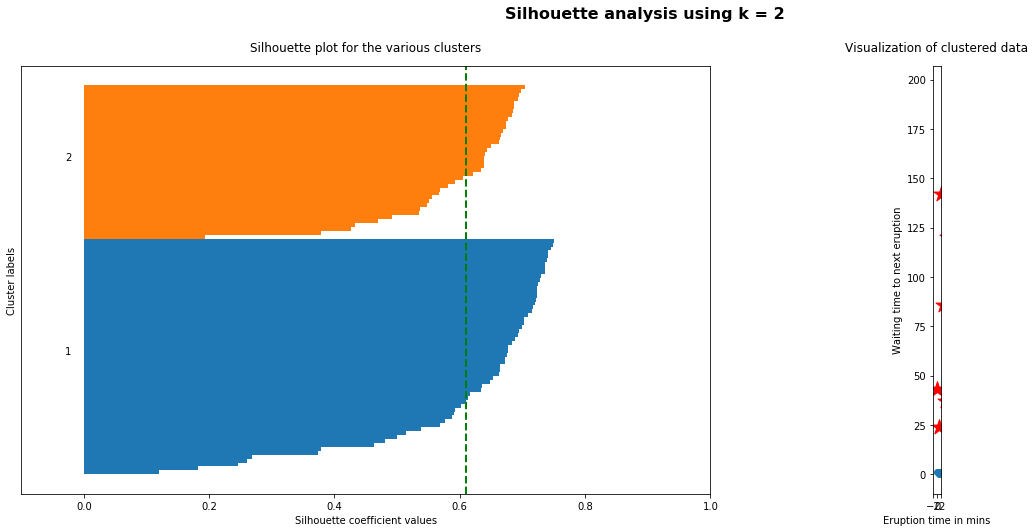

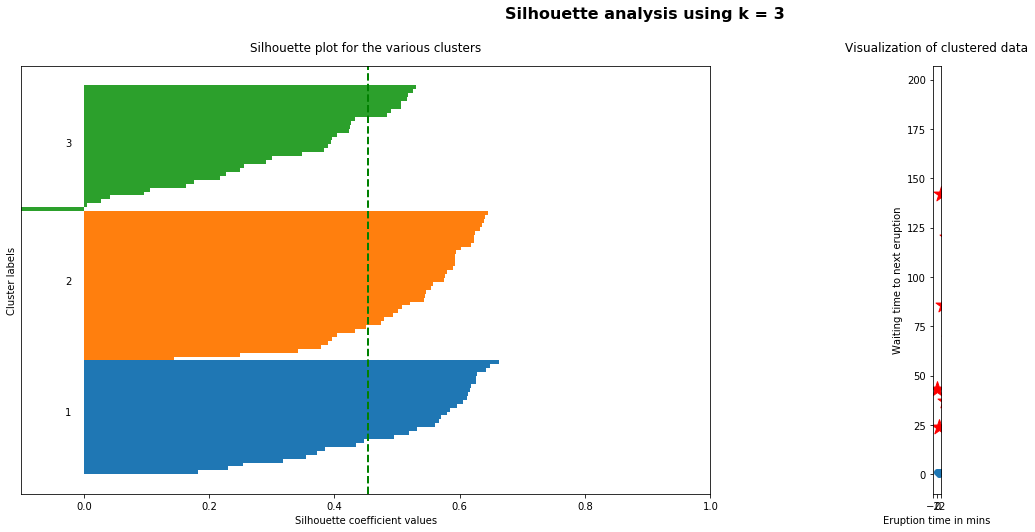

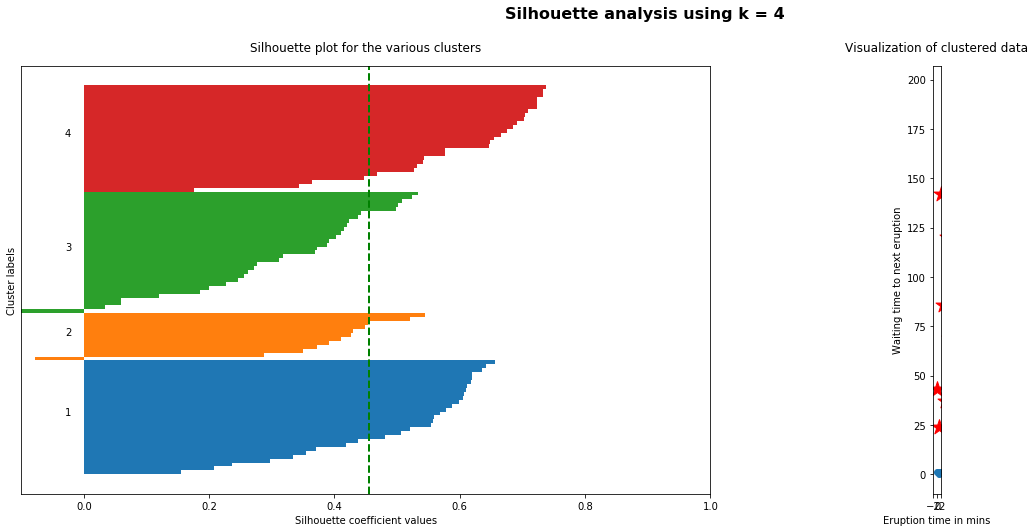

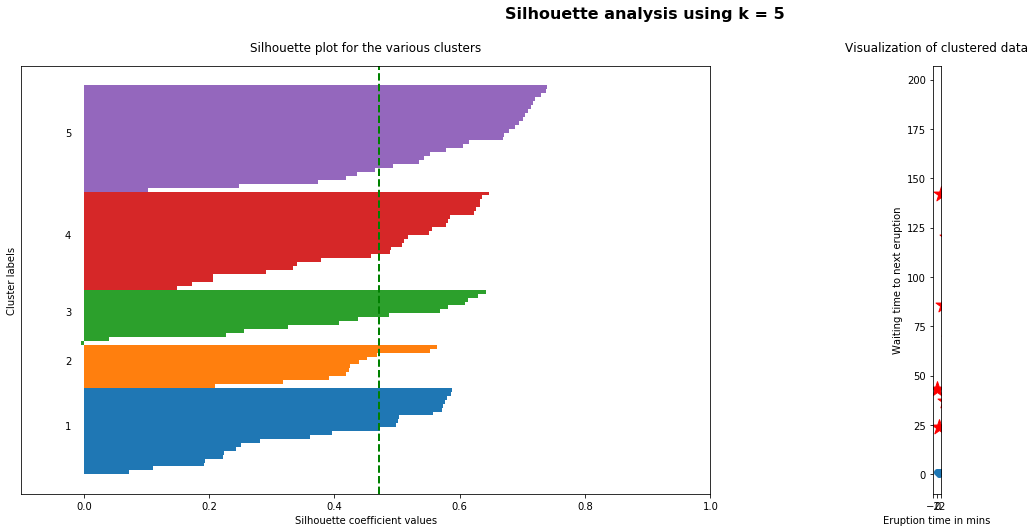

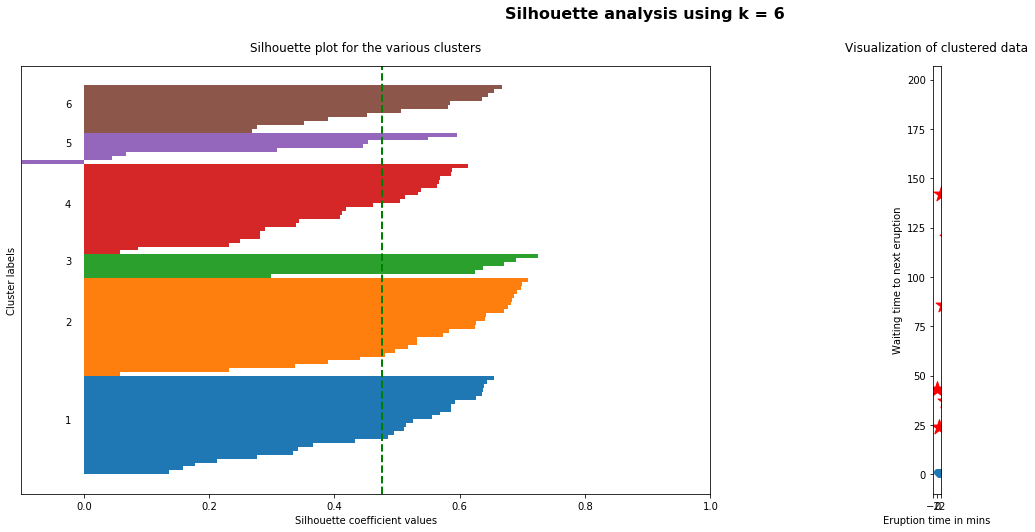

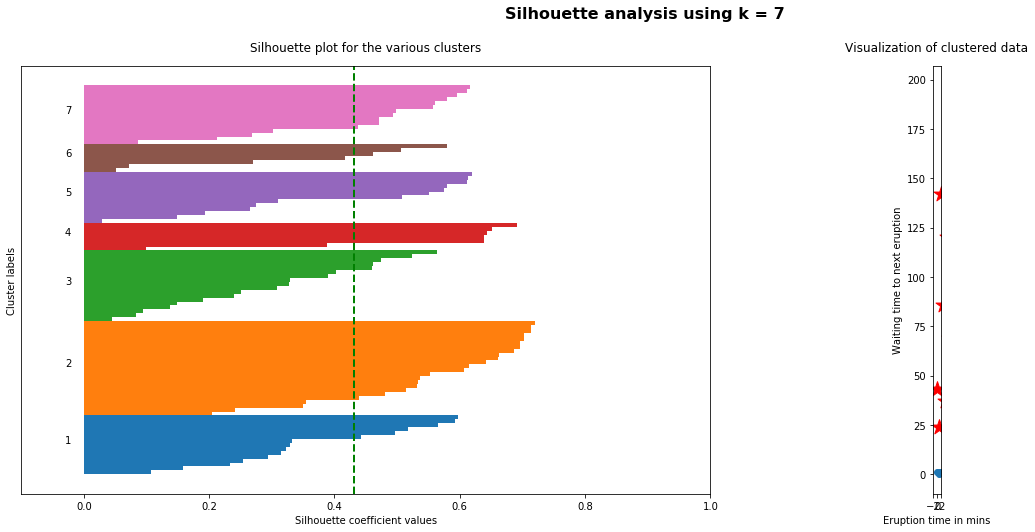

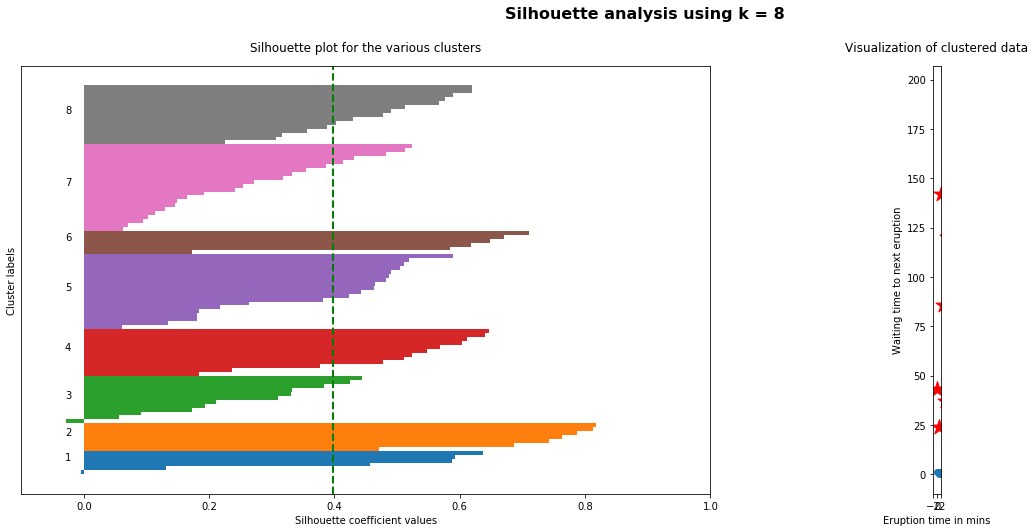

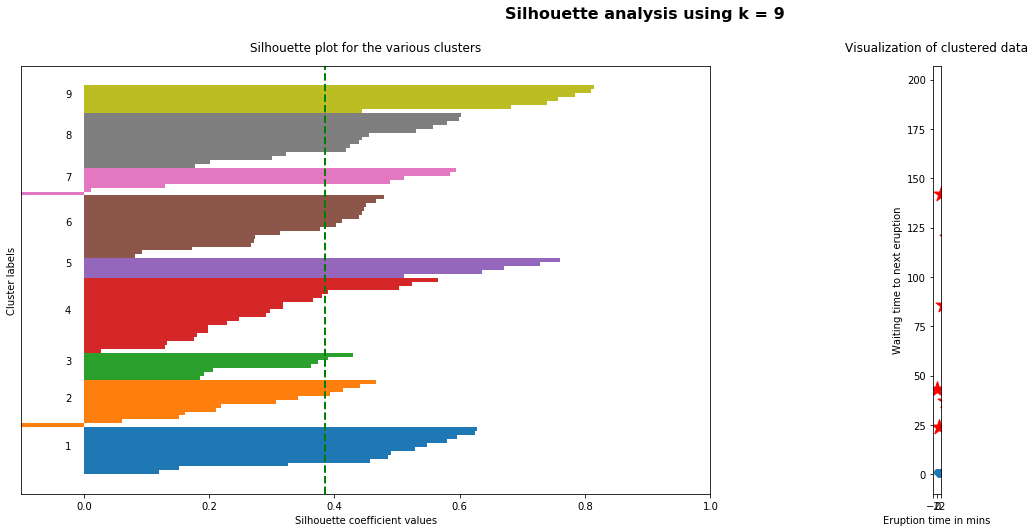

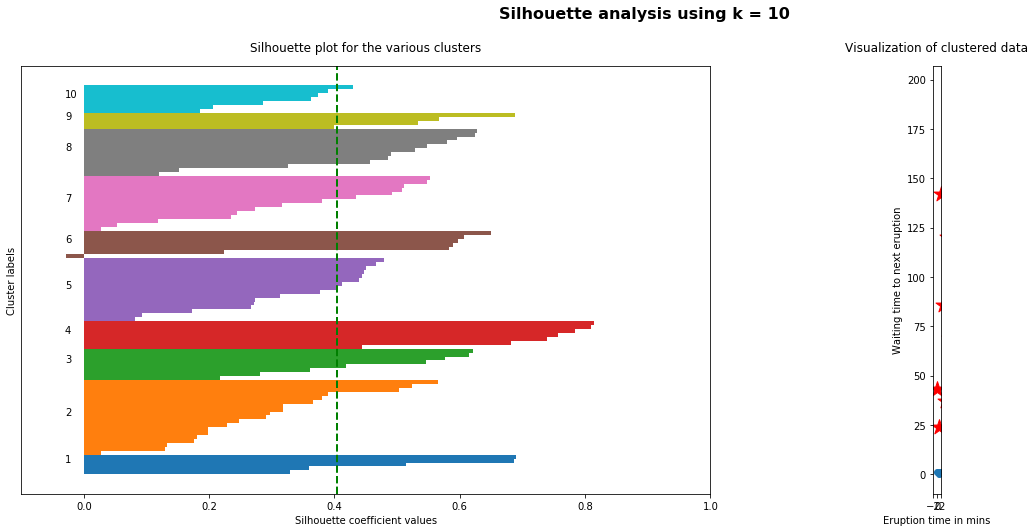

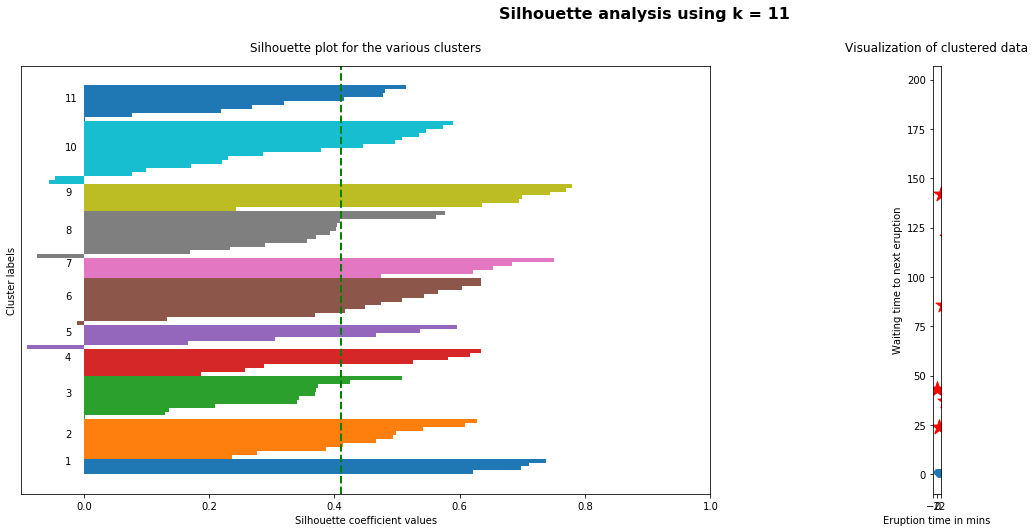

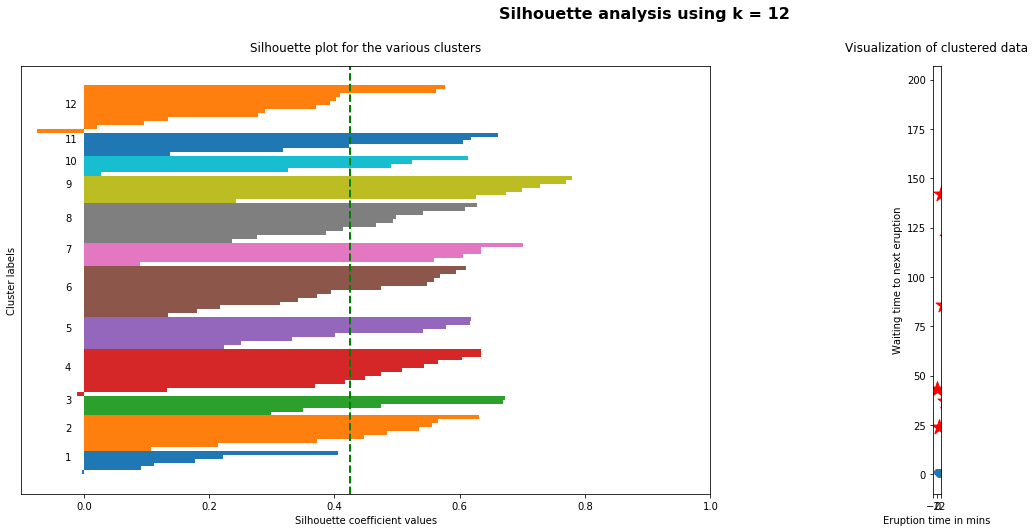

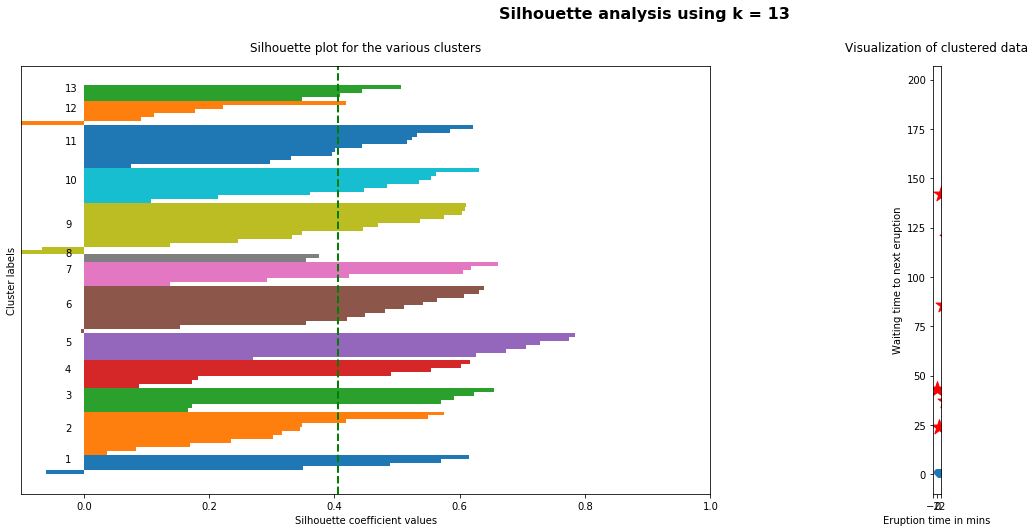

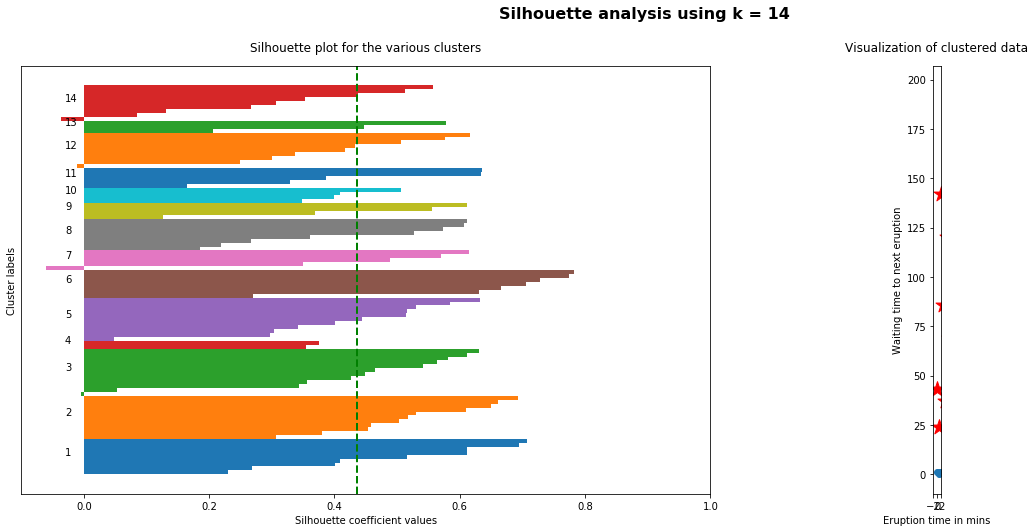

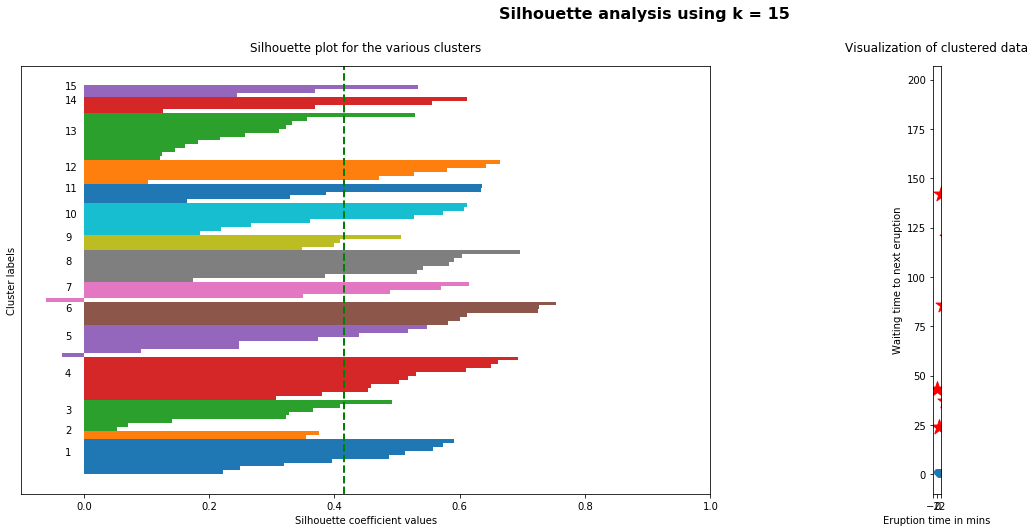

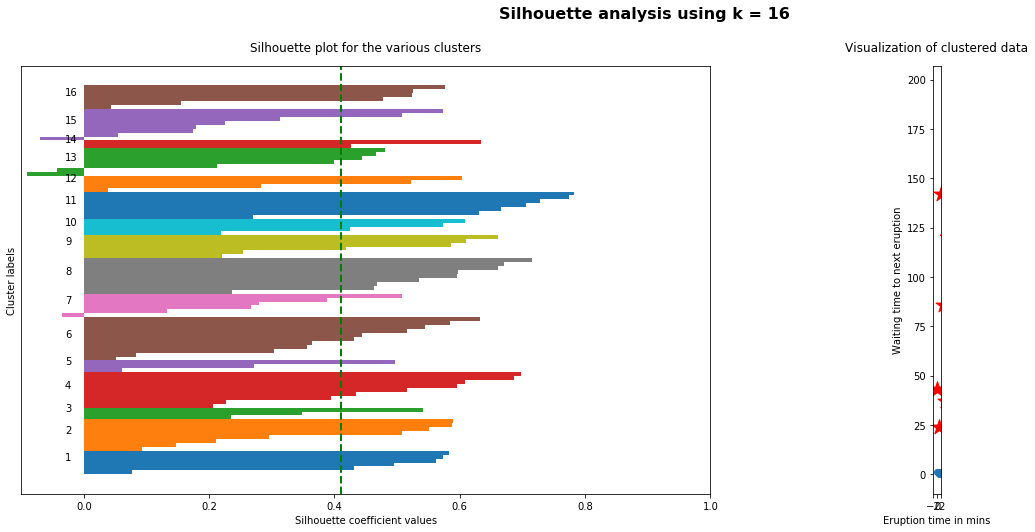

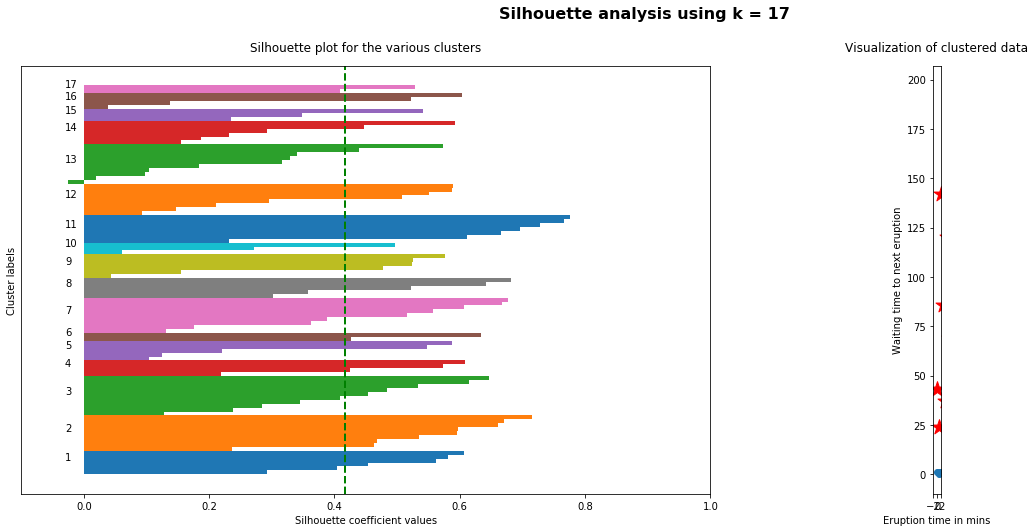

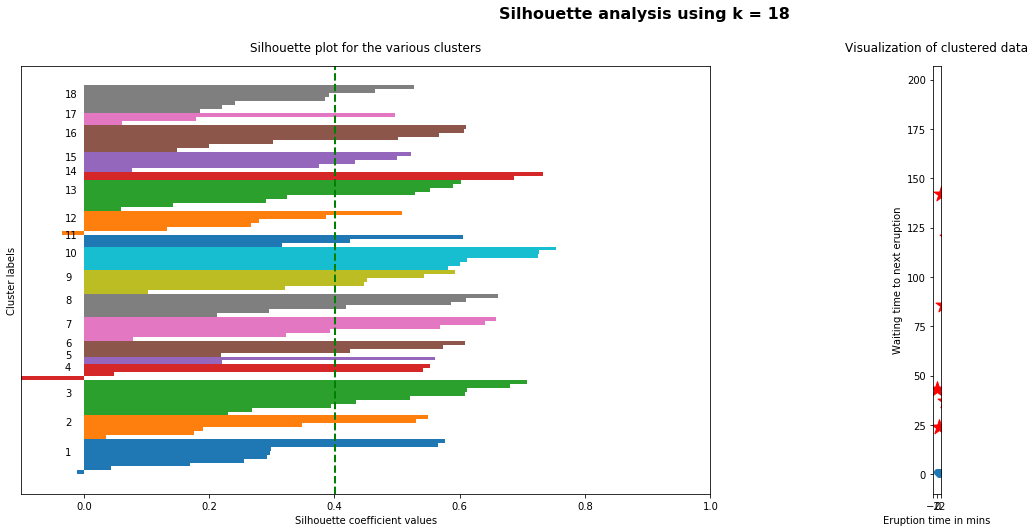

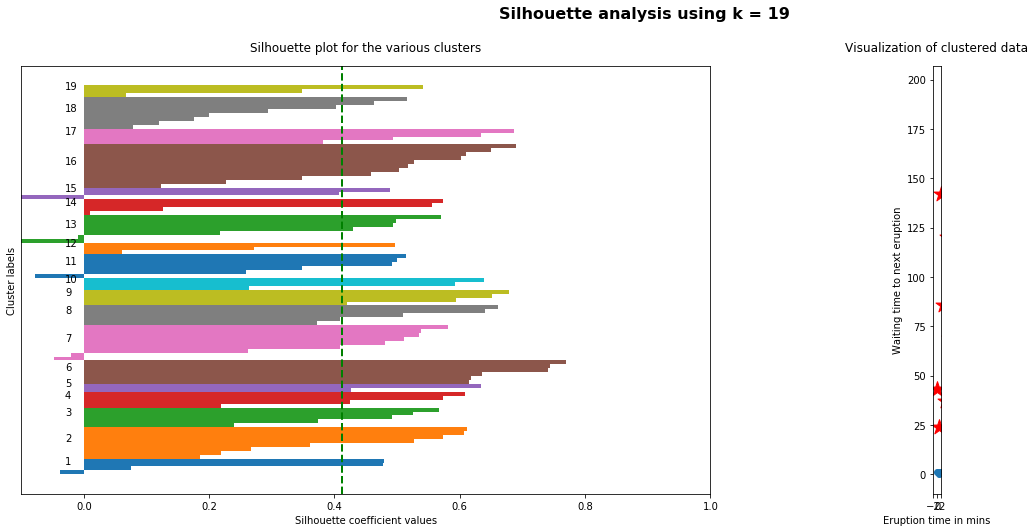

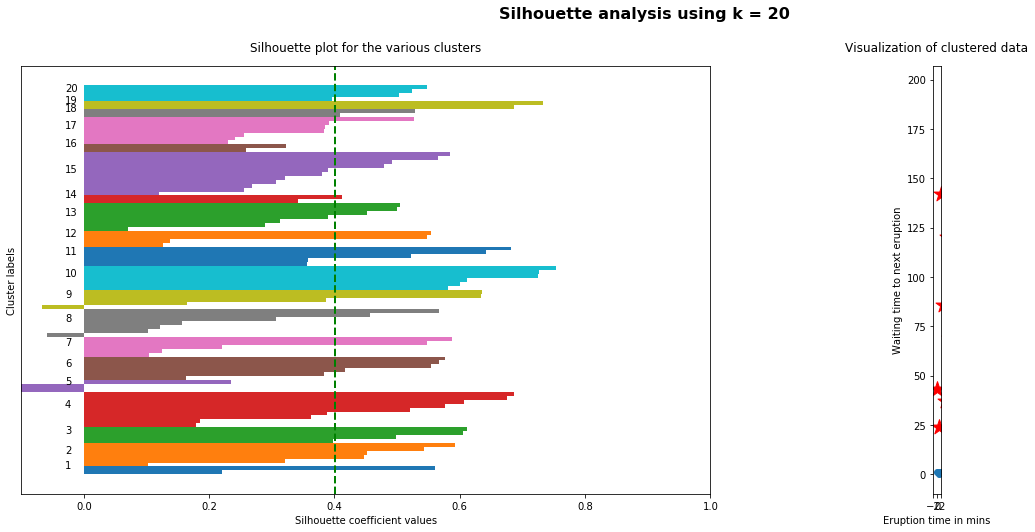

In [90]:
Z = linkage(vectorized_corpus, 'ward')
for i, k in enumerate([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k,random_state=42)
    labels = km.fit_predict(Z)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(Z, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print("Average score for {} is {}".format(i+1,avg_score))
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dist[:, 0], dist[:, 1])
    ax2.scatter(Z[:, 0], Z[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

For Ward's Linkage K=2 & K=6 looks a good arguement, because K=2 has the highest average silhouette score but K=6 has final silhouette score for all clusters, greater than the average silhouette score and have almost equal widths for each cluster in the plot.

#  TASK - 5 Queries on Cluster

In [63]:
doc_cluster = []
for i in range(len(queryf)):
    que_trans = tfidf_vectorizer.transform([queryf[i]])
    doc_cluster.append(kmeans_model.predict(que_trans))
    
    #print(docs_retrived[0:15])
    #res = [lis[1] for lis in docs_retrived][0:15]
    #docs_retrived_name = [files[files_no[num]] for num in res]
    #print(queryf[i][0:3],docs_retrived_name)
print(doc_cluster)

[array([0], dtype=int32), array([0], dtype=int32), array([0], dtype=int32), array([0], dtype=int32), array([13], dtype=int32), array([10], dtype=int32), array([0], dtype=int32), array([0], dtype=int32), array([0], dtype=int32), array([13], dtype=int32)]


In [64]:
docs_retrived_name = []
for i in range(len(doc_cluster)):
    docs_retrived_name.append(Clusters_Euclidean[doc_cluster[i][0]])
    print(queryf[i][0:3],docs_retrived_name)
    print()
#docs_retrived_name = [files[files_no[num]] for num in res]


712 [['GX240-51-12213575', 'GX025-33-4254186', 'GX240-84-0131507', 'GX255-65-9943451', 'GX123-45-5659840', 'GX045-88-3362544', 'GX031-85-0001090', 'GX007-43-13233964', 'GX066-16-3768211', 'GX009-58-4267458', 'GX025-67-0369887', 'GX026-69-0425787', 'GX058-68-12935160', 'GX121-54-12752879', 'GX056-80-8507274', 'GX004-81-3891531', 'GX261-24-2420173', 'GX235-49-1853414', 'GX232-97-13839573', 'GX037-53-15444663', 'GX021-46-0346939', 'GX235-03-7888088', 'GX025-06-9419689', 'GX256-61-13295069', 'GX251-59-1260847', 'GX260-89-16638793', 'GX259-63-16107092', 'GX056-59-3828847', 'GX113-90-0586837', 'GX055-52-10349567', 'GX257-01-5803525', 'GX131-40-13345138', 'GX038-23-13693573', 'GX240-51-8789503', 'GX030-60-3550004', 'GX237-00-6109677', 'GX030-45-15369635', 'GX220-45-16433148', 'GX061-06-4170063', 'GX065-45-2035518', 'GX064-78-12301593', 'GX024-50-15429036', 'GX237-37-7048500', 'GX256-40-6950329', 'GX062-61-4363680', 'GX063-11-10301215', 'GX027-89-7990485']]

794 [['GX240-51-12213575', 'GX025-3

In [69]:
accuracy_for_5c = []
recall_for_5c = []
accuracy_for_10c = []
recall_for_10c = []
accuracy_for_15c = []
recall_for_15c = []
accuracy_for_all = []
recall_for_all = []
for i in range(len(queryf)):
    ss1 = set(d.get(queryf[i][0:3]))
    ss2 = set(docs_retrived_name[i])
    ss2_5 = set(docs_retrived_name[i][0:min(5,len(docs_retrived_name))])
    ss2_10 = set(docs_retrived_name[i][0:min(10,len(docs_retrived_name))])
    ss2_15 = set(docs_retrived_name[i][0:min(15,len(docs_retrived_name))])
    ss2_all = set(docs_retrived_name[i])
    ss3_5 = ss1.intersection(ss2_5)
    ss3_10 = ss1.intersection(ss2_10)
    ss3_15 = ss1.intersection(ss2_15)
    ss3_all = ss1.intersection(ss2_all)

    accuracy_for_5c.append(len(ss3_5)/len(ss2_5))
    recall_for_5c.append(float(len(ss3_5))/50)
    accuracy_for_10c.append(float(len(ss3_10))/len(ss2_10))
    recall_for_10c.append(float(len(ss3_10))/float(50))
    accuracy_for_15c.append(float(len(ss3_15))/len(ss2_15))
    recall_for_15c.append(float(len(ss3_15))/float(50))
    accuracy_for_all.append(float(len(ss3_15))/15)
    recall_for_all.append(float(len(ss3_15))/float(50))
    
    #print(len(ss2))
print('Accuracy for 5c : ',accuracy_for_5c)
print('Recall for 5c   : ',recall_for_5c, '\n')
print('Accuracy for 10c: ',accuracy_for_10c)
print('Recall for 10c  : ',recall_for_10c,'\n')
print('Accuracy for 15c: ',accuracy_for_15c)
print('Recall for 15c  : ',recall_for_15c)
avg_na_5 = mean(accuracy_for_5c)
avg_na_10 = mean(accuracy_for_10c)
avg_na_15 = mean(accuracy_for_15c)
print()
print('Accuracy = {}'.format(avg_na_15))
# avg_nr_5 = mean(recall_for_5)
# avg_nr_10 = mean(recall_for_10)
# avg_nr_15 = mean(recall_for_15)

Accuracy for 5c :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2]
Recall for 5c   :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.02] 

Accuracy for 10c:  [0.0, 0.0, 0.0, 0.0, 0.1, 0.3333333333333333, 0.0, 0.0, 0.0, 0.1]
Recall for 10c  :  [0.0, 0.0, 0.0, 0.0, 0.02, 0.06, 0.0, 0.0, 0.0, 0.02] 

Accuracy for 15c:  [0.0, 0.0, 0.0, 0.0, 0.1, 0.3333333333333333, 0.0, 0.0, 0.0, 0.1]
Recall for 15c  :  [0.0, 0.0, 0.0, 0.0, 0.02, 0.06, 0.0, 0.0, 0.0, 0.02]

Accuracy = 0.05333333333333333


* The clustering using K mean can't give as good results as the Tf-IDF, which is apparent from the average accuracy computed above